In [1]:
import requests 
from bs4 import BeautifulSoup
import os

In [2]:
#url = 'https://zhuanlan.zhihu.com/p/120926031'
url = 'https://www.schwr.com/article/8222'
r = requests.get(url)

In [3]:
soup = BeautifulSoup(r.text, 'lxml')

In [4]:
all_imgs = soup.find_all('img')

In [5]:
image_urls = [i['src'] for i in all_imgs]

In [20]:
img_url = image_urls[-4]

In [23]:
urllib.request.urlopen(img_url)

<addinfourl at 1899080831232 whose fp = <_io.BytesIO object at 0x000001BA2A52E7C0>>

In [25]:
urllib.request.urlretrieve(img_url, 'image.png')

('image.png', <email.message.Message at 0x1ba2a525580>)

In [26]:
import urllib
from PIL import ImageFile

def getsizes(uri):
    # get file size *and* image size (None if not known)
    file = urllib.request.urlopen(uri)
    size = file.headers.get("content-length")
    return size
    if size: size = int(size)
    p = ImageFile.Parser()
    while 1:
        data = file.read(1024)
        if not data:
            break
        p.feed(data)
        if p.image:
            return size, p.image.size
            break
    file.close()
    return size, None

print(getsizes(image_urls[-4]))

88963


In [17]:
requests.get(str(img_url))

InvalidSchema: No connection adapters were found for 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAApQAAAN2CAYAAABHNBkBAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAFiUAABYlAUlSJPAAAP+lSURBVHhe7J0HWBPJ38dtgGJXQCwUBURAFEEUFQXsYi/Ye+9nL2dDPXsv2HsXe++ip2LFCjaa0juElpCQfN/ZJPSg3vl/b0F/n3t+z8nuZrPZnZ35zOzMbBEQBEEQBEEQxE9AQkkQBEEQBEH8FCSUBEEQBEEQxE9BQkkQBEEQBEH8FCSUBEEQBEEQxE9BQkkQBEEQBEH8FCSUBEEQBEEQxE9BQkkQBEEQBEH8FCSUBEEQBEEQxE9BQkkQBEEQBEH8FCSUBEEQBEEQxE9BQkkQBEEQBEH8FCSUxP8EmVSCaGEqYlJTkSpMg1SmXEF8k/Q0dr64cyZKQ3qukyaVSlnkWiYRQ8htz0IkkSqXqkCm+JxMKkbQly/w9fVFWHjkz10XmRRikUj+3WmSH9+R4nf8XGTCjkEiToPkf5TA0sVipKf/b/aVH9y9Icq8Zj/4Xez6paen/6vIfrr+f5BBIhIq0q1QCMlPnj9ZOkvTIjGyDpvtP02RzlJTWV6iXJrxvUJJOvtX/nD7C2OfTWAhTGP7/ceHJ8uT/v5p5PxKGcRp7LjZvSNm1ydjXTq3TChCmphdM24hu+aq9sVF5v5k6fJ7UMjOu4j9tjynXiaEIN5ffr/7+iewbZTL84Xd0yzf5s61ME2S67gVyLj7nh2rIv1+O3FJJWnK6yaCqqQuY98V7+/Hjs8PCUnJyqV8IUOSIF5xrnzjwZIa8ZOQUPJAOssQkuLiECePBCQlCVmmoepWViBNT2MJX6DcXoDEVLHKGz8DKSskkxMSlNvHQyBIgSS/jIBlcMKkJOW2LBKSWCb0T0skKeI+emDR8FawamgLp6EL4fEhngmScvX/gLSUFAgyjpGdg1R2Dn4YlgkLE2MRHhqK0H8QYWFhiEuWKHcCiBLjEB0VhaifiDiBSLk37jqJcHvdILRqZgOH3hNx8nmscg3L6GLD8fTpUzx+7IuIuIyMXgR/z6MY08YGDRs3wZD1dxCdlHV8CmQQss9GffRFqliKtKDrmNzVCfXMrdFt9AooviIdSdHhiIiMRXJauvxT30cKUchb7Jo/Ba1bOWPKTk8ksv1/GxlLh1F4If8dj38iniEkOp4VbDIkBDzHoRWzsNr9OSKE3HnhJCMxK/1+L7j0rTxuSWwQbu7ciD1n3iKJCY2Mnd/48HCEqUgL+UZkDJJFua9BdtIR5XcH83s0g42NDUZuuIFggXLVN5CG+OPGxQtwd3f/x/HoeQiTF8V+0pmAxUerTovfiuiYWKQI80sbMbiyZiLaN7VB0/a9se7aF+Xyf45ULMSXewcweeI8uD/9jGR5RSgCt3fPgbONLRzbzcKNcJaXcOkv6QvOrJ6ECau24XFkUjbRzE46wj2PYVTPFrBu3BTdp27Gm9B/ZgpCwUe8eqUqHf5gPH+Od7HJmccnEYfgxNpJ6DdwKFwPXgd3C0pZpchj40wMcumL8a4H2X0phuDje7zKZ3/vBayM4HYW54WDi8ehb/deGDp5La4H5fxtoqjPODS3A8zNzdGg3Wzc+hyFb6VOSH1xYM4wODVujj5zjiFYmDdfTYnwxYkVo+Ds1AQDll5EaFL+eW/A7d0Y7twQzVsPwaFXUUx8MwSTiyQEeV/BrA7W7PiaYcauWwiKz1inCDGTZy7fkIiSkJSi/M3cEpkYCVFhP3hvhiMmPjnzd0sknLjn/B55xAfh7t5ZsGfnysp6MA4890V87m24YPLOVQSI70NC+R+SLkxG+GcfXD94EPOGDUNfFxe4uAzFjBmbcf2uFyIFeVv2hAkBeHr7GBZOnMC2dUGfvhMxZ+0xPPEJQKL85stCxmqHMYGfcP/MGSwbNw4D5PsfiAkTVuDcpUcIjk7OUaOVJEXjw53rcJs3DwP69pXv32XUDGzecx0vfSKR/J3aaAYySRTu7pkAM41iKFJcHbqtZuL6317w8fH5bnwOioDwGzKdFheB908f4+iqVZjQp4/8GPuyc7CWnYPn79g5EP7AMQrDcHv7OFhWq4Zq/yD0a9fDqJ0vIFQKyOPtf6Kbkx3s7P5l2LfG8CVXIVRKHNc66T7ZBhVLFUE5i3Zw84iUL4cwHl67RsOghi60tVtg8YUXSJCvSIX39fVw1C6CYmolYTf9LKISsxUXackI/fQUOxe4wL5Zd2y68hnxH4+hu3k1lChSChbtpoL7ipTwx1jcpzka2HXFwiM34BcSibTvZpjJeHPCFS0My6NYsVKo2WQCLnzJEOB8kCTh/SVXNNKrxn6H9k+EGcbtvMukMhpn5nZE1QqlUMawIROLU3gfGo2PN1diYH9F2vhujHLFqb/DuZOPT4dnwqJGRVQxaYyZ20/iXdBNzG1rh1oq0kK+0bAr1l/+pPzBqpAgzOcs+huXRJEiReAw4yT845SrvkHqgy1wtKqJilpVoG/WEPb29t+Mpo0bwky/MipWrIjOC87jS7xiPyHPbmJmVxVp8Tvh6NwfWy8EKnaSh/dY37cZKhUtglLVzDDx4GvV8q4yEuWVmIw7PjnwKVYPbwGt8hVg6NgbO998RYo0CO6uLtArUhwVq7nAPZRJe2IgTi0dgvpVSqFy7eb488x7la3k6UI/HJ7dBTXUWF5UsgIs+qyC54u3KvOeHPH+AwLDY8Gpkue2EbA1UZUOfzD0a6PdootI5e5zdi9/fH0JU9qYolz5qmgxZDluvXiBp54PsLxvPVQsXRqmLZh8Pb+D1YOcYaJif1VrmWNYRj4U6YHpzvVQtkQp6NdzwTFfoeKHK0kN88H6/sbytFbSuD/O+oTlI5RcC7gQqYE3MKGVOUqWqojGf5xClCCZSRTXas/kVPk0IiXQEyuHNEIZteLQMhsM90/hSMomXFxFLwNvd1c00SuGstp2WHfXHz63LmLTpk3KWIcl8wbCuloJdnyVYNNxAhavzljHxVZc8/FHkiAAdw4twp/Ld+NNhEBemUiKfgHXTvWgX13FPZgnzNF1/A5wd6VUmg7vx8ew3S379yhj9RJM7GiNiuxcqanro9+0eViXexsudu3F1bf+ih9IfBMSyv+MNAQ/PoXRVkaoVLIk1EuUQPHixeVRooQ6yhpYY+zis/BLFGVmtukR77Btfk+YaZWFhpqacvsSKFGqHAyd+mH3M39kZSdSxPk/hGtra+hw+2fbl8jcvxo0tI3Ra/IuvIpiUqn8RNT9HehsrQMNdfXMYynOjkujVFnUbTkWux/6sZpZ/rInR5aO6HeXMamlHoqxG7NIkaIorl4NNWsZw9j4O2FWDx0mb4W/KL8arwD3102DfTUtaLJjVMs4RnYO1LlzYNcb2y54K2XrG6SG4fr6/tCWH9+PR4my2ui+7nGmUN5b0wdGlYoxofqXoVkZtn+4KwoaRr5CmRqHF5tcUEq9ODsOc8w46QmFg+QvlCJBMDyPrcGI9g1QoYw61DWrou/SE/j4Nq9Qht3eiO6N9eTns0SF6nAaMBaHLt+FX5Twm63K0q+3McXZDKVYwaJt2R6LTn9QrsmH9BR88dyPIZ06ol27dpnRxqEJTLW5QqUcals1QZt2beHQpD60S7DfW64GrJq0yrF9u3a9se7cc4THxOHy8gloWLMcihQtipJlDNFn4WGcX9EDZUplS8PfCkN7LDn1HuliER7vX4U2llXYfVIUJSrXQh/X2ehd2wClVKSFfEOvCVzdvZU/WBXfEUqRAJ/+vgOPVyGZ6Ywj9d4a2NSqiCKlq6Be1ylYtmzZN2PRjHFoa8Kd05zfEeR5Er0tVKTF70RZ/fqYdy5EsZPciF5iSXdblGPfpV6xCpoM/INVimf8YGzAmTfBSBCH4tm9O7h+7Sp2/DkCdZgoFmFSYzJoCQ5e3ofZAxqjMhPKstrNMPPYMez8azwaabE8kOWVxq3GYMPJC7h2/TZefGYCqjwspKci4O5OdLWsiKLy61Oc5RP6MDJSkffkDks7DGMVlGi2m3treqNWxSIsvaijUqXq0NPT+7HQ0YEmy3e532EzWXmfvz+NAY7GLL9ngsuOqWhxNSZvpVCKhQYnvdyyosVhNWAAXJo1YXJTFOrqFVC9eo3M/eXIh5hQTm1nwdJoCVQz7/6PhFIQ7I/XnwKQLE5ndc8IPL66BeunjUADfS2U0KyI+n0WYs3a9Vi/3h0Pvbxw8uAebFzP/f0XpvSwRXXN4tA0aIz+U5dj7Tpu+Xps3LgJHt5RECkLlRxCeeM5zq3ozc6/UWYY6tVAWXa/ceVEGZ0qMMy2zsjIDlN33cWTq8vQsHoFqJWrhc5TduB1eDwSoh5jup021Ipx11UDmprlUK5c7uDKSG59RTTpvQbcXcnlsaem2aFKeZYnsjIkT7A8R5FWWB7AzrXKbarUwYANfyt+IPFNSCj/M+LgeXIGzIuUhn5dJ3QdPhpjRw1EZzsDlJYn6GIoo9UQi275Ik0ucVG4u2o4ExiW0TIZ0Ddpi/EzZ2JYm1qoUJJtX6IMGrgswrMoxd452fB/sQkOTLS0DW3RfuAIjB47Cn3bmKGSMjNTK2mE4fseIV6kKLgiPdzQt0MzdBw6EhPnzMHsgS5wNNSGBnc8amVh3mMd/FQ8AslCBnGSP47ObAst5Xf8oyjBvqP7Ovjm+x3eWNO7KbTVqqB+yx7oP3Ycxg9xhlWNckyQuH2UhJHjeFwJ/E5fnGxCWax4RTTlWnkXuMLVVVXMwVBnW2hrqBJKRUFTpFQlmDj0xfjxQ9DJqgbKsN9erpIJOvUdjSEujqihrYESGqVg020wxowbjyFsfzXKcZ/LVtAw/idCGZeIr143sHqmC6z1y0ONpaNS7Fg6T17CMvpAJPjmFspkBNzfj7Gt6sHQxBLVy3PfUQQVDeujz6pbiI2PwWfP01it8tzMRM8mJqigqQEDm7YY9sdCFdu4ws3dI/OxriQ1Eb4v/4aHh0dmXDu2E6Pqa7DvNcTIhVtxzeMWju2cj/oarDA2dMbCrRdybO/x1BtRAkXBybWqP9k3Hc7m2tCsZIWRSw7h/om16N9X2ULZqxe6tagPXbavoqzg4e6Fdl2ytVCOnwP3Z4qWN6koCe/Or0SHZoYozbabuGk/Dq5bh6UqflNWjEcbsxooyQr0StXtMHTFdnmBKktIQGxkJCJzRBSio4UIfpsllA1G78anqIwiPgHel93gUscIdZoPwp6LbxGrfCqQKZRq5aBv0Trr+POJbu1awaJiXqEUBL/E/tXjWVodh9EjeqBxdU0UL1oE2ua2cBnBLc+KIc4s7ZZj16WYGgyaDsYF33weFWdKjfI+/kfBpecH8I84jX6WJtCVt8KVhga734owkS2hpcX+Lo/SpZXbZywrz5Zxf7OKRLGKFaEl/5wFhq52R5D8oKQQhDzF6gHWyvz0H0apamg39Ri4OzDjPi+rw/LLeYfzdCnIN1bPhJ2Rds77PPAKpg10gC6r5Bcrooby5WvIH0ebm5tBV5ctY4KkwX6b48zx6OfIhLJYSRhYD8a2I8cy9/e/EMqEr5/hNt4FLZy7YeX5dwh6/xQzHLiyRcW5YNdo4rJJcJTnG6rWZ0Vx9VJw2fQMX7744PSWtZg51BkmOkVRqlxNjFm+D7cu78qWlyzEtPF9YFmJS6elYdluIKbPz3Zvrd6PG89D8eHZWQxxqskqvEw8Sxuiw9xD8PzMfrdSKLXNnTHN1Q1ubjlj09L+qKtbhp3nLKGUSkR4e3UVZkzJmdblMWoYK3/rytNLseL6aNd7MMbm3oaLWQux+0F+rfVEdkgo/zPi8dZjLxZPc8Plxz4IiI5DQlwkAu5sx+CmevKbk2vBajH3ijwjkn69hjEta0OdLS+ra4GpO15DIBIi7O1u9LWoIpc+TRMnrLn2Vbl/IUI+ncLScWvg7vESn8NjEBcfjTCv05jXta68Fla0hAaMh+xCWLwiExJGfoaX1wv4RsUiUSKBODwY11eOgkVlLrNQRw3LgTgXkjPDyg4nC3e2joRNFVZ4Fy2GSpbt8ee6Azh58qQ8ti2dwmqrXK28BIw7TcfO/ccy18nj1FlcffhJ2W9KFR9w9K9V2LDjLDw/BCGcFdoCdsyP3MaidpXS8nOmVrMFll/wVW6fD9mEUq2kMaaeesOkWvWAhvT0WPabxsGCCWC+QlmxFrovvw2BwBcHJ7ZCtVIsc6/TBQe9IuF7Yz1aWZRDqYq6mHj8IxM+AV4enis/D/8vQpmQguAHh9DXthLUNDRh1rwH1h67hg/RCskW+d3Awj4d0dDKGhYNW6LroIFwamyGKmUqwLzxSLguGgsnayZnZa0x8ehDJCWF/KvW3Oxh7uIKT0Upj7RoP5xa1BNNmjTJjMYN6kNPk2ul0IBebQs0amKHBvWNoclkoYiGDmpb2ObYvt34dfAMULRDcYM1RAkR+HRtLw6euYKA+BSkxccjODgYQUFBCPoagNdnF6BRZa5gKQe7Actx25st59ZxER7O7qOMDoZpSE0W4OPjy7hw4R7CBaxiwy3L9jgvK4RIkw8G4So5XEtSKdSymYx78p78wbi4fBp652hV5cIZvfotx6l7B9FHKZQVjXvjyJtQCFPj4X1+G3oxOdVky9XLVEGv6acRp0wbnFDaGldGsRKa0Ddtit69e38zurRvC8OyJeStizlbQcUQCgUsrcYj1P8GpjbSkhfKdXrOwu2P7H4ScOsSEBfyBgdn90QNTTWol6+OAWtZxVPVqAqOiLv4QymUGmXLw6yZPRwcHH4w+mP3HS8EhbrDpVpFFNcsA8P69dG8efMfjmb2TaBXXYPlOXpwcVUIZWpcGE66doVROZaGihaHnsNQrNtxODOvWTetN2qzfK14ybJoNHAJDh09kTMvOn0B918FgUsZGfd5xVo2WHzmI66d2IU1a9Z8M9z2n8S7a7vRuwnLy7Pf58JI+Ly8iMn2tVC6VGU06vYnzt+9i1s3r2Fe7zooV1IdtZr0wh5WKVzQnaUreSV7LT5xg5G8T8r3l59QVjXvhiMfknPkXykhuYTSOxSJkb44Nr+PvLJQtFgJ1LDriq3uF7FtVBMYsEooJ+kaevqwtbODvX1ztGjRH2571mHO4B4sr7BFPZPasGjSjC1vwaI5bBrYorZpE9g3bwGn1m0x98JrvHmyC+20DOStvbq6LH8qVhw6xrYYOGUuJnfM6JrRDI0bmkJLee/rGNZD46ZZ3TacJ66X3+dcv9pPN3agh1VZFOOeRBg0xMTtBzCqgUIos+cv2RFmVp6zhJJr9JCIYvDq1nVcungRF7OH+yH8NaiVolzQMMPUdTtwNvc2l6/A4/1HJOXqXkaohoTyPyOdFV5xiGcypygylMS8xvqRTRW16syMSAzfCyvQoqaa/Mar2WgMbkYpWgskomgcHN0QFblWSvWaGLjsPMLl+b6UFbbxiI7I6owsJzkYl5Z3RwVu/8XVUc1lE0LjUpUrcyPFl6tr0cqUkzU1VK/fB6f88xFKcQru7VwG+1oV5DKpoWWJ4WsvIzxbR37ucZuLeTb5yd7f74dIRVxkfJ6BI8K3e9HOTFdRe/7uI0dGNqEsoW6ATizjOnhMRQuDPPbCdVxL6H1HKHuvuceWROLY1HYKoVS2FnCtvu3kQlkNk91DwR264jFQ9uur+D3/q0fe6an+OL5pDibO2Ii/X/sjUZSMJFaZiAwPxavH5/DnkFaoXqWy/DFbCfVS0CxXCbo1aqFTz3n4+0Mo/J5egvuBh/CPTINMGIF7uyeo7m9apZL8cTdXWBVXK4VKVarm3YaFw6jVeKZ8Wpq9xUSjrBZ0q1aDro4WSquz88HSWFktHVStVhU6WuXklaciaprQ0tFFtapVocW1lrFl2o7jcd1bAElsIM6uHY/h87bhuW8UUsXseBVfk4VUjKjH62CnzQojJpSO493APpqXtAT4nluPBfP24HVwNMRpLG2yz0bfXoeOrRQDaHJE0/aYuO4aYlUK5QesH+SEqspHmaVKacgfcRaV9wHsjo239qK3UihLaGih36oruHdkG1umh5JsmVoZbTi6LMLTdxGQpouRlJiAsGsr0d3JCqampvIWrfpMur4V9erVk2/LRcc/T8IrIA6JKdnvt3TEh53HQEMmcew7S7F7+4hnqOL8yVLxyWMHOhuVQfFiatBuMRFXn39RDNCJEUCcuy/1p3MYYG/Afl8J6Jq2x+b7PvD39//BCEJ8cjJiMoSyWgNMWLsHVy4dw9GjR78fx47h2K1bmNVZF+rFFUL5JTkGpxZPQN0q6uwcF4emXnO4nnwGQTYhzrgHc9/TqsgulAt2XMb0zqbyvqnfCsMmPbF359a8QskQC32xrrs5yqqz81WzLjp3746uXbqgTg0u78x4cqBMVyWYYLecjRP3H+Lx+dVoY1s9X6GsWM0ek9cezcy7zpy9AK8HL7C2b5ZQHvP4GyeW9IGxDncvcU8vqsNl0Va8DYlFzLNTTPZMULRESdQbOBEL/loJtx3H4PksCHGx0Qj/+hE3js6GvXZ12HX6A5cfvMTbR8cwopkxy+9aYu6ee/jkG4DweHZXXJgNU+36cuk04xoRiqqhkqk1ukxchT/6tkbr1opo3qgRdIsr8hBdS0s0Vy7nos/kZbjPtfazy5bO7s9Hxxawsqg2Wo3bjquPPTCtsfa/EsrkmDdY3qMRTI1roVatbFHTAFUrlpaXI0WLMcGtoZ9zPRfmVuj6l7I/LPFdSCh5RcZugtuY4Wws739YtFQlOMy7yhJvLO5sGQvzsqyALVkR1mMOIV6ZoLna2/ONLtApx8lmWbQYuwXvlB3wVSGJ8sauMY3l++eE0nTEPoQnZI005gZyCOLjWAYSi8iv73B0YR/ULs8KQzUt2A3Zgc85CqVsfLmP2T0bQFONq22WhYXTGOy/9wjPXrzAC2Vc2bscrWoq5Kf+oNW49ffTzHVcePkEIUn8T29UCUIvLoK1AatZs9+kVssBqy4FKNflQ44+lMWhoVlOZaGgiAooW0aDFayFQygjBCIkJ0Yh8ONbPH3micdPHsD9yCrMH9oSjepUQ5UqWihXmv0etTLQ1TeCedMOGLfiMK69+YDAoDAkJKWy4+GmNMmYbkYGcWo8IvKMnGTx9hRGOtSWP+6tatYR2x76592GRWRsQmafquxC2WTcTjx+HwqfR5cxxo573GaKcTsv4X2oPx5ddoVdKSYEpl2w89ILhPr74LJrJ/k5kAvlm2h8uTAP1nrlUKJkFTR0mYlTDz9BwM5lDqn8QaEUfTyBYY1rMbHVQuOuE3H06RcI2LkIdZ+MahXZsXF93coo0oQmKwCLZj4SVSWUMbh2YDNmT56MyVyM64f29XWhydJaJdPB2Htnf2YLJVeoly5XB3W1KrPzWBwlK+ii1WQ3Jsix8oJUEPQW2xaNhUu3jmjdygmOjo7/OFq174zufYdj7k6vzBHtnFDGBR5G16oV5EJZpEQVdFt6FiFJ7EIJw3Bj81BUY2meOz610rVh07CxYoBO11m48yJMuQ8l3u4KcSpSEjXMe2P7/cc57uv84w38mMikcXIbfgMzHZrAsvVALF0yD72b14K2jg6q6OlBX19fRVRnlRVtVKmmB6ep+7BhXDNYWbbGjG23EfjmNAY000cJ+fFro8WQRTj98DGeZ/vukytGol4Vdk+X0ULLqQfg+eR5tuPywjvf8MzBgdmFctHeW1g+qnXeCkaucOg9CacP7/y2UJbg+keWyRxsU7p0ibxCWaQoy3vLohK3jVYFlNQono9QKqRNs1xW3sUN3pnmdhsreyvuN/VqThja2x6GOlzaK44yWnXRb+kVeIensntGipjX5zGiSWWoaZpi2PDOMNCvCst2I3BB2TU6/vNDLHIxRuli6tCuPwDHn3xGkMcWOFtVlfdl1XMaiYP3AiBMjIHn+p4ob9wCffv0gZ0e133LAqM3zsPwLj3QoW0uoSym6B6VWyjbtu+A3rOOI4AdH0e6OBovP37Ch7AUxEVk9aE0d5mPe/65nyCkIv7tYXQzyy2U3ICe11jXxx716nJdDbKFWR0Y6laCmvy+LI0aRrVzrufCphl6r731zQoIkQUJJY+kJUfjysZJsKzI3WBFUVq/KVbdDodEFIAjc7uialGWaWhWQvM5l1nmpEzQ6WkIOTmJFXqKAsqi92J4BitW5UYqEeLpqVVoqadsHalQG9OPvWESp9yAIXh5GmsXz8YMVhAOa98CNbXUUFbbAE27zMDO+7HI9z6SSfH6zFy0MNOFsZkByrAMRiOzhSYjSiozefY72Poc60qXg4HjXDyNSmS3/I8jCH6FpX0ao7IGE9nipWDecQrufv3OHnINyilbpQqq5+5Qny10ynN9EQuHUH4N+Yqre/5E304tULduJZQvXwolS6rLO5sXY+mH+71cYVK6ohm6Dp2KZcuWY8Wq1Zmd6rlwu+CBAO5x7/f4Tv8tVWQXSovOU7B570ns27wCncy4CpEeOk9Zir0nD2HziiEw41o/9ZpgytJtOHloD1YMaQy14sXkQnn1bTT8Hu7BmDaWKMe1/hUrAQPrQTj0kImAUl7l/KhQ+lzEykH2qFKS665RHFrWXbDp4jP4Hp0oF0o1XXN0HvsXVq1YiM61dVFS81tCyY2YlSAtLU0e8e+uYVLr6ihaXAMmg7fi+aPjmX0oFVGUHVtxlNOtjwHLT+BdmCBzdoeU4Odwm9cPHTt2/Lno0Q9/HHjM0p/y3uDOy5P1aCI/L4pjKF2vP868DIc4Jef9IT8+VujLo25vuOdqDhK9PIzutrrKbVkFLft9/c2ojYHLmcRyO+GmQgvwhy+rgLy/tYXdM+VRvKQWGvYfjclTpmLq1FwxsR8crXWgLk/3p/A1/BN8fUMRHSORTzFzZ/sgWBlXRU3jGqwCkDXwJSNKaqjL+45yx1xMTSPHulLldNCw36bM/uLZhXLNvWQkR0ci4NMnfMov/PwQHBMD8RvFI+p8hVKjHMzt+uOvNWuwatUK9G1Znd3juYSyaDGUYvlvvcZ2aGJtgsrl8huUw/VfVEel6lmDhowtG2L6vrtY1Udxv3GP/tW4vu3F1VG5ph2mbrkK/wSJIq2lC/DcfSFsKhRFSfMB2Lu4D6qwdK/XhF1vZmJJ4W+xcUJLVC6tztKpHWYfeogIrqU6NRZvjs9Ho1rl2T1YHAYtR2LnhafYO7oeqjXszK4V182JG5RjhekHNmKck1PmI+2MaKbsytK0WbM869pM2YwPoVk3LDeCnJsHMzHboBy9Ju0x9a+s/CsjVs0aiQZMEItnF8qUGEQEBeDjg/vwuHsXd7PH1TNYM8IZWuxcqZe0xvwdx3Az9zb37+PhJz+W3mKQ8P3s7reHhJIXuH4dIfDYPQcONSsqMrkSWmg78yj8me3JBN5wG+8oH0WZW2q4jDizFYWtz6/5XyaNw+vTK9CzfnV5PxSuBmY9YDWehrDCS7kNh++xqTCvlrNzdiXD5hi1ygNfuWNRbqcKifgLPC4cwn638TDiBlSwzxZlMiavXbPgRt4p9skVUJVQubJiuTyqVINZx9l4FvOjQilGwldPdl6coV9e8fimXPVGmHXEC9+dHjebUBZXq4zOf67DwRO5H3VnxCG4DnVGjW8NyskUykDsGOEEHTV16NcfgksRon8klBJRBHYPqY/y6v9eKMPCAuDu2jGbDPzzyHik/F1+Uij/bWQen1SE6HfnMb1bM2iXLoJaDuNw0iMC4uyN6D/6yFuWjqSgh1g7bQAsK7O0q22OWbsu4N3B8fJ7K+N6ZMpA2W8JZXbYNbq2QX6NiqvroM/mO/DxOp0plNw9UaJECZYWdOA0bjvyjicTITk5Eh/vHMTCWZNzDg74wZi3/SLef4lAbPYJsdl5ibi+AGaVNaEY1codnzZau15EdHwcfO4dxUzu8+PGYlhLI5ThpgArogFD55m4+znnPAoZaTz7Nfqh0DDGkNVX2DnMiWJ/FaBRzgAd56zC5q15B1y4rZ8LF0dDlFKm+5zdZ6RISXqPK0fdsHZhH8W9wA3eqcTyHGV+U7q0os+1vAWW5QFaWtnyomo10Wz4BvgpZ5vIKZRx8L6yH1MHqh4MJY/hE7Dh2uusltv8hLJkGZg79Mdq9ns2b1yPvvYG0CiR+5G3Jow6zMTFl6/Z965GO+v8BuUUQyUDa/yx7Uhm3nX6wmXcf+WFdf2y3W/F1FClXhesPHUfUdnTWuJXnF/cWd7VSrtud8zp3RYVNNWhbWSHmavdsXJeL1TXYbJdyQAD5p1EYKTiw9yLFYLf3sfRFeNga1gaxbWMMGjZPiztXAfmrUdi9Wour+OE0harPF7iydXDcJ2ZN42qipmr9+OWTzBSxcrKbcJXeD/zgE9UAuJyjPL+XmQJZcyD3Zg2qp/q69a9Mxzr6svPQfESFWHbqh16qtqOxcBpK3HF+7slzW8PCeV/jVSClKBX2LmwHxobKAazqGloo+XIlbgXIFDMEynwwbYJTijPEjqXmXRb45lDKENOcC2UnAQWRd3eTCizt1Byb1KI9seZzZPR2pwVXsW46RAqoH6HiTj9Ohyp2VtzGAkvT2PdkhkYN64PmljVg44617G/DJNKewxffhpB35tAXJIIn7PTYVySE8oa6Dx3HU5ev47rLA6sUwxG4abKMOm8CMfOXJYvV8QN3H32DvGSXAekirQkfH1yFjP7K0dLF1VDBR1LjN14CQFJ31JeJTkG5Rhh8gkvRCVxk92qikjc3DQW5t/rQ7n6LsSBVzCaGzhVvDTMOvyFt0JxZmFbvFR5NBqxGu637+LYgmGozw10yvdR2M/0oUxB8JvH2LN+N3a5DkItbrBSaR007jsXhw8fzjf27dyKgU20oFZchVCmBOHm3sUYmnvwRxdH1NZlv40VZiXLVkeTji4517MYN39DjgpOujAaL2/vxLp16zJj7fI/MbJDHUWFqWRddJoyH8uzrc8dW897wC+jBTVdjGh/T+zdth6n735Ccm6f+1GhlCNFaoIfLrgtw9r1pxAUGZ9ZWfu3QimM/oh90x3kv62UQSfseeKHQO+sUd71uvVEM/3q0FArjXo95+B+oOq3vmRU9NRLs4KuXV/Fo/TJkzB6RDcYluWkUBN1bFtjpPIx+9jhA9HEVEf+Hcb918MnLGc/aak4FbcXt0NlzWIoWprd35UqQrNYcZSv44htd0KQxNIuN0AnKvQelnepj9LFmZBpW2LCtvvI3XjNDea7f+1szkEt+cSJY0exbHAjVNRkabmcBca7eSD35Yj+ewc6N9CGesmSKCUf5a2FShUroDyT7/LlKyhHdFdg10AdJUuXg/2sc1DZHzt7xVHdDMO27MN5ZX6zde4g5aCc8mgyZAMuXLqalRfduIW/X2VMqp5bKMPhwSrM3CA9TkbVNUqiJDtOeWgoRtVnVjC/J5TsPldX12DnvpL8EXUJbposlo5yCmVZmHVZBR9BMtJeHYdLkxr5CKXqSl32ClzR4iVh6jAGW6++Q1LugY9x/jg5w0G+naZmJeiUrSBveFBT04SOjh0GLBgNZxsTWDRtjJbdemDK0v34EM3EPeYtNoxsi5YdusOpVXfM2ngIb758xccHt3D9/ivcO5whlHZY9/grXnGtz8bclD4VMuU+d3DXmqtoNRi4PFveIUOU13lM6WIB+45DsfDwXkztZoM6JlVRsQLXQMKuJcsDDapVg45yhhHuKZiBATcwqD56TNqI92wvfu6zYF2zQtY1k4eaottHruD2l307De6JCbtHNNi/daw7Yfv9zClViHwgofwvYYVd0tuLWNa7GWqwzLEYE62yNRpi2KJD8I5KzHpVVfoXHJ3fHdVYIuf6VTaZdgZJysxJJhHh2Yae0C7LZWaKPpRvM/pQcm+ECfTEgYkdWObJao9MJktp14HzmA14Fhyd89GgEhmTNUF8LKKjQ/D5wwf8fdAVLWuXlz8GLGvsgGWXv9M/MYdQZpef/8WgHAY3eOLUEvRtaIyy6mxfGmVQ3ao3Np97iNDUH5BJjpRQXF3bR/5oo2jxUqjerBU6de+O7iqjC2zrGqEkE618hbKCAbrM3IwDs7uiemk1lChvAJdVd5EokSLm4S50sqzApLcY+3xl1DBuABszE+iUZ5/LU9B8wKrOioKmgmUHlmFxs+Ax/umgHLa/VKEESRlTzZQqA5NWXZQSojrGjx0BO4tSrPKgQiiztZDnznS/FxmPzOTIJIgNfw5Pz2xTALG4dHQPBjeoLO8MX7X5RGx0v4m72dbniQcP4Pk1AqnyQlGKuOhgvPZ6jeDwOIhzF5T/SCgliAh4gh2rD7HKTRCSUlOyhNKsNTbe+IrE+LdY+YNCKZMI8PrMIthV1WQFkQaaT9gDn6hUhGabh9J+8jZsn9kH+hXUoF6mOrpM241X0XmfBGQIJXf/13boh+HDh7MYioF9m8K4lBr7bWVRo0Eb9JIvH46hfbvBvqbiSYMqoZQkf8aanhbyfnzlzRwxbORINK5WHMVKlGGVTVfcixTIHx3f3TEGVjpc3lQa5u3/wI0vGcLyD99IJI8EpKYm48Gqzor8KpdQyqRSpLFKXOLnBzi1aw1WrlypjAXo3aYhyrAKs2ZZEwybwyocGetWr8Wum58RmyiEiHtloXJfcrIJpXopB2x64c/uGAX/dlBOllCyYylnhnFL9+HU6bM4e/YsTmwcDaMa5X5cKNVKoYahnbwVrFevnrC2KA+13C2URdWhVaM5Rk+YhMl9usCEifS/FUp1vfZwu+WjlEnutalcf2nlQLaEr7i0tGfmQLqqLM0XLcqkSkMTlXQcsOj0bbx59wyX981A3cpqKFWzLTZc8YLPqbmw1C2F4twgzJWXEJIszJF2Fec5m1BeVeRXJdSqofPICZi3aBEWZYv5c2ehR1NjedeW7E/bZKkRuO02CgYlucqBNvpvvYN33AT0d49gYgcjlr+WQCXLgdjnfgSzOhjIf6+G9UCcvPYIPj7v4R8cIZ+jOTX6JW7fOCe/XvI4dRy7tkyGcy0tlGTpS01NnUUJdh+ow67zPOw+egZnT5/C8QN74DrJGXWaOGD21n04d88TfnneSkbkhoTyPyMdySEPsXJQc1TR4Pq3scylUTf8dfIV4pJEOTNGRODiisGoxY2E5WqsXVfjk7J/Dzf67dgEW8VclMX10WfJaYTIPyxDWvx7HPmzFww0uQJHHZXrOGDiNg+ERGe9Bux7SMWv8Ff3hvLWUS6j7Lf+oXJNLiRJiAj7Av9Pb3BtxwjoyWvrphix+TS8lCM6H5zejHa1FfJjNXInnr39nGvEpz8CWO02NjHbIKEcCPH1/nb0aqCPklxLbmltWPVzxZXnIUj9J4N5WG3cfXZLdk6U4lOcm+y9RL7B9R3jtstXKDXLwbCRI1oYcY9gNNn1WYT7QQJ5xiqNeoJV4zrBwsRIMUrQsi16dmgNi+rsc7kKmrSEO5hgW0uesek364/TH5RX6R8KZQaZcxcWV0d5vToqBw9khnUD1NRm6YQVInmEMskPJ5ePgkPuz9Q3RZVyrODhzo1GeRhaMFnOtY3z8Lm4rayDCOPDsGt0PdTQzdUqoaUFTfkExFyLUVlUyt4VIp/Q774Yb74msBsgBg8Oz0DDKqZoyITnakC4/O0mmfwToWSVIe/TM2FWWQva1Vtj1aWn+KgUyjK6Jug/yRXr1s5EV9sq0CjzPaGUIvr9eUxooQcNdk5LGrTF5hsfkSLNPbH5cXi9/hvzOtVBaVaIqpXSg8uCg3gdKcrxFqtMoVQrC4N67ZWVna7o1LEedEuWYNdAHZVMbdBKWRHq1q41rLnJwdl3qBLKxLcH0LVuVZQoVhr1uszGvbcPsLh3QyaYxZi06qPDxI04u28R2lhqyZ9qlDNqDtfT3hBlZBzsXPne+gdvJJLHJBy754Uj0xrJ+wkXqVgPk3c9RJJyl8lRwbi22w2bNqzDmtUZMsnFfPRqZc2EshjKVGB5yryFWJG5jsWaDdi4cReOXX2LcG5HaXEI/hoA//ee2Du/M7s2nFA2wbzzHvBR5jNXt05Cg2os3ZbRQps/z+H9J788edGXoFAIUsX5CKVCktY+CGP3rwQSiQQCj1Ww5u63bwilMD4aH19fxdRWJtDU1EbTPgtxhVWQ7t25iT971mGVZA0YNR+MQ6/uwrUbl65YpZfJkrxvpwY3OJCrmP47ocw5sbkA3neOYc/+Pbj3+DF8wxMhFMQoBtIFBcKL5eFVK5REddvO2Hb7C4LCE5CULkW8/yPMaV+N5XNqaDRwMIY4GKO0mhqMnEbiwvvc5Vb+QlmseFXUbt4aHTp3Ruds0al9azQ1Ki3Ph7ILZXKwF1a6mMjz7DLVOmLns0D5lE7pXx5gXrfa8kf5Oi3+xKM3T7FO+XtLOczAC/84yGRcX2bFfrhyl+vfLJGkISUpAp8992F4W0tUVCsONQ0dOHXsjR7ONijFygSdmt2w+d5rBLy7i30Tu8CqWmmUrFwDPZdfQTj3FjvlHon8IaH8r0iLwJ2do2HIEjLX+lfFZhi23glHSlr2+l0Wn8//heaGXKufBqrW7Y/jvgqlEMc+xZw2teUFsppuQ8w57KV4U4Q0BR+uu8KmvKLAL2fUAa4nPyI2JZ/bQJwCQVQkUlJyPs8SRd3DjPYWLDNnhb2WCYZsfapck4vgm1g0sTscHJoxOdGTt4YWKVIeVcxsYKecc87W1gIVuZY59ntL1rBCE/vcc9I5oF3PwdiVYSC5ETzBfE5u2b6Ll9KC3aBNeBAgguQbr2pURVrEB2wfbinPdIoW1YJVU0e0zTNnYEa0QtO6+iin9g2hZAWIy6L9uLhhFvr1HY+9DwOQkuG3MilEqSF48dwT9+7dw737rJa/5g9560huoZRPf1SnCorLH3v9gbsR8sU/L5TlDNBywr6cnctzxc0L7vizZWWoq2qhZGqczjLg3KMoU79ex8TWZvJR3tXMu+Hgu7i826QK2fVR7EWUGIWLq/uhk7Py3LZtCKOyJeWPmzQr66KBY/bz3g6tWjSEvnx6E0WLhq1Dy8x13ebvw6fwJPm13DHKihU0RVFSvydOvA3+10IpTYnB9YWtUEqtGDSMOmPPnQ8IzOyfzNJcCe7NGdwbp1ja/uYo74xBDI6oxD3a1ayMNlN2430UdyJUvCmHVfB8b25AW6MK8u/RKG2AXn/uhWdgLJNKRdrOfORdsQochk7D8uXLWSzD/FkjYF1Wk/22ymjcZggWyJcvx+J5U9Cukbb8O/IKpQD31g6FcSV2bkvXQKc5pxEvlSLIYw96s89osLxE/gaXkhqKLjKlTNDL9SS+CrO1yHBpcnMflP3RNxLJwxLTj9zBTuXAsyI1mmDRyXfKFi3uvJzDILNyWW8kyRZq2d5goqZivbo6Oy8DNsgfa4p8DmFk/w4sP2kCCzMd+eeKFteGXgM72CvzGav6hiijyfZXXANla9mheYu8eVFndp4vv4rOv4WyoikGL9uDYycUj/MPLhwII90y3xTK96c3oTurNJYupbj+pcuUh5GxsfzNMGU1Fcu4LghWw4ahYyNblCtWAhVN7NCjZy/0bt8UepU1/0dCGYMbG0bCvLw6yuroo/eGh/gS8Alenp64feMaDk/rhIqaaqhc2wojF63HosVHcCcknolZHB7snQILlo8XY9eUe/taKa26GL35DuJUFC35CWXRoqVh0qAhmuUahNOsWVOY1qgof9yeKZRSEfzvbkZLPS4v0ECjcbvwIUqukwh/7o6B1uVRpIQG6o87isCPrzJ/r1wofcMR4XMZe3efxfm77+Rzy8qk6Yjyf47TOyeieX1txUClImqoYdkP7n7heHVmKZxqlmPptQz0rDvBpVNdaKuXYGVaaVRv2AZjlh/Cp6h/0IDxG0NC+R+RGuqNDf1NFBkIy7z1mvbGrD9zvWlk8TJsY/IQI05HcuAVjHc0YoW3olbtMHwZ3K9cwd7Fw1CvSjlWoJSCidO4zLfESJKicG5GE2iUUPQvqWzZFuOmzcu5f9fFWLXrBoKSRJAJfHFlqyvmTluBI0fcceeOJ65f2IvV47k3HSgGvVQyao7VGf36cpORebLv+pkoVc0cU4+pnpg8ysMN7S0U0wNx56Bxz8m5fg+LFdtwWVl7VY0Eod7n0N9EISoaOp2w1+M1QvO81SQj2HlZPeS7E5vLC5DkZCQKhTmFRgX5Dcr5fJRl1NyAKLVKaDpwNbwz+nz/rFCWKIMa5m1UtBhlRc8uHdGoiobqFsr8+E5hlhcpJJJoRLGKS2RkIG7umQyH6oq3HGkbNcD41e64+PglgsJC8OXDQ+ydPwzmhqVZwVUZrUa64VlASOZ1iZaf55zX0qT/BniH5myJ+3GhlCEpyhMzmmijRFENWLDC7FGgIPORt0Z5Hdg6Omeds36jsHz3AySrEMrkKHZvz+uFKhlvtWo6HO7eGf2tVL96kXvjj7yAZ9dSLk2a1dFsxEJce6Po9hD9cA9mjOmf45q5uPRCty4toKupwaRJA4bmtuiSY70ixm28ji+xWamSy0vGOZmw61YM5QyaYoHyRQDpYiFureuBWmW5twop7keudcyoyQzcjErK2SLDKqDBD49i8qSJeQZT5B+rce7RRxzMEMocc8ZmPy+lYdl+EGZkvjVlKlwczVFOLtvm6DV1FhYo7/eFCyajrakWNIplDbzITPfK3/BvI6PfrGqhVP0ZeXxDKL3dV7M8TFveKl9RQ0PZRzRn6zsXto6OMGeiqc4qI04LrivyHOX+vi+Uyfj67i4OH9qMCywfX51tHsosocx4P3oRqJevgh5/XcSGaV1ga24OvRo1UFmNe6qV9Zs0qnTGgddfwVWXorwuYIhtxqAmdeibD8ElX9U5bv6PvA3RftRkzMvIt5WxYO5M9GlaQ16RyRDKHGVZaQvMPPwIXHIWC0JwYfUAGJZm+9MwwYxz3ogKyhJouVB6+yvzTk2Uth2Ps3ee4/K+HRjV1R76FRRPnhSRrUKYHIirywegbgXubUbK9dqGcB67AMcff4Yo9zysRL6QUP4npCPiww2MqKcoVPKNHK8iTMDbAzPRQJ/rLF2EFTjloMcynCrlNFnNSR2V9Fti2t63yv5IMiRHv8HCljrfHgXHTVpsNx2Pual6BD7YPtEJFYppompVPZibW6N2LS2U0+AKleIoU0kXvRftg58gn5pZwldcPnUwz9QN2eOvqYPlIlWU1WprdhiMxSvX5Nlm056DuPMl4yFYdlLweM9UWMnf2vONyKejfwbpKVG4sbEPqivfm1u6yWT8/Tla2UrCNSimZ073wj3GEqcF4cxf/VFT2ULZY/2TvEJZugLq9Rip8o0ZqmLKsDaokWNQjgTpsW+xahATE3WWeWubYqTb0ywp/lmhLKMLqx4zVQ5wyYjVy1wxsHHFPINy0tNEKgYqKSP4Jia3NZcXZrpmXXDAO171diy4/m3ZSUwMwKGNY9HeyhQVyrDMvlQZVNG3QAOHVujWszu6d2wBUy1WaJWthg4jV+HuxxiI0mWZ10lOejLeX50HS66/btEK6LniEr7GC3O2kCYL8PXeSjRWCmXzUevxPDzbehZCdv5lUgmiXm6Bkw6rnBWtim5zjyBAJEb0o3Xo0ak1OvUfg6M3mOwGfcXXr1wEMzFOgiTmAeZ0rI/S2Qok4YczcGmmqFxV0LPCtN0vWQGoSFNpaYn4/HQb2lbmJLgoHGdmvcUmJSYIp/4aiLpVuOusDj2rATj2OR4QvMfF9dMwrF/OAU+9e/dCl071UUmD214NOnVt0C7HekX0HTEJ664Hg+tJIkuPxJ2t3CAzds6Ka6JOuz/hGZkCYaQfPI6sgktrc1RQDmrggrv3K+k3RPcR83H49ktECkUQs/uCuwPS09OVb9ZRFfGIi+EqD9zrJmMQExuLmOgkxEf7YXM/S3mLf1G9pnA95aP48TmEUhv9119HVqNqhvxwE8O7wD00FuJ0sfx8JsU/xMzmJtAsmiWU4oj3OLp/V568JXssGtleOShHEw36TMCqtevybLPl6Dm8ihLlK5TF1TRg1NgOzbO3bDZvDocO/bHokDekbxWDaLILJffKQ8/bl3Fy/xy00quJhi5zcPTKFZzfswp9W9ZH+z5zcObcRRxcNgH1a2hCo0JVjDrASQy7du9UCGXmW4pKoLKuHYbPnI2RI7vAyc4M+sYGGLPpVuY8lCWNeuPEy0Aks/Mmin+HnX+0QWWWBktr1cecw3fwV6+a0CipnDpJntcUgWYZHdg798WUpYfh4xeC0JfXsOaPXqilzdIvSxvcdFely1qg1+hVuPDCF7HsQLO/RCb/Fsqy0DKoBWMTE5hkC2OjmqhRQfHdcqH8mo6Y10fRpy4r99ix6juNx2UfAUQpsbh30hWNjbjZBdj+rUfh+ocIJGdrkS1lPxWPXr3H5T+dUFKtOCo0G4nda+ejpRk300kxFC9RHrXq28NOT4/dvyVRs8EE3IiNZxVWP1xilTuHKuWhyQ1KZeVtEVahtOkzCbsuv0BMfBJLe9x0S//sydjvCAnlf4IEEZ+uYUKzmpmdoFWGfm04DN/OCjaFJEgTgvHk7GL0dTJG9arK2my16qjd3AWbTr1AaKJ8MwY3eesLLOlcD/rVVew3I6rro14nV7xgGb00PRh3d45Ac5Nq0NHRyawp6+oyGbFujWW7rsI3JlfrTy64DD57QZ07/O8dVg7K0UDjacfxlYlsnu1EInktOC+JeHxwHlqaqvgd2aO2I2bve6RaKGUpCLi/FV3NtBQ1z2IaaDH1IPtdWbIj+OKFHavmY9rMmdiwZw/c/pwAR9MK8nkoS1bQw4RjgfKpfzgyhbJoUaiXLp05ofD3okyZkijO9RlUFjTJyVF4uH8mGumWBPe2kar1e+DQ28yL+fNCWV4fDn/sVz3ARRm3LrpjkbMW1LMJZXqKAA+3zUefXj2VffZyRSdbGMqPuSgr5HRQ17mb6u1YTFx2FsGscJami5AkiGOZdhDev/fC4zs3cObYWswd5ACDCgqJ4YJ7RCr/t1opVDNqgS6jl2HTOU+8DApDFMvQuW4OkuQInP+zJcqyykExHXssP/scTw7PRDuHxtn6cVqjnml1lJJPlVUc5aoYwMIqZz/P1qOW48HHSDze1A81yqqheLXG+PPYa3BDYyQpkQgI8MeX4DAkCZl4CgPx+tUTPH78mMVdnFo9QnndSsGo0TQ84Fo4UgOwZ1I7VkDWwdgtd/HJ1x/u2//CH9wAqAmjMbCtMcrJK3qV0WftVYQo3iIpJzU2BKeXTkTjuvUwdttz+dMJUehdbJrUA47cxOI5ohE7fm1WWHK/rRg09AxglmcbOzSxd8ToXS8RniBEoOcJDGmsSM/qFauhz8IzuLR/I3q0aMquZQWUKM7OZfGSKF+pCqpV0UYZef9M7nF/WVSrVQfNnbpi7trt8IxI+E5LvACvr2/FglnTMHPeBrgdP4E9rOIysp8TaulwLapFUb5uB7h5yHs9Mv6JUAbB981JLJs2GRP6dkatCmWZoFRCs77r5Y+8OUQsH8mTt2SLN8fmyyu3JcpqodsaD8QnpuTdjqtUsn3lFEqWTuT5UHUYW7TEXxef4iO7vvJ+l34f8ebKBTy8/xCvvN/j6eHJaMZ1U2L3eaNpZ5RPIqRIjHyNreNbobqGBrRt+2Lt/be4unUCrHQ1UcXIHku2HsNR1z4wZNe1jG4TLLkeAO+3YfhwcRfaWGR/Uw5LG29PoB+TTPk1YhWEcuVKo0QJLm2xc6Vngqlut7Gmnyn7m91Tmtpo0X8QxrN0OGp4D9Tl3oTEbWfYBye8P+Mty5/3n72N+x6PcX1VP+hWKIlqDZyx45YfPnk/wqlFo9CjXi35XJTFuNHfdZrBsoY+SrMKiDr7jQamTdF+0Fpcf8zShjIbyk8o1dSt8MfqnXA/exanT53CceWbjw7t34pxPetAnd3TnFA+8Bfi1srOqKFZlH1nDfScfxTeYSG4u20iGtWpLP9dapoWGL39BiLZ+RUyodw0UPF71Ss5YOyfM9HKhMvvy6LJiPX4+95+9LAyROWqteA0aD4uP7iCuR0bogKrkJUpb46mbW1Rr5459HUrQVerGSYvGQAny8rQZL+xmEZZ6Bqawq6JE8bP3gGvL994gwghh4TyP4LrKBwfmfetIjkiLAzhTPayt+3IJMmIiwrE58+KQu2pnx++RMYiVZyztiSTSZAYFaZ6v5kRhrAodvNnjPpLZbUzdrN6ebGCXl5gPsaHDx8QERGN5Oz9p/4lPzfKm3tjSyKiwlX9jmwRFqFiUJOCNOEbbJ/TBlVKcbJSHGWMOsLtNjdQQrkBQxrzALO72KASq6WXrVAB5UtrKlt5i8n7oe5+EZM5+j5LKEugdIXqOV/R9Y3Q16mEUtmEMvrTAywf0gAVuNbgUgbouOgMYoXZDkoYj7d7JsHc1IR9vgOWXXkJRVb2g0LJZEqjnLaKt41kBTcRcsVSipapDKGUJEbh7HR7lCmlnmegkiJYJputBbyoym0UYTZgI3zCkpAQ9hS7Fw2Di0tbODk2QkNDQ+ixylGlcuw8q7PzqFUV5jYN5X1aG1rXh6mBDsqpq0NNozTKVtSGTjVztP9jG95GJyMx+A4m2+miRNEi0GXHfOVVBDzXdVfOeJB1XN8L7vdeevwQy7rWlReOek37w91btS6lPt+Jjo1qQ0de4dJSHDc7B0XVysFu6G5l5U+KgOuHsOXMTQQlMAlN/IAdU9pDl2v54aYgkRf4TGbKNITrOS8k5GroEAnY9b53Dx8SROxe/4wLx9Zg+ZJFmD9vHubliD8xZaILapbl+kmXRn3HLpiSZxsu5mPR6k3Yf+EMdk5qIW8d5CpT1ewc0aaBJapWLs9+g+LalyxfDVbNR2PbSS+EvvfElln90dicpQ1NRR/GYsVKoKy+Jeafeo9E1TU/JVK82DkKdWuUQalSZVGOVaTKly2LkqxSJB89rK4F+8FL8SQyI50zoXx/DgPrVmDb62PgppvfbKH8+sSdibEOKpYvj9KamtAyaoxRq68gRvmJ75HR7SR3NxZV5BTKlMx8KCwsCknZ8l2JMBj7RrVgaZZ7BWlV6FQqI++PqlbOCEN3v4CIyzgkITg8sxuMyquxNF0DHSftxNsUdp3fn8WkVmYoVaI4qlQzgEktrh+6Gmq0nIbj19zQ08SQCU4leUubGqu89dnixfaXBK9Dc9GoKveKSS5NMalUKwstJpJWts5Mhtbh5bP3OL2gk+Kac2mOSSw3yTvXP1Z+77I8qOGE3QgSCOUvvuAe50rFWXMby2dpuHofGwY1g375kqwiwg2GrAyrDhNxxcMbnzxOYkJ3a1Rn6+TTKFWsjRlHvCFQpo38hJIbdb/x6WckSiSI9f+IC7s2Ye3aNfjLdRxaW3JPCdRgPWgVnoWm4c2lv9DDpjZq2nbBjvsfcGsrq3DplZW3MnLH4jh2A55+Veb5gq84uzDj96pBsywTbG76o9LGGLnxCoKSA3BiywYcvPAIYdECRD07hD6NqiqnDSqhqOiz/Kq0VhVYOU7CjVB/eN/dh/mdmsO6mhbKFmeVZ/Uq6DTpAHy/kWYIBSSUhQZ240tZ/D80u3NvI5DvmwX37/8V/5Npg34GJvFRb09jorM9DA2tMXztNQQm5coUZEHYO7YTK0C4udKyoqpJA/RafgaR2V4rdH/NUNTTY+ur1EGnUdshH3TzA3F03hg0rsE+p2MAhymnkSoSIPD+doxuaQ4bZ1fc4t6UovwOOenpSA7wxd/377PPv8KHyCRlKy4TytuKed0qVNZBm1kXEK1KKNVLo7Zdh7xvG8kWE8ePZXJXVv72kKwWylh47p+ETh3b5xgs829i2LpzCIxNQ1r0J+yeaIfS8kEapdm5rY6aFvXRvGVHdBk5Egt2nMTL0GikCIVIjQnGiwvbsXjMYPRrZw/zGhVRoYIFxrl5ICpdjNgPFzG+jTUMmNzZDV8Pr3ARPl5cixGD++V57PutGLl4L54+u4V1Y5g8mZnDsc9SeOWcuzsTYfBZDLDUYxUCJknKtFG+ai007TIcO+9HZ75JSsaumThzTtVwXFs7HPUrc9uXR8WK+jAxbwiXOVvh9SUp52N8JdwUOtyuwn3uYN5w1a9UVEQLNGvaFE2aNEWzZs3hoHIbFu26YMymU3h8Zgna2ehD16wDNl95judHuLecaLEKhxEa2XfD9BX78fBTAkScKLF7XyxMxoe/T2PFlL7o0Kwu9MqXg3m/lXgVlK0FPR9SnuxBr2aW0Fe+uSUjzC2aoMeYxTj3JjjbSPZ0xEW8wq4VM1h6XITddz6CJRcluYUyDolBH3Fi3QJ52p0xex52XXyI4FQV73LPh38ilBn3uV49B6y9n/9TmvS0FFya00I+t6eampoibZSvAaceS3GP3bPybxD44OCCPjDWY8uHLsHdLymK5UzmQu7sQLfmDdCsUy8M6t0eRrWM0W/rdbx/exWjm7KKlXx/VVHfqRd2PogB99Kj+HfnMKZlTWhWrACTph0waMwS7Lr8CiGxqRClpbE8PA1BL05hlktTNKxdEwYZ16FmbZg3cUSP8X/ign9IzqdC2V6WIRfKd1K8OTMXzfWqooaJIwaydPvAPxoS7uKxPDXu62PsnT0MTjYmMOswBzc/s2NT7iqPUCrnodTWbYUtrxTTOKV8uoMZHWuxe7uCopJWoRI7vpZYdNgTUfKvSMbXx1ewY9dheMdLkRrkgWV97GBgUA8d/9iMBwHs+zIvPPd7z7Pf2x4tlG/gsbd3wOCpS/EwMI6lDxkkYjHEyjdGyeLfYc0gO1TUYMdUyxJOzh3Rm+VD87dvx+13Pkhl97F8LueoSLw6vAULhvZH/xGTce71j8+U8jtDQkn8vyEIfg93N1csXroMe2+wm5WPGp5UjHi/Fzh9+gYyx0nk4svjmzi8K+ebOY5dvocAQWqOTCRzu50Hce3RV+XS7xPl/Qyn9rDPbd+Dk9c/sIJBkRt+feaBO68j5P2lfgwJooJfwX2/G7Zt34lzdz9ne1czy1oDPbF78yq4rtiAk4++KJeqRpySgCcnV2PJYles3n8ZnyO5zv3ZB9H8XCgG0TAkSfB/chqrXVk6WLwBW9xO4Py9R/gcFJ//G464kfLh73HnxDZsczuMZ8qBZ1KxCCGv7+D03r1w9/BGPg74Y3DyFBmOF7cu4eIN73yPRZIWiGu7t2LF0i3YqnyDy45jl/EiQJA5mj0vInbNPRTX3G07du48jWt3vRCVnO8vzkTEVTYCveHt/ZPx4QP8YmLYzxTA+5k7Dl72RIRALB8M9OT0Dqx2uwIv7wRkvJQkD0x4onzus/vXDZc9P+eZ3FwV6XFf8fz6JZzOfOuUO06dOo17f79GlFjyw/LHPT739nDHetclWLX+FHySRf/gs6rhrsfe9a5YsmItjnuGZN6Dqsi4z3cePIlHX7M/L8qJjFVyuErzqmWL5SPt5Wlj53G8+BybI22IY71x4YI7noSx/CTb10pFKfjy9A4ec/dClDeunj+LFxGxSGLX6P6lHfL9bd9xDHdfBLDKSsYOk/Hu5jFs3rMLVz+E5dPAIJLvz+vGBZzLuBYXrsPDOxAJ7L7Mg1SCBO9rWL1iKdbtPinPJyVpX3DzgDuOXf2AOFXnikunz67g6pPPYC6bieI8L8aKtXvhGZKISGV+tWMXOy/st8mzOkEwPNzd5H25FfntTriff5TzTT7ZYceX9P42jrnfxDtVQ8sZyVFR8FOm/Y8f/ZCQ+zFANgI9z2DrejfsZ5WSr/HffozNNbLEs23+lw0tvzIklARBEARBEMRPQUJJEARBEARB/BQklARBEARBEMRPQUJJEARBEARB/BQklARBEARBEMRPQUJJEARBEARB/BQklARBEARBEMRPQUJJEARBEARB/BQklARBEARBEMRPQUJJEARBEARB/BQklARBEARBEMRPQUJJEARBEARB/BQklARBEARBEMRPQUJJEARBEARB/BQklARBEARBEMRPQUJJEARBEARB/BQklARBEARBEMRPQUJJEARBEARB/BQklARBEARBEMRPQUJJEARBEARB/BQklARBEARBEMRPQUJJEARBEARB/BS8CWVqaipevnyJFy9eUFBQUFBQUFBQ/GRwbsUXvAkl98OtrKwwZMgQCp6jf//+MDExwYABA1Sup6D4/4hGjRqhVatWKtdRUPAVgwcPhoGBAVxcXFSup6AoqME5FddQxxe8CiV3Agj+CQ0NRefOnXmt2RC/H66urjh58qTyL4IoGHD5IJcfcvkiQRQmOKfi3IovSCgJEkqCF0goiYIICSVRWCGhJHiHhJLgAxJKoiBCQkkUVkgoCd4hoST4gISSKIiQUBKFFRJKgndIKAk+IKEkCiIklERhhYSS4B0SSoIPSCiJgggJJVFYIaEkeIeEkuADEkqiIEJCSRRWSCgJ3iGhJPiAhJIoiJBQEoUVEkqCd0goCT4goSQKIiSURGGFhJLgHRJKgg9IKImCCAklUVghoSR4h4SS4AMSSqIgQkJJFFZIKAneIaEk+ICEkiiIkFAShRUSSoJ3SCgJPiChJAoiJJREYYWEkuAdEkqCD0goiYIICSVRWCGhJHiHhJLgAxJKoiBCQkkUVkgoCd4hoST4gISSKIiQUBKFFRJKgndIKAk+IKEkCiIklERhhYSS4B0SSoIPSCiJgggJJVFYIaEkeIeEkuADEkqiIEJCSRRWSCgJ3iGhJPiAhJIoiJBQEoUVEkqCd0goCT4goSQKIiSURGGFhJLgHRJKgg9IKImCCAklUVghoSR4h4SS4AMSSqIgQkJJFFZIKAneIaEk+ICEkiiIkFAShRUSSoJ3SCgJPiChJAoiJJREYYWEkuAdEkqCD0goiYIICSVRWCGhJHiHhJLgAxJKoiBCQkkUVkgoCd4hoST4gISSKIiQUBKFFRJKgndIKAk+IKEkCiIklERhhYSS4B0SSoIPSCiJgggJJVFYIaEkeIeEkuADEkqiIEJCSRRWSCgJ3iGhJPiAhJIoiJBQEoUVEkqCd0goCT74nYVSJpMhPT1d+RdRkCChLBhIpVJIWMiUfxPfh4SS4B0SSoIPfluhZDIZH/wBf3s+Q+z/4JZLjfSDt897hCdKlUt+kLQ0iNg9z9333w8hRKLfo2jnfi8J5f83EsRFhCEwNAYp6SrSbXoaQj69xMWnbxCeShWvH4WEkuAdEkqCD35boUyNw4utA1Cv3VCc/aBc9i+RioV4srEP6ts5YeODf3L/CvDhsjt2rl+P9T8UW7D/6HNEiH/9wp2EUjWy5CC8+vsObly/juv/Im7efoxgoUjZ4hiMQ65T0PePbXgZn4I8ShnnD/c5baDXbgpuvhcoFxLfg4SS4B0SSoIPfmuh3OSC2o794O6tXPYv4YTy8bruqF2/Mdbc+yf3rzfW9rVH3aZ9MX3OAvm1yC8WLVyAUW2tUK/pVNxLTVN+/teFhFI1Ir/jGN7MHPrVqsHc3BwWFhY/HDVqGMDYsj9Oh8dBUSXxxpq+LVDbbjoeRyWqFMqTMxyg7Tge171JKH8UEkqCd0goCT7gZOXXFcoQXN68CCP79UO/3NG7BzpY10AZbX0076hiPYuBg6bg8NNgpHynQTBTKOs1xiqPZOVSJTIpEhPiEBkVwz1lzwUnlC1gVr83pk6bg7lz5+Ybc2bNwNAmFjBv9AcJ5W+M0PcYulsZw7zTNJy7eEVlK2R+sWy4E+qYuMA99GeFUoZ0cSDOb1yExWsvwzcxo8WT4CChJHiHhJLgg19bKMNxZqMrhri4oGe3rujWzQUu7N/y6NEdrcyMULGSAVq0zLa8Zw9069IF3Xq6oN+AGTh4PwRCiQxiUSoS4uIQlzsSUiAWpsqFUtegNgZufAhxZsnMPhfujVNLB6Olywx4vo1ULs+ACWW/FmjUfTK27T2Eo0eP5htHDh/A4hGOsHaYRkL5GyMXShsLNJ58EokpqvrZqgoR0iRSeKzpBxuLnxVKlqaFEbh3YDaaGVaDdfdleBGdlPezvzEklATvkFASfPBrC6UUwpQkxEUG4NHRHdh38An8WGEqF8Ewf9z+qztMmrvggGeGIMYi/I0HDq9fhT33PiAsWoAUEVf0psD74XFMypDO7DFpCx69jZALpXbZMjBzno67wWL5t8si3uHqIhfY6Omg5cSleB2aKF+eBVegN4eeZUf0GzQcw4d/I4YORm87Q1jYUQvl70ymUE7aj3cvL8Nt0yZs+m4cwPnHAbjw00IpQ5ooGDf2/QkHI12YtZyA088DIMzb9P5bQ0JJ8A4JJcEHv7ZQcsiQEvseO0Y1g5lVe6y5+BkCzvdU9KGUpH7GqUV9YFLVDMPWXUdo5q2YjE/392NSx47omBHtW8LOXBeVGg7G2cdflEJZApp6zbDklDeimUxemN8LNjWM0WrUYjwIiEY6V/DKpEiLD0NIcBCCgjyxdkI/tGg7AhMmTcO0ad+IKX9gfGdHdOwxBzf8AthngxAck4JfdXwOCaVqMoVy3E78fWotBnTpgi7fjVFYe/I5zqoSyj7NYVSnCzafPItr2R6P37j1GJ/83uP49AyhTIA47h2OuY1Bwzp6sGw3FaeeBSBVSjKZGxJKgndIKAk++PWFkiEVIfrVcYy0rwND26E48jIYwlxCKU2Pwe0dY9Gouj5ajt2AZ4G5+kKKREiOjESkMkI/PobbmAawcJ6JO+8T5EKpr1MW1aqZwtx5KIaM6QKL6rXRbdpu3A/Msj6pMAlvj63ElEkTMX78eAwaNBh9+47GuHHj5X/nG+PGYWz//hjQr1/msgU77iEsXqLc868FCaVqsh55uyM+MSUzPX47EpDMkvM9VULZuwkqFysGLS0taGtrK6MKDOs4Y/31pzgyTSGUxy9fwvZpXVCrSg04DVsJD+8oCOX7IHJDQknwDgklwQe/rFDKZEwS0+UTl8tDKMDLk+vh3H4E9j8IRGpSNJ5t6AUTh744/jYdqclPsXCQHdqMW4dHvglZn2OR94leOqI+XMd4O1N0mLYPHwXKQTnmpug1cgIsdUuheHUrjF56DO+ixTkGLEjFIoS/fayY9uXaFVw4dw5nz5794Th3/iKuXFO0Ij30CkDyLzo/IAmlarILZWoau/ZSifwc+fr6qoyvQSGQKFsRVQplH3voG3fCkp37cYLlA1xecPKkO85euINP/h9xYoYDNHRMYG1jCWO9eujx51ZW2UqSf5pQDQklwTsklAQf/LJCmRgH7/t34O7unhlH9u3BmnWbsffQcbgf3YtVY62hY9kUE7e448SJvVi3ajFWbD2Y4zNnzl7Ae79USLN1MJOJYvB420iYWbfF2mtfIMqcNqgRlu67inld60CzljN2MnEVf+uJYJwXNkzqjVat2qF9+/ZZ0aYFbG1t0aJ1zuXtWjugQ5+ZuPbl128bIqFUTR6hDLiN6QNbo37jpmjWzB729lnR2MYGLbtOzkwvKoXyB/pQFlHThHa9Vliw6zZ8Y6hd8nuQUBK8Q0JJ8MEvK5SR77Bv0Qi0bt1aZdjbmkK7gjqKFleHTi1L2Dup3q5TzwHYeS8m28htKRL9rmFiC1PY9lqAJ5HSnPNQ3g2H577paGSoixbjduJDlDBHC2UOIj0wo7MNOs7ZDPeLV3H1qiLObR+Dupa14LLqMC5eUS6/chGHVvaBZdO+OOZLQvm7kkcovd3Rp4URrMeuwt6jWRWhE8ePYtEgR9Rp6JKZXv6tUJaw6IHVN7wRK/w1u1f8ryGhJHiHhJLgg1+3DyU3V55Ifj/ljsj397ByanvoaJWHunp5NOg0GYcfByAuKe+2XHDldgYySTwerR2AWqaNMeXwK6QzW8w5sXkKpHFvsGV0S+jXsMJkt/sIE2TbQXaYUE7r1ACNe03DsjUbsGGDIlb90Qk1mZDaj1yMteuUy9etgetwJ5g27E1C+RujSij7OdZGrw3PEJ2U1U1DLEzGwzUuqN/454VS22Ecrr5LUC4kvgcJJcE7JJQEH/wWg3IyESLK2wOrRrRCw7Z9MaabHfTMGsHZ2QUdek/Anod+SMlqilRJtNcR9G9iAsvO8/EiSjE9kKo35US/voqJrWuiWlVHLNz9AFHypblgQjm9oxXaDlyFfYezWpeOzh8GU/0a6DpxB44eVy4/cRy7JvVA3UbUQvk7k59Qumx6gbhsRYciTf6PhDLHPJRZyBIEiI+W5OgOQpBQKv8i+ISEkuCD30MopZAkx+LdjT0Y5WwF647jcPCaFx6v7yUf5b37mid2/NEazdu0w6Kdp/ElKRXSPCNxZJDEvMHm0a1Qq1Y7LL75ARLlJqqEUpYuxuf7O+BSvzqqGjhh3jYPhCfl2if3yLuTNeo2HY5p07PeijOjmz2qVaqM+u2mYNZs5fJZM5mgWsO4fi8Syt8YlY+87WvBsOHAnFNP/TEZAxuZwqh+z38mlDJ2r6QJkRocBmn0528Kpej5CUweNQ5z93tC+Bu8X/5HIaEkeIeEkuCDX10o00XJiPjqiQPLJqFNPRvYuUzByaeBECXGZJs2SIz4oHfYMbkv6tetj9b9Z+P404+ISRYqB9VwbwcJxMV1I2Cpq4e+rlfwNTVLDlUJJUe6OBbPrrqipWVV6Fa1xoSN5/E5Pg0yJqvpaWms0L6LdeN7oO+czTjknjWS+wT7HgszA3SdvwsnTyuXn3bHgRUj0LX/TBz/kIC0NImK0ee/DiSUqlEllL2b6KOsViM0s3eEo2NWODRpjg595uJ8oGIi/G8Jpad8aqFERH56jpNrp8Gly2zceO+FY98Qyi+nZqG+qQE6r3rIhJKaKTMgoSR4h4SS4INfVijTxUiKDsLtoxswtK0ZjOs2Rte52+ERIIAonRV+KiY2T44KxPltTDwbWEC/ngXazlqFA/dfwi8yDE9OLkLzmjow67kQj31jc00FpFooOWSyeLy4tBE96lWFVg1zzHX/G4L4ePh5XMbO7VuxYc0KrFq/CVvd3OCmjPUznGFUSxdNxy3Hpi1Zy7duWoNly1dhw7adOH35BaLilV/yC0JCqZo8Qul3E/PG9MS0nQ/hHxyFqKhcER2f+S76PEIpeYPlLs1gXH8k9t+6gvXLpqOReV3UqVsPrTrOwe3Pr3H8G0Lpc2ACrM1MMfV0UI5+xr87JJQE75BQEnzwywplzCecXtoPxsbGqNe8K1x33sPXFJF8EI0cFULJIU1Pgu/rq1gwrjcamFSDjn47LD1/B6dXj0XH3lNx6nkghFIp0tLiERERAYFAgLig99g1xgFGlo7Y+jTv/SuTJeHVxW2YPWcDHgVGIz05Aq/PrsPs2bNVBvfIu2qF8qjbajymz1S9zbKDd8C89peFhFI1eYRSJoVYJIRIRQuhTJaMlBSpsiVbhGtLeqFBnSyhFPldxAgHY2iq6UCvphaMGzRHh0HTceDG34hOSER6rKIPZXmLrth26Rm+BHFvd1KEn89LrB/thNq1WsLtdXRm9w+ChFL5F8EnJJQEH/yyQikIxuX9qzF59XZceREAsSRXgZuPUGaSHAXPC/uxecsp+CSLIGTiGBmV8XaQNIT6nceCEUPlb6wZ3bcTTLR0YNJ8Mjwiv/2ebYkoGY9PrcdfS1zl515VzB3aFoY1dNG490wsWKh6Gy6W7ruJ8Phfsz8lCaVq8ghlPsikEgQ92IH5s12xaBGXXmaiZ1Mz1Kw3CtcjEuT9JZO93TGwiT5KV22KvpP+wvHbbxGV/QVRwmh4uI2CYenSsGjsgG7Z3mHv7GiLKhWro2Hf7XgeL8p/aqzfEBJKgndIKAk+4MTkV+1DKRQKIRCLlf3FciGMw0u3gajXdjBOv1cu+2HSEBV4EXN7t4aDgwMcHZ3Q749l2HXnPZK+07ExXZQIb4/t2LhxPdav/7nYcvUxIpK/LbCFFRJK1Yj8T2Fy13boNfs8hN8SyvQ0fL21FN07tpKnUS6ceo7CytOPEJ0xgEYYiVcXTuLS1ecIiVe1r3QIwj/h7uE92KEi/R08dAaPPwuQu672u0NCSfAOCSXBB7+yUH4TqQSpkb54+8Ef/7yRT4Z0SSIigv3h788iIABhsUkQ/lAzjQwymVB+n/9sCLnXQir3+qvB/T4SyrxIhbEI8v0Mv+DvzQspgyQlEgEByjTKIiAkCkmSXOKYxiok3xvdxSplabnSHhfcfJdEXkgoCd4hoST44LcVSqJAw+WDJJREYYSEkuAdEkqCD0goiYIICSVRWCGhJHiHhJLgAxJKoiBCQkkUVkgoCd4hoST4gISSKIiQUBKFFRJKgndIKAk+IKEkCiIklERhhYSS4B0SSoIPSCiJgggJJVFYIaEkeIeEkuADEkqiIEJCSRRWSCgJ3iGhJPiAhJIoiJBQEoUVEkqCd0goCT4goSQKIiSURGGFhJLgHRJKgg9IKImCCAklUVghoSR4h4SS4AMSSqIgQkJJFFZIKAneIaEk+ICEkiiIkFAShRUSSoJ3SCgJPiChJAoiJJREYYWEkuAdEkqCD0goiYIICSVRWCGhJHiHhJLgAxJKoiBCQkkUVkgoCd4hocwPEdLSRMp/E/9rSCiJgggJJVFYIaHkGZksCYmJAggEPxYpKSnKT6pAJkPo68d48uYTktKlyoXZSBHA/6UnngeEQ5iuXFYAKCxCKRaLIRQKlX/9DDL2W+PZ745V/q0Cli6+PD+Iw0eP4n2EWLnwx0kXx+HNvWu4+/wDEv4Xh5yJGFH+L3HjxmOEJAqhIpUVGkgoiYIICSVRWCGh5BGZVIJ3l5dj1tTxGD/+x8J1w154Ryl3kAuJyBfrerdF25Hr4StSSIg0PQ5P3Hfh9E1vxAY8x+qhjmj752EExEvk6wsChUIoU2Px4uIOzHR1wxP/KEjYf7ERL3B81w64ubn9cOw4eh8RETG4tX8Z+g+dh8vPAqGqDVIqjsLzvYNQ17AORq77G/lccpVw6eql+59oZWkE59lHEZWsXPEDyFilJDY2hl2TD3j52BNX3Pdj9243rFq3D55BSUiP/4z9M51h0HQM7n6MJKEkiP8xJJREYYWEkkfS01LhPtkGutrlYdbMHg4ODvmHfRNY1SgJg2a94e6t3EEOZEh6uQsdGpij/dxLiBVzRb0Mya8Ow6W5FVyW30Wc4CtOL+2LevX64OCrYJUiwweFQijF8Xhz2hWOZmZo2Gowdt1/hzcvdqBjTX3o6up+M3QqV0T5ipWgrVMFNZ0X4Pn7YLw6uxY9G9VFnZYDsOOGD+ISgxAQ4AtfX2V8/oTXHicxtnUz2E9cD4+M5ZkRhti4vDonSxcj8M4u9GpUFaUqmcJh+CysWbMm31i/ZRuu+ydCImMfDnmGLQsnoGv3rnB2boHG1jYwN9aHnqU56jbugy03PyP02TkMa1wd9pN3wSdMIG+xzR2iNHGhEE0SSqIgQkJJFFZIKHlEIZSNUKd+a2y46wN/f/984/PbZ9g50gomLfqqFkppJM4v6AWzOg5YeTcYElaiS0UhODWvF6zq98aet+FIZ/8JXhxB/2Z1YT16Ez5HFAyBKxRCyeQ8LTkaXidXobOtIeq0GI6jz3zw7tkLeVrKNx554NCMttA2s8esHTfx8lMIUtMk7NoL8OnmQYxsXw/WQ1Zi+4ZJ6NjOAfb29iyawNbaEvUt68O8lh5qWFjBTr48W7QZjLXur5C98VEqFuLLvQMY5mTKRLY6qtcwgomFBSxURB0jfehoVULVWlaYfy0MaVwXiPDXOLxkGmYtdcXCPwfCxsYGI1ecxIu3b+HzIQDhYYG4sXkEDDQ1YGbbHN17ucDFJXv0QPfuLhgzcwO8hGmKgyrAkFASBRESSqKwQkLJIwqhbAwLm+445vvtjm6SxCicnW6Xr1AKv1zD+LbWaDRyG/xjRGznQvhdXoN29U3QcdFZhCYrH3FLInBuSR9YGJth8o4niEjhvy2pcAilAqk4Fd73dmHBGncEx/5AG29qHF5scoFug45w84hULlTAtSYGvXyKp+8/IcTnDi6cdYe7uzuO7VuBga2NYGndFvP2HMAJtoxb7n7kCA6fOIGT3L9PXcPb91mPnGUSEQI99mGIgylMzPpg2ykvBAaFys9tzgjBF993uLJuPBro6aJuy0m4GCxQ7EcqgTBJgMSUBPh7HUNvJye4ZiQ2mQyRry5jdMsaqGbVFM69euWSSRf06mCByhUroE7zmfBMJaEkiH8DCSVRWCGh5JFMobTqgoNekSoH4WRETKgfDk9tBGNVQikW4P62CbAxtcOy6x+Qkp4OQcBd/NnVErUbjMCJd6HIGtYhQ2qQB/7q3QQ1zVpj8alniPyfDtr453AZZ0EXyvS0dKTGKo5PJk1HWhoT9PRUxAR4weP6dVzPHXdfIDwmRaVQSsRhePXcB0FJ6fI+i1IWbKdIZ9dNmBiJO7v+gLVFLThOWYYH8YkQs+XpKeF4fuYIdl/wRGiSEBK2TCrlnlOzwxDH4flpNwxvUwc1LV3gduAe7t/+G2+CY5HO7TsD9h3J4T44vXES7OvUhFX7iTjtE4SMsy4SCRAeHoSgoAC8uLsdXZs1wzQ3D/Z3EL5+eoNT09uheoPO2HzLT36t/Dwv4sKl2/gYlSx/1O17YjrqGVWH06QTCJE3eRZsSCiJgggJJVFYIaHkkYxH3nq6RujUf6zKQTgZMXbUULSzq6qyD2XC57uY6WyI8sb9cdYnDImxX3BkQRcYGppj1t5HUHpQFlIJ4l6exTAnE1SrbYfxbpfhH8Vfj8qCLpRcq+SbCzsx+49VOQfRpIbhrtswWGhrw9jYWPk4uTaMjKpA23YoLngG5RFKmUwC36cb0dKuHUYsOwfvwKyH1uLUWHic+gu2tuZwmPIXPCJikTl0KjkQuya0YpUAJ7iefQkR16eBkR73BvtXTIa9QRWYOg3Dfg9vRHpfxshWTeA0aiGuvYmWbydjMhn27gJWj+4CU0NDOA51xcXPXzNlkiPwmTvmjOdaG3uic4dG0K+iA3NbZ3nrY88uHdHMpBa6zToC7pDztK6z49s+rhWM67XHzqecyCp3WoAhoSQKIiSURGGFhJJHMoWyel10HDQFM2bMyDem/jERHRoaoqZ9nxxCKU0MwY11I6BXvihKmvTHyWcfcOqvSbCsVROtJm3Hu7B4pKWl5QlhcgI+eezH8B5WKFvdHANWXEBwHD+PKQu+UCbj04216MUNorHtipVnnkDu30wor6/vD+0ajTF33QFl6+RJrJvbGXrmLjipUijTER3oiS1/9oFZVTO0H7Qcdz9FI1nwCWdXToattSlsXMbj0MWruHfvXra4jBUzOsBMqwz0mw3EmVeJ4BooxXG+2DLaCR3HrcHN51/ksisRBOD6tglooF8dDXrOxhGPlzi6dQ66O9VFrVpNMHL1UfgEC7K1WitI+OqJUwfXY/36VZg3uQPqVDNH2xGLsH7DeqzdswqL5i/ELf94eatqbqGUpUbg9rkdWL35ESKSC37rJAcJJVEQIaEkCisklDySnpaIYxMaw7xBd+x9EYa4uLh8IyrIFwcmNs7Zh1Imgu+jrehZ2xhVdatCx6ovDt+/ib/6N4e5fRf0HTQCEydPxuR8YuaSFThw8zK2LJ2O7ZefQSAf6vvfU9CFkp1odq2Ug2haGaNWgx7Yds8fyUlKocyQRzlx8Dw5A+b5CKUcJpWiyPc4tWgCmjmMwKnHgYi4tw6OZtVRpmIVGNW1QpNGjdCkcWM0lkcTNG3aGFb1TWFUoxq0KlSG/cAVeBQhgVQqRVzIJ/hHZT93MoijfXB8SR8YsG2rm1jAyKgm7HuMw9ZzrxCamF/FQcwqG6lIjQ/HfXbM2jUb4w+3u4iIS0SKOAUJUREIjwjBR99ApKYkZwrlkffx+OL3Cb5fg5Eg4B7jK3dXwCGhJAoiJJREYYWEkkfEQn9s7NUQ9RtPwJ18C3kFqgblCFnBf3R6M9g498eM8UNhZdMfZ7z9ER79Aleu7MJoZ3vYW5mgUvmy0DW2YlLSLHOUsE1tXehb2mP9gySIUhKRKhIzDeGHgi+UChSDaNyxefc5fAxJhiyjhfKfCqUcGSSpEfCNDEA0O/dJES+xYfFS/LlmF/YePIoTp07h/s2buHnjJu7ff4MP7/zh/eIpnj72xNGFfeHUcQQOPgxGzmnu0yERxiPM7y0eum/CmI71UUazIvQatMGEFYfx8uNXxCUyYWTnOSO4vo9ci2N2UsPfYnlXfahpaaGWhT3GLzmI15EiSJJCcGnNIFi2nYSrL4IyhXL39ZtY2K8hOkw5iA/REt7S0T+FhJIoiJBQEoUVEkoeEQt9sa67Deo3nIjbEdEqB+NkhMpBOSIBPtzdjjWXHuDWlvGwYULJ9aGUQAqpLB1pwlTE3FgGW8va6LbyHuIEyfLMKlkQB48VXVC7fmOsuce/xBUWoeSQyVIhkKQq5m38KaFk118sRgK7RoqqhAzxEX44sX0Vdl19g0i2TvD0Mtatc8MDHxFkka+wa8ZIzN52GxHRceychSFNIpXLGzdIKMr/He5eOYXd66ejd3NjaJXTgFrxkqhcoxEGT5yLFatWs31xj7Nzxha37XgemJjV51EqxrsTU2GtUwmaJqZoO8wF7RtYY8C8E3jx9D4WOJvCbvg6PGdCnfnI+/VnnFjQCyamjth4NxCpheOJNwklUSAhoSQKKySUPCIWemGBkwWqadug/5h/MyhHyuQxHgIkwMMtu1BmEXFpARNKYwzZ/R4i5SNtbr7Cx+t6Mhloix1ePA/xZhQmoUTUM+zduxJuN54gKf7rTwilGEHvPLDadTUuvg8G9xLDyI93McbaBC6u7ghKT0Oo+2R2jewV0h/pgWmdbOA4/SyiErOucNzba9i0fD6Gdm4B/QoVUKRIERQtXx5GpqbsGMy/GWY1yqGCdjVMdg9VzEPJEEe9wPyu9VHDrBlsmzaHq7sHHu6diZGjluH41j9hbWyF8W4eiM3VhzLq2X70aaTHZHMffOOZACt2V6AhoSQKIiSURGGFhJJHREFn0M+qFvQtnfDHlKkqB+NkRH6DchQI8hFKKTw3DYFVHWssvRsJ+ctzuKVMKD3X9EL9xi7fnf/yv6DwCKUMQdfXo03dyui88jpiY0MUQlnBAPZtu6Jfv34seqGtvTkqWrLr5Bmcv1CmReHengkwrtIMKy69RjK7aqHeLD1Y1sOI9TcQ86NC6XcSI7s4ouvgmdiyZjVGtrdABZs+2Hf6Ojw9Pb8ZZxa7wNzEIEsopXG4s3kMGpraoM/CJejloJiHUpoSAr9Pb3FgDBPNRl2x74kg7yhvYSROzu2COmaNsfZOlqAWZEgoiYIICSVRWCGh5JF4j9VoYlELjSccQGhEtMrBOBmhclBOJvkIpfgTNgxxgLERk5vAOGSU8ZwMnJ/ZIksGeKbQCKVU0RJsVd0EM057IzFR+ci7si6atuuQY5Jvl0mb8dA7Pl+hlMb54/gMB1RpMgLnX8cwVRUi4NlWtDSwwcTt9yH4plCKIRYlIyEpCWKJAMEBfvgakYC0aG+4jXeErsMMvPCPU35T/vgemwoblv4yhTLgOka3tYJ5vyW4ceco+mdMbC6TIOLJdnSoa4w243fhC0syeYSSEfNyD7o3MEGzodvxiR1jQYeEkiiIkFAShRUSSt4Q4uYyF5jXNMP0c1+Q9p0X1nz7TTmqhFKM+Cd70a1hbdQfsRNfE7LmmVTIgB3qNuyDU1/4m38yg8IilOkxb7BxlD1q1B+K8+/CIUkNx50tI2HaaBCO3HmfsxKQkAQR1yScj1DG+nlipqM2GgxYgWdhbDtxIryOTYBpnZZYccEX0m8KZSI+PD6EqQsW475/bNbjZcFPCqXfVUwbMhPbH71HgPeZTKGUimNwdWEXGNVphgXnP8vfqqNKKMUpvtg1zA6GdR2w8e8E+bKCDAklURAhoSQKKySUPCGKuo+ZzlYwtBqLm2HKV999A7EgEkfG1YNx8x955J0OQfhjrBzUDCamzth8xw/CbI8g00Ux2D+yCRo0nQSPZP5fkVc4hDId4c/dMcimAiyHbcP7cCbiackI8ryEnbuu4UNQzvHWGchSYvH3io6o0sA5SyhlafjyZA861DTFgOXnECaVQRjyFKv6WKNum7G49pWlhm8KZTxeXVqOppYdsOvuZ+WgHsbPCqUsHp8+JiA+kX23z9lMoRQL3+PQ/PEYO3kT3qYovk2VUHLHHH5/M4aNmYlDj7L3Fy2YkFASBRESSqKwQkLJCwl4tn8mGlbXQ/ullxCbktUnLgsxhMJoREZGsohA4IdLmNaoCuq0HIErgcpNMskulCGIjXiDHVM6w1DbEANWn0dQfCRiYrj9CJCcDET7XkD/Zmao22oBvIT8P5osHEKZCK/zi2FbWhv9N1xDaH6Hyo3cDg6Gt3cggoMjEeT7CIt7GaO6bVfsf6Z4K45UGI+/N/eBvpG9XNhSYv3hPqs3jKsYo/eCC4jiNlIplNZoMGI/wqODcXfPGFjYDsF5r2ziphRKbcMmGDlpllyYvhUTezaBgYF+jkE5CiQIyyaUXN9RqTQO8fGxmVMMSdIisHuyDerk6DbBbSdg20kLxVyU3DkgoSQKGiSURGGFhPI/Jw0hb85gVFMD6FgPwjmvUJWvqUuL+4KLG0eiY8eOLDqgbcv6MKigh9ZjtsEvz1PqDKHsh2NP/sbumd1hWt0IHSZuw+vweCQJ3mDn9AHo2qkrevToh06tbaFfqxEm7XuKhALwjrzCIJRpcf44PLsVKup3wI47n7JaBXMjjMHjI0vQ0b412rZ1RtvWTNq0ddCo+3w8EXAbyJAa64O1PWqjZtNe2H7lAbb94QKranpw6r0IT/zkG8mFMuz0FFg2aoG199l5Efphx/j2MK7TED17dkMrW2NY9ZiHvwOyVQiUQllBWxc2TZrAwcHhm2Fvpg2tKjlHeSvILZRK0uLw5qobxvbrh94uHWFtoQdL53l4Glvw+0uqgoSSKIiQUBKFFRLK/xwZYv3vY/pAF4zfeQOROUvyTGTJobh/eHrWII++AzBm6S4mENFZg24yScTjg/Pg3H4cLrx8g0cnXDHnr514F50kH4iTJgjH1cWj0b+PYl/9JizEgRPPEJpUMJqRCoNQCuNCcXbFeLhM2ISHgd8QKFky3t0/jHHZr9u8HfDwDEVGO15achRub3XFsjWH8CLuNbaMG46RC3fhhW+McguGVIxYr5344895OOXL6asYUS/+xp5F4zCo3wCMm7YMV199RHL2Q0n8hP1zesDCeRIu3H8Jf3//b8aDXZPRyt4W8y+E5RHKiE/XMKFXL6y+8FG5jJHtt7Vq1QYu/aZhz/UApH6vv0YBhYSSKIiQUBKFFRJKHpBJJUiMj0NCiugbfSdlkIgEOQZ6xCcJM0dq50QGcWoioqNikSpOh0ycBEFiSta+ZWx9YnzWvgRJEH1vFNB/SGEQSu4cipITEBfPzp3qi5BJukSEhNzXLcdnuOuVhCR2jcRM3lIS4uXb5NZ7mSQF8fHxSMn4LNuJKFmRJhIEyRBLc11DWTrCgvzx/GsYkiTfv77ilAC89/FCTFLeKopMlob46EiWRnPKc8Zvi46ORmycAEJxIXi2nQ8klERBhISSKKyQUBK8UyiEspDA9XGU/nAHRhnbvuBULP5rSCiJgggJJVFYIaEkeIeEkuADEkqiIEJCSRRWSCgJ3iGhJPiAhJIoiJBQEoUVEkqCd0goCT4goSQKIiSURGGFhJLgHRJKgg9IKImCCAklUVghoSR4h4SS4AMSSqIgQkJJFFZIKAneIaEk+ICEkiiIkFAShRUSSoJ3SCgJPiChJAoiJJREYYWEkuAdEkqCD0goiYIICSVRWCGhJHiHhJLgAxJKoiBCQkkUVkgoCd4hoST4gISSKIiQUBKFFRJKgndIKAk+IKEkCiIklERhhYSS4B0SSoIPSCiJgggJJVFYIaEkeIeEkuADEsoCikyGpNgwhIWFsrwhCklpEsiUq34HSCiJwgoJJcE7JJQEH5BQFkzifR/Dbc4AdOvSGW2a98Kc7efhn5oGqXL9rw4JJVFYIaEkeIeEkuADEsqCh0wiwpcHx3DeKxKJyan4fG0Detp1wLoHfkj5TYyShJIorJBQErxDQknwwe8qlBJRMh6f246DlzwRlaxcWFAJvIKx7TtgzlkfJEqUy35xSCiJwgoJJcE7JJQEH/yqQimVCBDg9wqeT32RnJymXJqBFIKwmxhrY4IWg9bBJ+ILvJ/dx717974dr94gOiVFuY//b6RIE6ay/CAWb04tRYeuY3DOKxTpyo6UiSFB8HrwAB9j4iFWLPqlIKH8UWQsnYSwsvwZ3niHIT0jgbDlwsQ4vLt9Cgc2rMPanUdx73OIihZuGVKTAvDkpRc+Rccol2WRGhuNtw/+xruQcIiUy4hvQ0JJ8A4JJcEHv6JQytKT4XNnBwY4OWHGrruISMk1nEWahi/npsO8liX6rriJSC93TOnTAjY2NiqjgVVdmJrUQq3243D55X8hOKyQj/+I/bOHonsXZ/QZNQNu514iMjlrYI44/DnWj+uGlv1c8SAo/pfrW0lC+WNIRSE4s3Ik2rcfgn2eIZAoE4Io3gc7/ugJextbNG3YHE2bmsPKtgOWXPRGUrYaiDQ5CqeW9kXnftNwyT9RuTSL9Hg/nFgyGC2cJ+D061CIf6eRYf8SEkqCd0goCT749YRShsSgJ/irjw0sOs/ETZ/YzFa9DNKTQrFndFOY2/XD8Q8CSKM+wPPGabi7u+eNk0exbl4vmOuWQoVGo3HlZYRyL/+/yGQSJEaFyfOFZ+c2YFj71ph25BkSREpjkIrx/qwrnKwt0HfZJYQlpyuW/yKQUP4IYny5sQHODS3Qw/UMggQZ/SEkeHtoGho3aIiRW27jS3AEIp4ex8x29VC/12p8jk1RVkyECDz3FxzsmmHU1vuIF6mwRVk6wh7sRh/7OnAavxMfooSZlRpCNSSUBO+QUBJ88KsJJdc66XVuFprWaYGFJ94iSZq3+It9ug0d6pug9aTjCBIxEZPJIJWmIz09V0gkSPpwC/N6WUK7RhPM3voQkUn/fXEqk4bj0NSOcJq4D+EJWQ8exSlfcfKP1jC26ogNf/9a4kVC+X3EAh9sm+AEK6cZuPExGllVimDsm9AB9drPw/PwRIUAyqS4u7I3Glh0xmG/GEjYQkHwTUzvYIfWI7bgdUyGZOZFJo2Dx+pBsKhtixmnfSDiPkzkCwklwTsklAQf/FpCKUNK7FMsbV8PVs5T4BGlXJyDKFxY4AJTA31Mdg9F2jca9tJjXmLH2LaoUq0BBiy5iMDvDt4RQ5gQjEBvbwQLBEiTRCHg9S0cO7oP7leewU8ggrwNSZyKSL8nuOK+H3uPHMWt118QKZZmFujS9K+4c+gGPiWkyB9lJwd6YE6vlhi57W/EC7M93JaKEfl0HRrp10aHqcfZL/t1IKH8Hqn4fHcbnA0N0X/DNYTmKDa8saafIyxcNiE0LmvFvTV90aBOO+x+z4Qy4SvcXV1g7TQAR5+GgCW/byL0O44e9Wujfo918BP+ir12/3eQUBK8Q0JJ8MEvJZRMsMJuLoKVYR10/fMcBMrFWcgQ9+4kBjWpgXIVq31DKGWQxATg9OxBsNSriV7zz+NdxI+0ygjgfXsj239bzN6/HauWjUBXJysYGlSFYe2GaDV8Je58CMD9c6vRs0NTWBjrobqBHsyatMfIlWcRLFQ8skwXR+DJ4bWYOH40hrL8uW+HXhi/dBsehQhyPb6XISn6LRa0NIBF6zG49vXXaTkiofw2ssSvuLCsGyrot8eOO5+Qc9hZMA5OcoaFzSjcDIqFRCpjt0YM3Od0hU2LybgTEQKfm+vQzrAeBm28zGT0+90lxMIQ7BzcECaW7bHnTUGfFoFfSCgJ3iGhJPjgVxJKaVoSLs52QE2zhlhyPW97XbroK84t7w+z8qVQqlJ+QiljhWcgLq4biwZV9NF6wla8Csk9Sjw/4uB5cgbMi6ihcs3aaD9oPPYfPoazuzdhpFNdlCyrg6Y9eqKdfUsM/mMrzp49i23LhqGuQWlombfF9scZCsyOISkcPl5e8jz6xQsfhMQnZ3ukmYU0JQYeyzuikqkTlp33ZZ/8NSCh/DYJgS+woJ0OjLvMwf2A3C2GYoReW4s2jazRas4xPHvwEU/3rkOvptYYuPIW/HxfYuPoJrDpOAM3PqtOV7nh5kb9dHA0DIzrYujWp7/NBPv/BhJKgndIKAk++JWEUiz0x8ZeVqhj1RMn/HNNcpKehs83tqNjfR20btEENYzMVAplelo8Hh75E81r6sCs50I8/BjFdbH8QTKEsggqW4/AqecBEIrFkKSJEHRtHVqaVUCJ8vpoP+cEQmNSIJFIkBIfjkMTbVGpai30X/v3P58CSJKI9+dnorZuA0zc/jfyjtMtnJBQfgsJwnwuYlAdXbScuB0+Ki66NCUW93ZMRqtWLeBg1wL2TTth1OwjeOcXiPu7JsO2UWesueyNpNRkRHz9hPc+7/HZLwSC1HxSoFSMqOcb0dSgDpxnnETeCYaIDEgoCd4hoST44NcSyjdY0tYKlo0mwSPX3JPp0Z9xcLIjqlr3x65VE9HQ2iKPUMrSxfh0czd6WunAwG44jj0PhFDFoJ78yRBKDbT98xQC4rM+K/M9jyHNjVBBxwmbvSLkgyLkyyVCvNk2AFWqGKL9tOOIViz+B6TC/9kGNK9siRHrrv8yBT0J5bcQI/jtEXSvboxei04iKJ8kKpOkIiHqI97+/Qwv/SIRJxQh+PFeDG5qhb5zT+FjmC9OH1yBIZ2d0KhBIzg59cfqIx4IF6iSynTEhZxELyaUbcfuRZByKZEXEkqCd0goCT74lYQyLfUeJttYwMJmMu6l5hRKSXwA3FeNx0w3DwTeWAN7tl0OoZRJkeR/EzPbmqKaaXusvuyNBOWqHydDKLXRf/11hGW/lSM9MLVdPVSr5gL30Lisx4zpaQh1n8yW10K7qccQqVz84zChfLEJDqWM4OLq/ssU9CSU3+LfXXNJtBdWD2wGc4ehuPAuCB5u41G/ji0GTF6GTRvWYs6AdrCwcMSKCz5IyvNGJiaUoe5wYenUvvcaeCuXEnkhoSR4h4SS4INfSyj/xhRbC5jbTIJHSq5+j+lCxIQHIDhKhNR7uYVSBlHiK2wd2Ra1a9bH5B2PwTbLS4IPLp06gROvPyIlPdezcjk8CeXzDWihaYzerqcQrFxa2CGh/BZCJpSb4ahZC70WnvwxoZTG4c7mMWhk2hiT9z1FmO89zOliDOsBG+AVmsrugHQIfC5hopMJGk3Yg8/RufsNcy2UJ9CrmhGa91kLH+VSIi8klATvkFASfPBrPfL+hNVd66OOVV+c/iJULs1LbqHk3jZyevlAWOrXQo9FJ/E1Pp8hB5/OYXjHxrCZvB9h8ar2z4NQSpLgc3E2TLXrY+yWO4hXLi7skFB+CzFCvd3Ru2ZVtPljJz4kKRfnSzpSvM9hZDsbtJy0C++jxRB4X8d4x9roteoKQjLeJhr3BhtH28Oq/3r45Ei8DJkEUc82oJlebbSffBjhysVEXkgoCd4hoST44FcSyvS0JJyZ1hxmDZyx+3XeSYMyyCmUireNtK9bA3W7LcL9IEG+I6Ulb47BpVkt2E45hchEVf3MeBDKVPad63uivHELLDn94ZcZfUtC+W3iA55hllN12A1fi5fRqlrLsxAnf8aBGV3RyGEczrwOkfffTfpwE3+0qYsuS88hWDlZf3r0K6wd1hiNhmzF+/C8g9oCj02AvpEF+q/7m0Z5fwMSSoJ3SCgJPviVhJKb2uTtwVEwNa6H0dufIb82yhxCmfgJ+6Z1QHU9R2y8wT3KVm6kgmAmnm3qVkLLhTcQrfJVh/+9UKYlBGDPMCvo2/XGYa9/3uuzoEJC+W3Soj9j93hbVLEZjFMvIrLSU27SkvH61Ao42TbE3EOPES1UVpdimDyOaAITh/E4/uQromMi4H15A7rYmKD/6msIydXqKRXH4tKctjA0a4rFV3+VjhX/P5BQErxDQknwwa8klNxjudhPp9DLvBbsB62Fdz7zL+cQykBPuLqYo5TDaNz2j8q/5UWYAI/V41FfpwpGHXiNBJVTU/7HQilLR/zHk+hjwX7vwNX5/t7CCAnld5DEw/PwdFhoW2D6YU/E5xlEw8HuB79rmOVkDduhq/EiMnsVS8AE0g29G9ZDgw59MWrkYPTuYAvnoa7w+ByZZ/qqNJZ+JztYwMJhMjwiVSZ+QgkJJcE7JJQEH/xSQslNCJ74FWemt4FRk97Y/yxO5ePrnC2Un7F/TmfoVasJh67dMGnSJEydOjVnTJiAsT27oGltQ+haD8I5r9Bcb6zJQIyYoNe4dvICnnwKR44XkAgj8er+DVy69BghadlKfyaFKV9f4tz5S7j/KgiqxgLlhzQtGbdWdYdFHWvMOvb5H322oENC+T3SIXh/BZNb1YbtmO14H6VK8liFI8obR3Ydxo33wcjoKpkJqyR9eHoLp7dvxeatW7HnwlX4BEflnQuVpdFXh6egsWktDFj7iMmrysRPKCGhJHiHhJLgg19LKBlSEUKeHoBLgzroNHU33sfnfRjICaVD43r4wz0MaelpiA3xwolFw+BsXxO1a9dCrVq5omZNGBgbo1Gv4dh04xXic8+GzgtSxHmfwpBmddlxLYFXjMomqkILCeUPkBaFG5vHwLZOU8w/ydKlOK/oyWQypKalKd4hnw8ykQhCFqrbHaUQhTzEvB6NYdFyIq75J1L/ye9AQknwDgklwQe/nFAyZMJQ3Nw0GvUt2mCR+3Mk5mpREXodxtzpk7DRIw5ieekohTglATFRYQgLC5Xfi3kiLAyRsfFIFafnO2jnv0SS5Iddk9qhUbO+cPs7GKJfrNGIhPJHkEEc9gDLBzrBksnepQ9R+bSc/3vSheG4vGYomlq1wuKzbyCg1snvQkJJ8A6XcZJQEv81v6JQcsi4R32rp2K62zUEx+dqe5GmI41rkSkIDY3/EsH7m1g7bzw2XHiPhF/pWbcSEsofhJuQ//VZzJs9E5uv+0PyPzbK1ODX2Ld0LBYfuI/gBGqb/BFIKAneIaEk+OBXFUqicENCSRRWSCgJ3iGhJPiAhJIoiJBQEoUVEkqCd0goCT4goSQKIiSURGGFhJLgHRJKgg9IKImCCAklUVghoSR4h4SS4AMSSqIgQkJJFFZIKAneIaEk+ICEkiiIkFAShRUSSoJ3SCgJPiChJAoiJJREYYWEkuAdEkqCD0goiYIICSVRWCGhJHiHhJLgAxJKoiBCQkkUVkgoCd4hoST4gISSKIiQUBKFFRJKgndIKAk+IKEkCiIklERhhYSS4B0SSoIPSCiJgggJJVFYIaEkeIeEkuADEkqiIEJCSRRWSCgJ3iGhJPiAhJIoiJBQEoUVEkqCd0goCT4goSQKIiSURGGFhJLgHRJKgg9IKImCCAklUVj5rYVywIAB8puXgt/w8/ODs7MzYmJiVK6noPj/iPnz5+PgwYMq11FQ8BVcPtipUyd5vqhqPQVFQY3Bgwf/vkJpYmIirwlS8Btt27ZFxYoV5ZmoqvUUFP8fYWRkhMaNG6tcR0HBV3CVay4/5P6vaj0FRUENAwOD31co+/fvL3+sQMFveHl5yTNPrkauaj0Fxf9HTJ06FTt37lS5joKCr+DyQa6SzeWLqtZTUBTUcHFx+X2FkvpQFgy4hMjVbrgmc4L4r6A+lERBhMsHufyQyxcJojBBg3II3iGhJPiAhJIoiJBQEoUVEkqCd0goCT4goSQKIiSURGGFhJLgHRJKgg9IKImCCAklUVghoSR4h4SS4AMSSqIgQkJJFFZIKAneIaEk+ICEkiiIkFAShRUSSoJ3SCgJPiChJAoiJJREYYWEkuAdEkqCD0goiYIICSVRWCGhJHiHhJLgAxJKoiBCQkkUVkgoCd4hoST4gISSKIiQUBKFFRJKgndIKAk+IKEkCiIklERhhYSS4B0SSoIPSCiJgggJJVFYIaEkeIeEkuADEkqiIEJCSRRWSCgJ3iGhJPiAhJIoiJBQEoUVEkqCd0goCT4goSQKIiSURGGFhJLgHRJKgg9IKImCCAklUVghoSR4h4SS4AMSSqIgQkJJFFZIKAneIaEk+ICEkiiIkFAShRUSSoJ3SCgJPiChJAoiJJREYYWEkuAdEkqCD0goiYIICSVRWCGhJHiHhJLgAxJKoiBCQkkUVkgoCd4hoST4gISSKIiQUBKFFRJKgndIKAk+IKEkCiIklERhhYSS4B0SSoIPSCiJgggJJVFYIaEkeIeEkuADEkqiIEJCSRRWSCgJ3iGhJPiAhJIoiJBQEoUVEkqCd0goCT4goSQKIiSURGGFhJLgHRJKgg9IKImCCAklUVghoSR4h4SS4AMSSqIgQkJJFFZIKAneIaEk+ICEkiiIkFAShRUSSoJ3SCgJPiChJAoiJJREYYWEkuAdEkqCD0goiYIICSVRWCGhJHiHhPKfI5PJIFP+m/h3kFASBRESSqKwQkJJ8M7vJpQymRgJ0ZGISxRCJEpCZEwC0pgg/iiSpFh8/fAZISKJcgkglaQhITYS8UkiSPPbFfsOYUoqxOnKv39zSCiJgggJJVFYIaEkeOfXEUoZ0kTR8PvwHj4+Pnni45cIJKdJkRh8F7O6tcfY9bfw9ukh9Bs8Hnse+kOY/iNSKYT/463o0rwXNl4PUC4DEr6+xZrxHTDszy24+y4YIklea0wN+YA967fi1H1fxKaKlUt/X35PoUyDMCECXwID4O/vj6+hkRCkpefT2i2DJDkWISGKbYMj4pDM0uiPpFKRQID4uDjEfSOSk9O4Ok4WEgmSo8PwJcAf/gFfEBqbiN8xlZJQ5o9MJkJCQryK9BQPQVJa3vSSng5hfDSCv7A05R+Ar5HxEP1o5T1djKR4lh7ln/XHl68RSBSJlCsJVZBQErzz6whlKvx99qBXMzvY2NjIw9rUFLVZmFlbo93UXXjyNQFP901Gc+sOWHM3CNKgu5jWrSHs+m2ET2xqzsJaJkUay9BCgoMQFKSMgA+4u3MMbCxbYvnJF5nL/T+8wYm1E9HOtgZsB8yFh9cHxbrwGCQI2b5Y5hjleQA9HS1R28oZC/ZeR0B0CkShr3Dvzg1cv379+3HzHl59jFIc2y/AbyeUoii8vHsYa+cMQ9vWTnBwcEDn/mOxaOcpPAth8iZVbsfBCt2Q53ewf9Uf6NnDUb5tz1EzsfrwZfhEC/NvBWdIJQLc37kW82bNwIwZ+cfuM28Qn6z4jFgQA58L7lg5vh+cWzvAobUzBsxcDfdHnxGTotjmd4GEMj+kSI64j3WL52FmnvS0CBsPP0KwckuO9NRkBHhchdv0UejWnqWplm3QbewC7L/pBZYNf5O05Di8ubobrtP7oj33WYeWcO42HMt2HcGLz5G/ZUXnRyChJHjn1xFKMeKjX+Doju1wc3PD1s2bMKejFQxNW2DM+o3Yf+UZfF9cwFAHSzQdsBWPQ8IRGRmIW1vHoGfHP3H9wxdEREayZZEQsZqwVCiA18FZGNCvN1xcXBTRsxs6NKqNKuV1YOvonLVcHl3gaGsIQ5PGaNdJsWzgtJW44q0otaXiFPg9PIDp7ZvBUNsc3Rcehdf+CXC0qw8LCwtFmJvDrGpV6GpXg56eedZyLmxaY9q6v+X7+hX4vYQyAd6XV6O9aW1Y2nXEiFFjMX78CDg7mqNiGS04DFmKe1+SkNFIHvPyIsa2tkIFHVM49B3Nth2CTi0sUFnLBP1czyIgW3eL3EhEfjgwozNs65vDnKWnnFEbNWqUR5Ei2ui/4RpCuVs+NRYvjvwFR0ND1K7rhMHDR2JY3zaoW6k0tM1dsOGGP5Ly/7pfDhLKfJCKEXF9Acx0y6N8jRq50lVjltftQqByU5YI8eXWbrg0qANDQ1u4DByB0SN6oHH1cqio54CZ+58h6huNjXH+LzCvsyFsnV0wYvx4jB09Cs6NzVBRswpsh67Gy2CBcksiOySUBO/8OkLJSEvEl0eXcfLaI3wVCPF4XX80dpyOe6kipIsDcWpOL+hXqgi9hh3Yb+6CLl06o30LS1iYNUXHjp3Z39yyAdhw4TlikoUIeXUT7u4n5eJz8uQJHNy5GM6meqhrPxjr2bJjR1zZ3zVh3uEPHDxyDCeOH8HBA/uwet48rN9/AKeu3IVvJNdEqSRdjJhPj7Fp3AAMXbQfPm+f4fbNbC2UVy7h2MzOqG5gim7T9uVqofTAq0/Ryh0Vfn4voQzB2S1LsXDBTni88kVcfAIEghh8fncd83pao6pOTYw6+BYiCTNKWRCOTOkEg8pV0H3+GVZ4cttG4vOre1jQwwJ6dVpi7f0Q5X7zIpMmIdT3JZ489oSnZ/Z4hBun92Bwcy1UsuyDQ4+DkYZ0xHy+iekONVDRsis2nHqOiOgYRIe9w+nlw2BZoRSMe6/E2zBlU+ZvAAllPqSnIeTEJFQzNELrKZtzpa0n8P4UBIUjyiCMeY2NfSxRsWZjTNt2D0Hh0YiN8sPdvXPgUKMsdBzG4cq7/PMycXI8fB7fwEu/YMRw3Tdio+H74DTmda2LouXt8NeFV/h9UuSPQ0JJ8M6vJJSy+ECcW9AfXWbshndsllDeiQ/F34dmoxnLzMrWdsK4v1Ziw6ZN2LRpITpY14G2WT+4/rWW/c0tc8M1bz8k536smJYAnxNz0cDcCv1X3wSniWmp9zC5mQ2ajN2PkBBffHi6F39O7wiH9h2x8MgDfH50C89fh0AiFSE+Jhop8paldAgiQhAekwjOH3LAMu1Q98moZWGDqcd8lQt/TX4voUxDbEQk4hOFufpAivF69zjUMayKJtPOICktHRB44s+ODVBNtwP2fIxlqUWBTCLCp33DUd24LgZveaJc+g+QJOPt2YVoxH1+1WWEC9meRQl4tnMEqpXXQ6eZB+HHLZMjQ6rvbczqaIySWm2x8/kXeXr/HSChVA2X/ry29IGeST1MOOCjXKoCqRhfz89FvWpV0bDHErzIbN6WQRLtjV2jGqFYqQaYf+oZ/lE7Y0oIrqzqhUpFqmHI1psIp+6UeSChJHjnVxLKlJB3WNvfEX2WnEZQWpZQHrt3AkOa6kKnYllUbToFHl+jkMJ+b2rqSyzr3QJmPdbBPyxOfg64SEvPOVBCIozHx9ub0NO6Hhp2dIVHuADC+Hj4vTmOAVa1oWfhgB6tbVHXxhbNenTH9IOXEeDngzPzOsNx9EY8fH0Vc0cPwPIdZ+EbkpB/HyASyt8OnwMTYKanhboDtilmDpD6YutQRxjXaI99n2KyKh3pSXizbShLG3aYc9ZfufDHSQ1/i+UuprBoPRIX3ovAddkUxgVicx9DlDJsCld370x5lZP4HtsntoRWyZr4g60T/CYd10goVSMVC3F/uTP0Tetj1qkvyqV5SWcVb/fJdqhUzYhVvD1y5nWicNzYOBC6RSqj95qrii4XP4pSKCuW0MOo7XcQQUKZBxJKgnd+HaGUIfrz35jo3BRTdnsiiWWAGUJ55tUtLHedg8kD7FG/3TTc8g9FvEAAgcALy3s5wrzXRnxikimQLxNCnJELMsGLCXgPd7e5aGdpDOtmHTFk/lEc2X8A66dPRxdbG1QoVQpl9Oqg89ip2HX5FUJiUyGSSJAa6oUN/RzQdspu3Lt1GFP72UGfZbIdhq/EhUfvIEhRUUKTUP5mCHBubmcYVKmMdotvI1U+MkeGt+f+RKs6tdB7wTm8+hzK0mQUXj08jNGOddCwy2x4BKcpPv6jSMV4d2IKbE3MMXjVbcTJBwBJkRj1BDObaEO3QSfs9sw9UiIc55cNgHFpTXRacR8xKdlHDf26kFCqJj0tFaemNIRBrTqYvPmu/FH369efEPR/7N0HWFRnwv7/3f29u0nWJMaCBRHpUkVAxS5q7DVB7BpjiYkaFUvURI0lMcYajUaNLXaDvcUu9oJdsYMovXeYYdr9PzOMhjIoZve/zwxzf673ud71zDAoeTjne86ccyZZAVWBqaGQPcGij91QzdYDk3dF6pe+kIGQXd/A662/o8Go3/AkudAuTIk0qnTEXdiNqd3rokrdfth85bn+7XUqiEFJwpWdoMzD81u/oYujHToOmohlSxbjq44+qGHXDJ8vWYr1wSHY/H0fuLv74uMhn+GLESN0Fzu0qG0HC5c2+FR3oYR22Tzsvx6JZw8uYvuyb/FZ95awsXHDx59/ja37V2BgIydUcnSAX0AAAid9hWEd3GHl2Qiff/e97mKg5cuX4eefZ+Kr0b1Rz7mB7gT0dI0KWZHnsWBcP3hUehduHSfiYpiBN3wYlGZEhoiQ9ehXrxaqOrTHqispLy/KUcqfYu+MEfCt5gK/zn3z52k9Gzi1HYrVpyKlDXjRcyVeTZF4DVM7u8HBsxu2PH6xKVYjPf4IhrlUgk3jnggK1S9+KQPBy0dI8/VtNBy/G4mZ5nFlDoPSMG1QBo32gcV7b8PKykV3MU7jJu0RMOxrLNp+GBGK/PmhkF3HtJa1UcPBB/NPF92m5CL0yCL4WfwNDn0X4V5syduc9OePcWj9csyZ8z2mTf4Cn7bugNZ+X2B5UAgKnpZOf2JQknBlJyilDXToanRzd5Gi0R1eHpao9M7/w/8r9x4svFqg3+yd+GV6b7jWrYceI77EeN3tLoahsbMNPrBpj+EjAvW3wFiMXdef4v6ZJehYxxZOzXvihzX78DQ5HTJZEm6e2IcDZ87gXlQUcuQyxN8LxpJ5gfi8d1vdz7FLl87o1LUdOg0ej7mbdiP85eWMasgyo3Fq4yr8snk/nhp6D5FBaRZU2Sm4e3Q1+vk5obqDF0ZuOIb4F3e8l3Y+sp8F47uBHWH/bkVY1XBHC29v1LSwQI06bfDtqmBEyd4k7tS4tWks6tnVwIdjtiP65f2JVEiNCUKAZQXYNGJQvsCgNEytyEPI5p8w45spWLjwO8ycORzdWzRA5fLv490adfHZgt14Lu3o6M4r97GDpd1/FpTRV/ZjaONqeP/99/HOO+XwzruWcG82DGuPhCPrDT6IwpwwKEm4shOUauTJE/FYdyPzW9j9XR84VHkfVu59sfrqbTyNS8OReX3RoN1IHH70HMm6G/Jexgz/Zqjd5UfcC4/V36Q3C9l5SsgTH+DEH3/g+LlreBz+XPdzMjSio6MQ9vgObl45h3Pn9OP8BVy8eQ+Pnz1DYlo2lAXfEpLLkZOTU/h8tRcYlGWcCmkxT3Hgu7Fo4+oAS+fW+GbdUUTJ816es6uIu4gfhrREzZoOGLZwI67dvI/whw9x48ohTPf3gYPHh5ix+37h+1a+glp+H4sGNkMt66aYeyqqwFyUgjJ2N3rXfH1QNpm0n0Fp7rSf9JWRgfS0NOlnlI3MzAQ8f3IfwVuno5FleVSt+zHWXE6EPPc8xvm+PiidByyVgrLkQ43ae1GGhV7TtcKVKxexftV0tPK0grV3Tyw7dh8yNmUxDEoSTrviLBtB+Sdl1jV8F9AKjlUrwbHBGJzOzT/n7PTCfvDtMB6XEjOl/NQKxfw+fnALWIKY1AL/fins4o8uRfcOrdG0adOXo56TDaysreHgWb/Q8leNT6ZvwL0E/etqlIiLCMXFC9eRpP2kEv3ilxiUZZgSieGnMX14ZzjYOKNFzynYeTUMmTJFgXmgQujOGWhqVw61+y/Bw/gCN0dRy/D87GL41awCr+6TcTZOv/yVVIg+uRQdPKrCuf9yhCUXPPNMjcyE8xhTzwK1Gvpjy62iR8xTcWLJMLhVLI8+y0KQZiZvMzIo30xuUjiW9HXE25XrYPSv55Eie4gfu7rCytEbc44XPS83B3cO/YgmFf4PrSb9jqdppa9ChSIep36bAJ8P/g2XAT/hQVzZ2V79tzAoSbgyF5SKDNzc8jXa+g3AmIHN4a27D6U+KBf0hU/DLvh+zQZsl2Lm998XoH9Td9g0HoRV6zfrAuf33w/j1vMkZEVH4uK5czh9+rRuHNy+DH3q1UIVnw4YvWrHy+WvGzdvRSBL/2kjqoxn2PFtF9h798PWK9EodmkFg7LMyoi6jNl96qOGdV30mbYSNyNzoCx2LmQGTv8yEp4W78B/UQgK7uPoAjD+AsY2sIBdk17YcV+/+FUUcTgwdwBqV6yJzzffLHKltgbZyXcxp5MtPnD9EIuPFvycE4niKTZP6Qbrdzww7cgDZJfu+gmTx6B8M5qcFAR/1x7vSEE5YnkwkuXR2Di8IapYu+CLdXf1z9JTJeHMb6Pg8HcrDF5xAvFveG1ZeughDG9WGf9uMApnniTrDwrQCwxKEq5sBWUunl/bjEF+fvj0+9+x89sA/Y3NXwRlLzg7O6FZ1+7ooft0m45wtaqCclUboFNXf/0n3kzE2guPkan7inzZESFYPLErqtdwglv/6Vi5/XcEBQWVOHbu3oOrj+KKXDyhRkrYWUz0qwILvxE4HGrg88cYlGWTLAGH5g1C7Up2CJDmZURuwaOSBckRsn4i6td4B21nnkBSdsFN5ouLaKrBueUQHHr5sSQlk0VewIwAN7xftQt+u/W82A6MOjsJJ2a2lWLAQxcDBS8Te/G15R37Yk9oDMzjDW8G5ZvRQJb2EEt71cZ7+ltP5SrleLBmEKpVtUG7wG0o+GGxipQwbJroh3IWflh8WHqufnlpJVzfi0/ql8Pb3sNx6mECg7IIBiUJV3aCUoX0qGAsHOqFOq1H4cCtBJx/+Uk5+qCU/lyvzWfYdfMBnus+hzsYU7o1hkP72bh654n+s7kTkZKjkF5NekVFJsKu7MWU7vVQ44N/4Z9vW6Bu02Zo2bJlicOvhTuc63ji81VXIC948qQqBw+PzoFvTXsEzNiJKEOfkcygLJNywk9jchd7vOc6AHtuRCBb+l3T/r4VGjK57vYr6ZfX4+P61WBVbwC2X4+RnpuHvLw85GZF4PjPAXCtXAOtPvsFYbp3rzXITn2EvZu24tzdmCKf8a1B7JWd6Ff3LVh1mI7LzzKKR6wqFxGnfkJL60qwbjsaB+9E676XPDMWFzZOhle16mj91UaEp77hoSQTpv1vwaAsTq1OQujtcKSlZ0MuzZH8OfkMJ7cFop7VB3BqNRwHtJNSo0TKvZ3oVbcGqtX1x/LgJ7qPss3LTcej40vRwakGPHrNxCXdClCFxMgbCNoYhJsRqfnzUyFD8rWTOH8nEjLp6158r4yYx9g69WPUrFDR7OZkaTEoSbiyEpSq3FSc/mUQGjZrh7l7HyIrp+BHL74IylKeQymRJT/FwV8D0d7LFR4N/NDc2wU29fpjy+nLuKu78MfwuHFkrvQ1bghYeAmyAldOKLOisWtSa1h5tMdPx6UNt0oOmaxIVGSlI3zrCNi5euHL3+4Ufkw7pBWsUl029svNKShjpLDrU+f/8I/3qsHVoy58fHyKjZbdBmDjNWkO5qZg39xB8KllgdpezdGnz0iMHj0afdu1hId1VTg16IlfL8XpjhhqbzZ9cmEvuNW0RptPf8DVlPzvp6NJR8jOafB6+x9oNm4LwlIMHRPVQJkZjp2zA2BjUQ3OzVvh08+H4fNPO6G5Q004thiC30Ok72X4cGqZpP09Y1AWlye7jO8COqFlC3/0GfnlyznpYlMFNT1bYNbOxy8/810lS8T51SPhaVUNteo1Rp+hQzBy+MfoUMcONp4dseBgGLQfypSXmYitX7WEjaUj+k6X5miW9MWyNNz59TN4eTWWfic+wVDp+4z8/HN08a0Pe8tKsG9pfnOytBiUJFyZOUKpycXTB4ewfsN5ZMnV+k928EeDFuMKBWUDvwH47fhZXJXm4LVrv2NM+3pwajsBR4Iv6Oaldtx/Gosbv3+H9o3qwa/XFOy+fgWrR3WAh98oHHkSqb9C3PCIDVkN/3oeRYJShdSHm9DDsRa8uk7C+QQ1nt49hDWrtB/1WGAsXoAZnzWERfXqaDtwUuHHtOO3rbj0tFRXYxg9cwrK+FtH8VWP4hFZcGiDctON/Itm5OkJOLv8W/Rq0hC+dfMfb+jbEL1Gz8Gei5HI0p8LqZ3j19cHopWvLz76chGup+Yv15En4uK2aWjr0xpTNp1/xb37NFAk3UTQvIFo11iKXW9v1Kvni07+X2P36WeFdorMAYPSMIXsGtYHdkPT+nVRVz9n69b3RfO+gVh57glSC80vDTRZT3Fq3Vh0a+EFHy9p+NTDh+0+x8qdd3TrZy1lVhKO/tgXDbyaYMiPOxGuDUplFiJPz8PATvXh5eMlDf33auQH/7ELcPKG+c3J0mJQknBlJih1VFBIG+P7N4Kxd/9WjO9aB56tJuPKi6Cc3xMOlT+ArZ0DnJycpOEIe9taqFnLVv/n/NFn4WE8ik7DxaPBuBulvXgiHlvHdYSDSz30HDVGfw9Lw2PsgE6oK71ejwJBqVGm4cKCPqhZ0xkD5p2C9uLGqztmoE9XP/j5FRnNm6Jx40Zo2qx58cd6jcCGc2/+sXvGyKzOodRI0SYvcrTZwHhxK0otjVIBWXo6kp88wRNppKSkQCbPK/SpJFoa6XXTo6IQmyt7eWP0FzQq6TWk15UrlMXf7i5EA7UyD7nR0Xgmfa9nz54hJ0cGZdEXNAPa/w4MSkPUUOZlIz09XDcftSNMmpPpMnmJt7DSzj95Qjyipec+ffoUWVk5UBQ5tKjOyUSy9LNOlCv+PGVDrYRcloz4+Pzv80T62mdZWcjRzX/zm5OlxaAk4cpWUEoSr2PexE6wc7WGjUN9jFhwAsn6cxnPLBguhdlHWLB2A34vciFNwXE89HmRK2ITsDWwA+ztG2Pw+MmYLsWQNogMjWmj/eFuUzgoVXlJOL10LPr07IPt+Se/SSvmKDx6FIrQ0DcY0so1MbvArWRMmPZnZTZBSSaDQUmmikFJwpW5oFRk4PHdCzhy5AhOngpBTNqf16cmPrqNS9fuIk35pvdAkeHZzXM4dvo2UgseRjJAmfkMF08cw4VHqdoDU/m0R6hSY6S/1x0k81MedBiUZIwYlGSqGJQkXJkLSjIJDEoyRgxKMlUMShKOQUkiMCjJGDEoyVQxKEk4BiWJwKAkY8SgJFPFoCThGJQkAoOSjBGDkkwVg5KEY1CSCAxKMkYMSjJVDEoSjkFJIjAoyRgxKMlUMShJOAYlicCgJGPEoCRTxaAk4RiUJAKDkowRg5JMFYOShGNQkggMSjJGDEoyVQxKEo5BSSIwKMkYMSjJVDEoSTgGJYnAoCRjxKAkU8WgJOEYlCQCg5KMEYOSTBWDkoRjUJIIDEoyRgxKMlUMShKOQUkiMCjJGDEoyVQxKEk4BiWJwKAkY8SgJFPFoCThGJQkAoOSjBGDkkwVg5KEY1CSCAxKMkYMSjJVDEoSTrvibNq0KTZv3qzbwHNw/C+Gv78/xo4da/AxDg5RY8OGDfD19cWqVasMPs7BYayjdevWDEoSSxuU9evXx5QpU3RHjTg4/hfDz88PPXv2NPgYB4eoMXXqVNjb2yMwMNDg4xwcxjp8fHwYlCQW3/ImEbQrQO1eNZEx4VveZKr4ljcJx6AkERiUZIwYlGSqGJQkHIOSRGBQkjFiUJKpYlCScAxKEoFBScaIQUmmikFJwjEoSQQGJRkjBiWZKgYlCcegJBEYlGSMGJRkqhiUJByDkkRgUJIxYlCSqWJQknAMShKBQUnGiEFJpopBScIxKEkEBiUZIwYlmSoGJQnHoCQRGJRkjBiUZKoYlCQcg5JEYFCSMWJQkqliUJJwDEoSgUFJxohBSaaKQUnCMShJBAYlGSMGJZkqBiUJx6AkERiUZIwYlGSqGJQkHIOSRGBQkjFiUJKpYlCScAxKEoFBScaIQUmmikFJwjEoSQQGJRkjBiWZKgYlCcegJBEYlGSMGJRkqhiUJByDkkRgUJIxYlCSqWJQknAMShKBQUnGiEFJpopBScIxKEkEBiUZIwYlmSoGJQnHoCQRGJRkjBiUZKoYlCQcg5JEYFCSMWJQkqliUJJwDEoSgUFJxohBSaaKQUnCMShJBAYlGSMGJZkqBiUJx6AkERiUZIwYlGSqGJQkHIOSRGBQkjFiUJKpYlCScAxKEoFBScaIQUmmikFJwjEoSQQGJRkjBiWZKgYlCcegJBEYlGSMGJRkqhiUJByDkkRgUJIxYlCSqWJQknAMShKBQUnGiEFJpopBScIxKEkEBiUZIwYlmSoGJQlnXkGZi2yooNb/6T+l/ZGpVPo/0BthUJIxYlCSqWJQknBmE5TZiTi39yfMWncQz7Lk0OgX/yWydIQGB2H2tHU4H5UGhX7xq6jVamRkZECj+Y++c5nBoCRjxKAkU8WgJOHMJiilCNz3XQBcXLwxfEUwsuT/waFFRQ4u//YVGlhXh9+IlbifmvPqQFWrkHplE4YOGoJZq08iSamCUvEAGxfOwoTAQASWdnyzCIcvRupf1LQxKPU0CuRkPMGNE9uweNECzJ8/H+v2nMadpEzI/8K+h0Ypx1Np/Xr+0nU8SFDqlxagUUMhlyHq9hns+WUJFknfb/6ytdh/NgLZOfrnmDEGZWlpkHA/FBdPn8bpV4ybt58hp8R5pUJmehjOnztr4GtDcPtZGjglS49BScKVpaDUqJTITktBYmKiwfHo6i6MbuUCO59PseJEpMHnJCZnQKFUSy+mgSwj1fBzpPH8wX4EdvBG447TcezRc8QbeE5iUhpy5dJGXaNC1vOTmNG7JWztvND369W4EnkO337cCq52drB71bCyQLl//xsVqlnDruHHWLTvof5fa9oYlFoKJN/ZibH+rVG/jiucnJyk4QB7J2f4+PXBL8FPkFWaw98vqZF6bjV6+HnDpVF7zNr3TL9cT62ELPYGfpsxGE083ODuXFv3PR2daqPRgFk49zhL/0TzxaAsrVT88ePnaOntBje3osNV2nF3ktZfjugy+mfcjNN/SVHKbDw8PBvN3Z1R28WlyGu0xpifjyBW/1R6PQYlCVeWglIWG46NE3qhYcOmaNbMD35+RUbzpvCuVhWVK7jAu2HRx1ugefOGaNjtK5y8FgtlViqO/TAczZs0kl5PWl5s1EONKhVhXcsJPr6+Bh6XRvvBWHvwUf5fTqNE2uPL+Glka9jYN8DXm88hIiYBsdLPX/vfoKQRtnMqvN0c0OnbAwiPikd6zhsVhtFiUGo9xPLPe6F10wBM/Wkbzl+4iEuXjuDHrwLgWrU8nJoOwJa7Gfrnvp4yKwy/jmiNav/+B96xdEXg1if6R7Q0yEu4ic1ftIZ9tRpo0WsMVh86jvOXLuHk/m1YuGErbsUyKBmUpZWCa4eWYfpXozF6dJHx5Rfo7GeDt8o5YOC8A4gp6c0gWSquLeuD96pUh2/XXkVe5xtsPnwVmfqn0usxKEk47YqzrARlbuw9LOrrhPI1G6HnoHEYN+7PMXLYQPT7ZCi+HKN9+7jwY7oxdig+am2Ld9x7IuhiJJSZidg9vhEqVbdB4w690bt38dGrVy/dKPZYrwB0aOqC8nbNMDMoVP+3y5cVdwebt2zDtfuJpTqPM/f0fPh6OuGjhZcgU/y3LicSj0GpFYmj2//AjcexyFWodOfZaocsKwJrhzRAFWs3jPztrv65r5ODeztnopmrC+yqv433axYOSo0qG9f3fAXvKpZoOHgBQsLToFTlfz/tUCoVUPH8XgZlqWmgVimRl5dXeMjlSHkSjLGtrOHY+jPsvZta4npOk5OCsz90wvu1/fD97gfFXkuhVJVqHUn5GJQkXNkLSge4BsxAoVMNZQkIXj8Dnw+fi+CSLqLJjcWRRX1h4RqA318GZUM4Nu+NIk34espM3Ns9Hg6OzTFD+mLthThpz9KgLhiEGjXksZexZ/2v+GX5ciwvOH7dhGOX8t+uZFCaH7VChksLP4JFdTt0nX4Q2frlr5L+/AJmBLiibrspCOzuiGp2BYNSg5yUK5jd3gU16vXE+pBE/XIqikH5n9Go8nBl1UDUcfDAFyuuvXLuvljHVqnbAcuDE/RL6a9iUJJwZSkoVZlxuLR5JhavO4aoZP1CaWOaeOcQvmhRDQ6tv8Kp8FTDtw1SZeL+pc34ZvE63JK+WJmZgsPf9kKzgDHYeV//nNKSgjLs8Ldo2ywAS6Qvjr+0FaP79MPYH3YiIlMGtXa3W61A0pVFaONghZo1a8HHx0ca3qhb1xKVbepg0PwzupdiUJofdV429k1shkrVbeH/3VHI9ctLok6PwpGFQ2FTpwlmb7mIdV/4wLJgUEpzLe7ETHhWr4UWQ5bhcY4Ccnmu7nc+Vy7XnTPMg5P5GJT/GdnzE/jyQ1d4tB2L09GvPj1Hnh6H1YMcYd2gK9Zfzsw/Kqk9Us+5+JcwKEm4MhOU0hZRnp6M+KhwPH8ei6SkVKSmSiPuMQ4uHoJa1eti9IqjeJaYnL+82JC+Nj4S4c+fIyEtB2qlEikRj3D3UQSSspRQSn8u9VDIkZMSgft3HyEuJQfZ8Vewaow/atu5odPQWTgVmQuVSoHESwvR0N4FHcatxr1796RxBxdPz0NbF2/0mX9a989iUJobNdJjT2JccwdYOjbGD8defTRRo8zA7d0z0dLRA50m/IYHqekIGl04KLVXfocs9odFTUd0/3YbrgWvxdhhHdC4WQM08h+Er+YdR7h2TnJDzqD8T6jlOLtsKLzs7fHZmjvIes2NNHJTY7AkwBJVqjmiW6/RGDs2ED8u2IT9l54hIT0bBu5RQK/AoCThykpQKjNTcXzucPTtFYCAgAKjazs0cXwX/6jogPqtu6NHwcdKGP2m/I6Hofdw+NAB7N69+z8a+6/cRlxuHrJjH2P7twFwd6mLwfMOIDJbH5ROnuitj0ftbTRSY4IQ4ObDoDRH0k5GWtxNLPmiDWyqWePDUcvxMPNVm1U1om/+jhF+dnBv9zkOhuZAnpdbLChV0rJd4xqgQlUreLX5BJ986AXfhg1Qr54PPFztYVGpFtp+vgRX43LN/pw1BuVfJ3t2FF+2dYOd5xDsfZ7+2g+QkKXGYc3whnBzrg0vL094eDhKO/41UKmmM9qMmo3g6BTk6Z9Lr8egJOHKSlDKMxNxcEF/dOvSCZ06aUdHtG/bBLXefQ8Vq9uiUfsO6NDxxWP68WED1Kj6Ht6WVmCt2rZ7udz/m19xduNENK7nBkdHxxKGNWpUeA/l/m2Bqrb2cDD4HEc06j8d55/kX6krT3uO00d34PydFKjVDEoG5Z9Uudl4GrwTU3o1haWlAzqOmYPTienSjCiZMvYWZvbxQk2Ptpi58ya0d7vSxqOhoNQuq/DO/0P5Gs3xzfKziE7JRW5mGiLOb8XQNvZ4p0IdTNx0GWll4yYCfxmD8q/KweV141DPsjI6f38EiTmvv8+vSi7H0ysXERISgidPruPihZ1YPO0rdGnmivf/VR1tA1fifoaZT8g3wKAk4cpKUGqP1iiVSUhMTEBCgjTiY3F58yQ0snZEt6/WIlS7rMgIPTgPrepaoMG49XgQEftyeZK0cc+Iu4p9e3YiKCiohDEPnzZ0RJUPmmHUynXYZvA5QTgUHIKEdJn+76iADJn5J6ozKBmUOhoo5LE4tH4ePvasDRtXP3zx/Rbci8949RGe7Ajsm9UPjtZu6DvvGJK0NSl5ZVC+VxGN+89DaMErJZRpuLhpPNzK/Q1en63Go0TzfqORQfnXyBKuYd6g+rBw6IoNF57hL6+q1HJEXliHTvZvo5xbADZdjOJb36XEoCThyk5QFpYXFYyvOnnB1t0f6+4kQFXoTG8NlPH38OuYtqjp0hpLT4VD/sYrwFDM79kUdpYBCIpJfeWRpBc0mdEI3jARA2cuxq3n8fqg9ID/90d1P//c3EzEhG2GP4PSbChyniHou0HwdraFR7uhWHP0HpJfe6/RHNzf/wNa2ZbH229XRt02HyGgZ0/0lEYP/4/R0LEC/vXv9+DUqJO0bBx+O30LB7/rgMqWdug+8w9pp6YgFcJPr0dX+7/Boe8i3IstW+uBN8Wg/CvkCAtejS7276DusJV4EP+fvVGdF/8Avwxyw98s/LDoSCjMe0aWHoOShCurQRl9fAE61reDRSUHNP/oS6w6fBFPk7OgUGigSH+KIz9/DndLR/SY8TvCMv7KPvCbB2V6xDVMa1cFzv6TcT4iJz8oq1dGFbs6aNq0qTSaoGEDV1SzdEO/Red0X8OgLMPUcpz7dTR8bS3h7T8VJx5GQ1aqqZiJSxu+QavalrC0LD4qvPMP/OP//RPvVawq/bkFZuw4h5s7xsJGCsp247YhsdA0kuHe0SVoVe0fcBu0VArKwrlpbhiUb06TG4ejSwfB6l8OGLX+DJJKszJ8hdyYO1jctzb+YdkGS4/eL7IDRCVhUJJwZTUoVbJ0RIafw5pZI9GhnjdcXKxRv8MorFpzENsWDIeXdQ00H7IQFyNkf/Hq1jcNSgWirm/Fxw6WaBu4Bg/T9W9517JE7VZdCn9KxFffYf2R/BtpMijLLmX0SYzt4IEazv2xLTT6NRcg5CExKhKJaTm6+5oqcjORGFf8k5UiI8KwcogHqtu64PNfzkvLEpCek4PkZ/vQ18kSLq1G4MDjjJfzVZUXiT+WfQqHf1lh0NKjiMs178tyGJRvLicmFAv7OeJfVm2x7MRDgwGo0cgQHx2NlMw/b4Kl0ciRlSUvdMsqjSYL98+sQjeHd2H14RgcfZBu9heKlRaDkoTTrjjLYlDm00ClzENK1C1s/mkwGtlVxbtvvYN33v4nytk2xFfrLyE1+6+e9P1mQanJS8flNUNgZ+OLSRuvIVutRPKVVfioWTuM+PmigU+JyF+NMijLrqhji/Gh6weo7DsAK9Zv1v08io4DJy7ieToQd3cvJnzaF+PnbsPT9JIPYxo6h1JLnhmHbVNawrKCHTp9Pk963TO4cOE0dvw2Gd09y6Nq3X7YfOX5a+95WdYxKN+UGvEPjmBonXdg1XYsjj8wcCtzjQqPz/yKz3v1xXdrjyNBV5xq5GTdwMZFa7F733GcunhRmo/ncWDzAgztXhsVqtbG4EVH8DybOVlaDEoSrmwHpRqK3CiEnt6B5TNGoK1TLXxQtQFa+fnBulpF2NTviBHjf8T2y2GIk2LtzVZdbxKUGsjSHmJpr9qwqt8N60Okla72k3LiHuHMgaO4GJqmf15x8QemwcfNjkFZBoUGzUCjmn/D3/5W8qjZqKfuk5purBoKJ4u3Yen6EbY+KflNwJKCUnuEPC3uPOYO6w4bCwtYWdnD2dkJlaq9B2vvLpgXFKLf0Js3BuUbUufg4alZ8H77PdT/ZB6uG/jAG+2cPDq9NSqXKwe3doHI/1AcFdLjgjDE2QLlylvBxtUVLs7OqFbuPXzg2BCf/rgFofxApzfCoCThylJQatRq5MlykZAQhsuH12DJ14PQN6Atmnk5oEpNe/j1nYj1uy/j0cMHOLljJb7q1xXWlWuilk8rfDxsGjadvIUUleFoS3p4HxdPn8Zp/Ti4bT461rVFDa9ROJXwmitypUdTo/ZgoGMt1O/6NS7n30WoOO1bmTGRuHz+Cq5ceYQnT25g5VedYGttjc82Pob8Pzw3yZgwKLUfl3gXJw4UPypZcGiPUEZJ8yUz4gYOrV+N9QdO49krjtpoVEo8v3EMew/8gZuRRY8WqZCR/BSnDm/CypWLsGjJEizbvgPHQx4iw9wPTeoxKN+QWoHM6Js4GLQHwTfCYeguPxq1Ekn3zmL7r6uxLfgGEnVzTVrXyZ7j5rFt2PDbT1i0SJqPixdjyZZt2H3mBiJ5ZPKNMShJuLIUlFmxD7Fi9Ifw8fKEm4sjatvUgo2TH/zHLMSuM/cQEZcG5YsTJlV5SIl+hmuHt2BEtw6wsawFB9+PMW/vbYOfP/ts74/o5ucNNzc33XCyrYVqVjXRZsI2RGW++m1z7SeV3No0Em62rgj4/ljJJ5lLK96Um5vRt0VDeHpoP4qxDmxrWcHJow82PyrdhT+mgkH55jR5ef+lt6QVyMvLRa5MZvZvcRfFoPz/ibSzrJHLDZwnrIFKpf8YUGk+ygqeUElvhEFJwpWpI5SyBJz8dSw+av0xvpi6CkeDHyEyKhEpGTkl3xdNpUBGQgyu7l2D6TMX4ny03ODRxtxrh7Bg+lcFLp6ZjlU7/0B4Ynqhk8oNUUvf48Gx3zBl7Ne6z6wtmRpZybexbOpkjNV/n/FzfsWx08+RpT+nsqxgUJIxYlCSqWJQknBlKSi1NFK8yXJlkOcpitx78jXUKuRJe9AlXvEtPa4oduGMqtTnXWrf9smT9sAVrz3MqIGy4PdRvOG/w0QwKMkYMSjJVDEoSbiyFpRkGhiUZIwYlGSqGJQkHIOSRGBQkjFiUJKpYlCScAxKEoFBScaIQUmmikFJwjEoSQQGJRkjBiWZKgYlCcegJBEYlGSMGJRkqhiUJByDkkRgUJIxYlCSqWJQknAMShKBQUnGiEFJpopBScIxKEkEBiUZIwYlmSoGJQnHoCQRGJRkjBiUZKoYlCQcg5JEYFCSMWJQkqliUJJwDEoSgUFJxohBSaaKQUnCMShJBAYlGSMGJZkqBiUJx6AkERiUZIwYlGSqGJQkHIOSRGBQkjFiUJKpYlCScAxKEoFBScaIQUmmikFJwjEoSQQGJRkjBiWZKgYlCaddcXbs2BHJycm6lSkHx/9iTJ06FRs2bDD4GAeHqKFdD3bu3BlhYWEGH+fgMNYxcOBABiWJpQ1KZ2dn3UpUu2fOwfG/GPb29vD19TX4GAeHqKHdua5QoYLu/xt6nIPDWEetWrUYlCSWNig7deqk2yPX/m8Ojv/FCAwMxKpVqww+xsEhamjXg23btsX169cNPs7BYawjICCAQUliaSeidu9Ge8ic6H+F51CSMdKuB7XrQ+16kciU8BxKEo5BSSIwKMkYMSjJVDEoSTgGJYnAoCRjxKAkU8WgJOEYlCQCg5KMEYOSTBWDkoRjUJIIDEoyRgxKMlUMShKOQUkiMCjJGDEoyVQxKEk4BiWJwKAkY8SgJFPFoCThGJQkAoOSjBGDkkwVg5KEY1CSCAxKMkYMSjJVDEoSjkFJIjAoyRgxKMlUMShJOAYlicCgJGPEoCRTxaAk4RiUJAKDkowRg5JMFYOShGNQkggMSjJGDEoyVQxKEo5BSSIwKMkYMSjJVDEoSTgGJYnAoCRjxKAkU8WgJOEYlCQCg5KMEYOSTBWDkoRjUJIIDEoyRgxKMlUMShKOQUkiMCjJGDEoyVQxKEk4BiWJwKAkY8SgJFPFoCThGJQkAoOSjBGDkkwVg5KEY1CSCAxKMkYMSjJVDEoSjkFJIjAoyRgxKMlUMShJOAYlicCgJGPEoCRTxaAk4RiUJAKDkowRg5JMFYOShGNQkggMSjJGDEoyVQxKEo5BSSIwKMkYMSjJVDEoSTgGJYnAoCRjxKAkU8WgJOEYlCQCg5KMEYOSTBWDkoRjUJIIDEoyRgxKMlUMShKOQUkiMCjJGDEoyVQxKEk4BiWJwKAkY8SgJFPFoCThGJQkAoOSjBGDkkwVg5KEM6eg1Cjlun+nQq1f8BoajRpqtUb/p5KooZDnQp6nxOueqtG87rXMB4OSjBGDkkwVg5KEM6egjDq6GAN6dsX8o3HIU+kXlkSjRGL0TZw5ex+ZuQoYTkEN8jIfYPesXug78gdcjFfqlxenzErGnbuhSE7PkRJUS460pCQkJiaWfiSlIVde8vcwJeYZlCooZFlITU3VjfSsHOSVZoclJwPpGTJph0S/qDSknSHt90pPz/9eqamZkCtfMXfUCuRkp+uem5aegRyFSj9PzQuDsqhSzD/pAZUsF5kv5lpmLpRFnquUySCTfrban29JQ1HKPX2VSo6sNP3vUEYWZEp1Cetn88KgJOHMKSifbA2Ej5sdRgfFvDYoldnJCF7+Obw8/TD8x9/xKCkbSpUMMREPce/ePf0IReitC9g+pxesbBtizPIDuPPysfzxMCwa2Vm5iAv+Ce2aNMFHX/6MK8/ikZ5zCTM+6Y5mDRuiYWlH+8FYe/CR/m9o2swuKJVZeP7gJIKWf4OB/XojICAAwybMxpojlxGWJofKwBZRo1IiLS4Uf/w8FhO+3YKIeJn+kVfTHllPfHAeu1ZPw5AhAdL36oUBgyZg5a4DePAsCQr9815QZGfi6YX9WPz9F+jXLwD9h3yBHzYf0c3T3NfteJUx2vUggzJfqeafFJOZ4Q9wavVPGKeda716Y9DkBdh9+R5iMvMDUa3KxfWdm/HLkiVY8oqx78RjSKvKV1BJIRmHk0c345vhn6K39Ds0aORELD1wQbd+NvQ7ZE4YlCQcg7JkmdFPsHJ0AJxdXNBj0kZcf3weU3v5wsPNBT4+Pi+Hh7sLKnzwASraOcC1wHLtaNf/e1y5nw552kPsnDUc9e1rwrvrWGy7fBIrJo/BgN690fsVo2drL1Qs/y5q1v0QPT6fhl2Xo/R/O9NmXkGZg6jL69CnQR04uzdE23Yd0KlTW/jWtUPlynYI+GYdbkkb6z8PVmqQHvMIwbvXYmJfP9hV/hec+y3GvdjS/Y7mpsbgl0/d4FavIT7s3AkdO3ZEU6/aqFrRCo36z8HF5+n6Z0qb6NwMXNo0F83srVDDoxFat++INq0awN5KO08n4dCj5GIBWpYxKLVKO/80yH18Bt/1+hC1qzmiQbPW0lzzg5dVJVSza4nA1SFIkBpUKQ/D6lHtUKe2Peztiw4bVK9eAf/6V2X0mncIUdn6ly5GhYy4W/hlSi84ODrAzfdDtOvQXtohd4NFTQf4j/4VNxOlqNQ/2xwxKEk4cwrK6yuHwLO2damDUkueGI6gGSMweOwvOHPzGAKb2sOrVV/MW74cSyf1g1/Thug+6kcs+Xk5luuW9Uer5u0w8Ov5WLpsOdYHBeO5dq0qUWYl4fS68fDz64h5QdeQUYotde7p+fD1dMJHCy9BVtqTP02AeQVlJILmTcTwQVOx+fAVRMfGIyEhCiHB6zG4hT0sqjhh7I5HkOvfJ4w4uxWTPmkLZ6vy+MDKEhYWf4ND30WlDkpFTjqu7fsFO4KvIiIhAfFxsbhzage+6eKJtyq6Y8TyYGTonqlEwsMD+NzHAhauHTFbmpNhMXGIfHoVa2cMgauFBTrNCEJkVtk4zaI0GJSln39qRSIOT+2MqtWs0e7zXxASGoG4mAc4sWYSWtT6ANW8A7A+JBFqVSoeXT2C3TuDEBRUeGxYOR89m1qgnE1H/HLqMUqc4bkJOPXL57ApZ4Hmw2djz5UwxMbH4t6N/ZgYUB/Vy9tj8LoLSJOb44ka+RiUJFxZCkq1Iv+im5LGsR8C4GpXHSM2hSEt0/BztCN/w65CXp5Cd9RIpt0ox6chJe4SxvvVQYfRvyFSJkPq8blo06weRm5+ioxsGWS6ZfPQsWV3zD0bhcxcGeQKle78HrUqf0WnyEnG3dB7iEvO0f6FIdeeW1R0yOVQ6p/PoCwLcvD88RNExWUUOYIiw5VlQ+BkXQ3NJx9Ajn4v59ySQfDxbYJBkxdj9c8z0c71zYLSoLwM3Nn0OWq8XQ3tAtfgkTT9oMrGw2Pfoo60rO2LZXo5j05gXLuaqNxhOm4+y89Pc6D9/Tf3oCzt/Mu5tQkfedeCtWcfbH2cpl+qgSLzOXaO88O/yztjyILDSNY/UoxKhsfHfkLL2g7o9vUWPH3FHnZW5C3M6W6F8m4B2HAxCnn65dIaFQnBy9GxTnXYdvwed5Kzdetbc8SgJOHKTFDKM3F/+9do2bwxfH19DY7aVhXw9lv/QlXH+gYffzGG/XQYtx8ew6JpP+HUnUQpMLUhp0ZmohSUjSxRy6EOPgoIwMfetVHx3++iplt39OihPVctf1ml9yvCoYO0TPrzZz/8jmtPUnA3+A5iCwaFRomM+9sx9dM+6OHvr/va/PERPuozHAs2Xdc9jUFZtj3Y9CVca1WBR79fECXL36BmxoXj3qNwJKTLEHnxdwT8N4JSkYnQHWNh905VtBm9Cve1jajJRfiln9D8fRt0/2Yrnr2cXlIUhJ/G191d4NhvIUJjCpRmGcegLO38U+Pyz4PgWKMifIb+hsSCb/koMhAaNAa2b1dGq1ErcD9Tv7wIeXI4fhlaF86NA7DpWtYr3q5WIe7+IXzi+jacun+Dc8+KPDPuJMa09UB1m97YFZn6itcp2xiUJFyZCUpZGsJ2TkOvgI/x0UdSlBUbXeBuWw3//Mc/UcWuFbp2M/Sc/DFmxSkc37cEfXw94d16MFYcvo6MbPnLoLS2d9cFZQ8fZ3zw1juwcu4Mf//8INQuq1DuA9i17QJ/6c/Df9yJQ9uXoY9fA7ToPQPH7z7Nf6tbrUDipYVoalUVtq719THZA92710F1a1f0nX9a989iUJZlMhyZ5Q/bahXRYtJ+ZOUV/+/73wnKPMie38auKR1RqWYjTN50Gen6b5UeGYJpXW3h2SEQu67EIDMrB5kZkTi6ZhKaOzjj85XBiM81n2M+DMrCSp5/Sfh9fAfUqmoB/8UhL0/XyCfD05Cf0bL823D2n44Lzw0knlqJsMOz0Ly2M/yn7kTcK0//UUpBeVAXlLU/mlo8KPNuYvZHDVDDoh7mXUgo9W3hyhoGJQlXZoJSSyVtOA29hawbT/DLED9Ur1AZbacfQVpmjoHn5A+5QgmVPB1PTq1An8beqNs2EKfvJOcHpZ8nOo3dgCjpealH56Cxtwu+2HAbUbEJSEhIQMTB2WjSoB3mnonMf8s7T4G83CgEr/oWberYSnvjvbEy+DEypOXaoGzo5ImePxzTf+9sxIZvwseuPujDoCzjpP/+4fsxys8Z1Wo1xo8n4qA7EF7EXw3KvOwM3D9/HPv27cP2LT/jh8G90LJue3w2ZR3upOSfhpEvG/eP/4yA2p5o6NcP02d/j2mTB8HH3Q6tRizDtYgss3oLkUFZWMnzLwprh7eGTVVLfLk9usg56UrE3tuJ3vZvo0rLkThyr/gpE8q0x1jQ1wsOHu3w643Xz7GMZ9fxTduKKO/eDStPPoXs5feTfo9ubkbf+jVRvkINjN1R+vPjyxoGJQlXpoLyVbJDMK2bN97753tw/XghwvRvL76SUoaom2cQdCgEz9P1b3lLQdl53FYkSA9rY6+he034fPwpPv9iBEaMGIFhvf3g4NwSCy8lFtpTVsuzcHfvXPT+qDMmLg9GQu6fQdlbH4/at3ZSY4IQ4MagLNMUuXh+XX8xgaUdAn78HREl3Ov0rwZlavgtaQNsjXLlyuFvf/s7/vHPanBuOgIbDj2VErIARQYeB6/DoPqu+ODv5WFv6wjbSpXwThV7BExcj5tRGVIemA8GZWElz79QzO/ZCJYVLA1c5KgNyt3o6/A2LPxG4Eho8aB8sm8amjhYocnAVXhSigJUZsVh3w+9YCPN5zrtR2Llviu4decWLp7apPs9qvLW3/HvSi6YdiSeRygFYVCSmQSlBqlXN6JnAyvUqVMH1h5dsfpW6Y68aO/pl/8JN9qgvIhxUlB2Gb8NidKS3HM/oYWPI7wChmPs+AmYMGECxg5qCQ/PNvjpcuGg1FIpshH5NBRRifKXb3kzKM2JBrKMFFxe+yP6N60DCytPDJm7Cfcysku8ifhfDUpFdhpunQzS/Yy3b9+GBfMmooVnTTg1HoCfDt5GtnZKq2SIOLsSvRo6oHaT9vh+ZRBOnzqD03/sxeKpg1HfphY6fb0FT1L+vASirGNQFlby/LuPBb0avzYoq2qPUBYJSo3qGX7VHt2s4YVvDjwtZQBqbxt0CfPHtoRV5UqoVbsemjRtggY+nmjWvQNa1nVGNYtGWGRgvWsuGJQknDkEpVoRhX1z+8O5SiNMWT0Tnep4osfUPXjFB9vkU+fgeewNXHwSgTylAmmxe9G/rjd6zjqI5JQERD28jhPHjyL42l2Ehobqxt3r53D8+GncepaAzD/fl8knvV5S+kM8TEmDQilnUJpVUGp3SO5gxcxhqOfkCI/mA7BofwgSM2Wv3LH5q0FZmAY52XE4u2sqmlSuCMduk3HmSSbkGdFY81kdlK/phcC155GteDFfNciNu4J5nzREdUtfzD70GOZy5yAGZWElz78Y/DayDWyrVcfIbZFFglKBmNAd6GX3Dpz9p+F8oXMo1Ui4vA7+PjVg220O7sS9yZzOQ0p8GE4c2YxpXwzBJ58Ox/cb/kDI0xOY9lFj2Nb0x9YIXpQjCoOSyn5QapSIC9mGgY2tYN1pGi7cDcWOr9vBo3Fv/HYppcDtJ4rTpIRh29ftUbPtlzh6Jx6pEZvwkVs9DJzyM5YGdoZjrVqwsrWFi6sr3NzcXg5X+5pw8GmNmXuf6l8pnyr5CTZNbA3P3mNw7nFcflDau6D92NW634lr167gxME5aO34Z2QyKMsGWdpDrBjVDva1nNB66EycuJ2AnFL89/zvBGW+nJjr+K67Lf7h7I8tF54hIzEEk5pUQa1GPbDlVpFTQDRpOLFkGNwqvYvey64jtXQf0mPyGJSFlTz/UrBvancpKKui27wLRdZNuQi7uAjN3q2iu8r7XsGrvFXJOP7TMLhbVEH/lVeQJtcvfwMqlQLZGdqPCU1DtlyFnFtbEdCwFqxbTcPVJN42SBQGJZXxoNQgN+kuVn3ZCtWreemubk2WyxF9ayN6OTqi2afzcanYvQH/lB11Bz98bIe6/ebgSnQeEk7NRpO6jTBl8wVcOPQrhraqi+p21ggY+S3mzpuP+fPnY963I9HBrQpqeHbCsjOx+lfS0iDp8VmMbvQBvKTXC4nJyw/Kah/gvarV4eTkpB8OsHFrii+Wh+i+ikFZBigycGbFKNS1tJI2sMtxKzGj2Gcdl+S/GZTa+fz9RzXwt5rtsPLkQ6Qm3cG0llVR0/cjbLpetBiTcXTRELh+UAmDVt9E+l/Y8JsiBmVhJc8/DSJ3T4a7nSU8+69EdIFz0jV56bi85lNYfeCCwYuOIKnAXFfEXcXcAT6oWLktVl2LwH88rbS/W7+MgKdlJXSecxRJOeZ6fJJBqf8TiVR2g1IDRW4kdv04VNqQV4ffiOW4W+ATa44uHgpXGxu0HzUX55PSDHy8nBIxoXvQ18MRATOC8DxLjovzP4KrTxus1G98w88uRFc3O3QdtRPhSUppi52I4MVj4GtXF/3nHUNSwct21TKEnV0KP2t73etFvrgox84eTQd/U/gTJHb/gYuh+TcKZlCaPlnkBcwIcEN5x77YExrzRhe5vDoopTkuj8elk8G4/zxVv0gNRdhNhD5NgOrPz3KEWpGL679/Dz+7d2HTcSJOPU6HIjMBu8Y1QHnL/E/P0Z7am0+B9OdHpL+zKyyq+GHp2TDIys7UeyUGZWGvmn+ysIMY3NgOVe07YOHZ8PyF0vzLCj+GiW1rw7JeT90n5RSUcH0vPqlfDlX8JuJsWEoJ5w4rkPA8FMHBIUjM+DM5ZdJqN7vgFWXai9subsYgPxtYeffDlivRZnv+pBaDkoQre0GpgVr7lsjzm1g5tQ88a9ZA/R7TcTo8sVA05iQ/wrpJXeBQvRoafTwCO4JDkSNXQnf9jZYqG/f/+AZ1bJtgyuabyMm+iW87eMGr/RRcScl/JVVeLM7M+QQNrX0w8LNJWDB5KJrbe6PftA24mVT4ql1VjhSxczrDyrklftgfJq34lEi78TvG9B6CGRvv6Z9VXHbwPAaliYu7uhv9vd7C/1VxRpuO3dGzZ89iY/CXU7A/tPj7yq/aoKtVeTj/6xdo4u6BnuN+Qaj2I7qlZUn7Z6Fzlx4YOHwypmmPmv/4I8b17wM/FwtUsG+Mb7bczL8XqkqO6POb0MOrMixr10ffIZMxZ858zJkxDYPa1YdNZQu0Hr0Kd5NyC83lsoxBWdgr558yDVc3BsKrZjXYNOqEsdOmSXNtEkZ1aQDrGi4YOPePAjspWlm4uX8OGr7/d/iO+g2PkwwfTcyOf4RfRreCm1tLzAq6ilTdeUlZCD2zCaP6j8XkWfMxX5rTM0aNQLuG7rBwborRmy4hKdd8j05qMShJuLIUlBq1CrmZ0bh+ci1Gd24C2+o2qO8/HaeeJBo4KqRCRvxtrBzTGc6VP4BD3Wb48sctuPgwEWnZct1RzAPTWsOpcQ9svpGD5DOL0MrTDd2/P4lMXdippe1xFuJuHsHsHh744L338MG7VdBy8Pc4Lr1GlkwJ1cv1mwbZSVcxrZU17Jr0RlCo9m+jkSIzDTERkYjPX2PmUyqlPXE55FLcKpVy3NsciLrOtdDjpxAGpYmKvXYAw/0sYWlZ8nBp2A6/XCz+O/jia5t8sQL3YwsHp1ohw8WfP4GHnR2a9ZmOC0m6hUi58jP6tnKCdS1b2OlPpahVyx7ubQdh8fazSCpwhY0qLxePjm3BxPaN4FbTDo6O0vMdHODi4YvBMzbiSkRmqd+eLwsYlIW9av5p12GK9Kc4sfpLtK9fCzbSPHRysoWLUwt8Pn0nwgvXJJCXiHO/SQFq6YyhS4+hpA9gyo17iOVD66FqNTd8vuIE8r9tOq4dmA0/KxvYOUhzVJqnDta14eE7AIu23URituHbbpkTBiUJV2aCUqNBwv3zWDKhJ7ztK8OqljN6jVmJc0+TDbyd/YIa2cmhCJoxDI3d7WBRqQIs3PwQuPoYnj+/g7ldHOHdeTxOPQvDryM+hKNHRyw7+wRRD+/i9rUTOPDbLAxq6w4nexs4uXvD080F9rbWaPTR5/h6yW78ceQqQsOikZ2nQtztVehsbYcWnyzGo5L+Qmo1cp9cx6aVa7Fm9S7s3r0eowLqwbKGMybtj4KBD1IxWeYUlGplHtISY3S/ayWN2Lg4ZBo4oezF18anZEKhKr7JVGYkIuLOHdxPSIFcPz80ymykJkbg8ePLuHTpEi5duYKrEc8QlZiKHHnxozgalRJZKYmIvX0b16Xn37hxAzGxcUjLkkP/kfJmg0FZ2OvmnzYqNYpMJD99jPvS3LkizbVnz6KkuWNoJac9DSkN8TFxSMmUweDLaUnr8tzop7j/4BGiXz5PA2VeFhLv38dt7Zy+dFWap5HS702KNKfNbJKWgEFJwmlXnGUhKFU5qbiwejyaeTjCp2UA5v92FLEpOSWco1OQBmpZJiIu7cHUzwLQbcBIrL1xDzHxR/FN53boO34dQu8dwFf+7dB99jY8Cj2BeV3dUbNqVbg19EOnvgMxfcUe3HqehfjH17Bp3lgM6t8ZTZrVha2TPbpNWYN7CXKErBkJb8/G+GL1rZL/TholkkO3IqBBXTjaO8LR0QH2bg3QrddcnEsq+V6FpsicgvL/d9KOiOFts1p6SD/0S15J2pBr9M83VwzKv+6/PXe09/8tNq8LzFEznqYGMShJuLISlFqytCRcPrATIRGJKH42WinI5cjOzpa+VopMRQKehUp7wvcipQeyEXXtNh6lZECWJX2PnUswb/lyHLgciqhcRZGNtbQXLn3trVvHsXnHZgSHRiBXrULc/cvYs3UnLhr6XNuXNJDnxOHMvj3Yob9AZ9exy3galVvmVp4MSjJGDEoyVQxKEq4sBSWZDgYlGSMGJZkqBiUJx6AkERiUZIwYlGSqGJQkHIOSRGBQkjFiUJKpYlCScAxKEoFBScaIQUmmikFJwjEoSQQGJRkjBiWZKgYlCcegJBEYlGSMGJRkqhiUJByDkkRgUJIxYlCSqWJQknAMShKBQUnGiEFJpopBScIxKEkEBiUZIwYlmSoGJQnHoCQRGJRkjBiUZKoYlCQcg5JEYFCSMWJQkqliUJJwDEoSgUFJxohBSaaKQUnCMShJBAYlGSMGJZkqBiUJx6AkERiUZIwYlGSqGJQkHIOSRGBQkjFiUJKpYlCScAxKEoFBScaIQUmmikFJwjEoSQQGJRkjBiWZKgYlCcegJBEYlGSMGJRkqhiUJJx2xdm0aVNs3rxZt4Hn4PhfDH9/f4wdO9bgYxwcosaGDRvg6+uLVatWGXycg8NYR+vWrRmUJJY2KOvXr48pU6bojhpxcPwvhp+fH3r27GnwMQ4OUWPq1Kmwt7dHYGCgwcc5OIx1+Pj4MChJLL7lTSJoV4DavWoiY8K3vMlU8S1vEo5BSSIwKMkYMSjJVDEoSTgGJYnAoCRjxKAkU8WgJOEYlCQCg5KMEYOSTBWDkoRjUJIIDEoyRgxKMlUMShKOQUkiMCjJGDEoyVQxKEk4BiWJwKAkY8SgJFPFoCThGJQkAoOSjBGDkkwVg5KEY1CSCAxKMkYMSjJVDEoSjkFJIjAoyRgxKMlUMShJOAYlicCgJGPEoCRTxaAk4RiUJAKDkowRg5JMFYOShGNQkggMSjJGDEoyVQxKEo5BSSIwKMkYMSjJVDEoSTgGJYnAoCRjxKAkU8WgJOEYlCQCg5KMEYOSTBWDkoRjUJIIDEoyRgxKMlUMShKOQUkiMCjJGDEoyVQxKEk4BiWJwKAkY8SgJFPFoCThGJQkAoOSjBGDkkwVg5KEY1CSCAxKMkYMSjJVDEoSjkFJIjAoyRgxKMlUMShJOAYlicCgJGPEoCRTxaAk4RiUJAKDkowRg5JMFYOShGNQkggMSjJGDEoyVQxKEo5BSSIwKMkYMSjJVDEoSTgGJYnAoCRjxKAkU8WgJOEYlCQCg5KMEYOSTBWDkoRjUJIIDEoyRgxKMlUMShKOQUkiMCjJGDEoyVQxKEk4BiWJwKAkY8SgJFPFoCThGJQkAoOSjBGDkkwVg5KEM7eglMvlkGs0+j/9Z/LygP/SS5kdBiUZIwYlmSoGJQlnTkGpSnyAzZs3YM+9eCjV/0kJKpAYfgPb159EaGI2VPqlr6JWqRAbEYnkbLV+iXljUJIxYlCSqWJQknBlKigVCsiSkpCQkGBwPD/6HXw8HdF57iFExcYbfE5CQjbkcv3rlUiO0KAZaGbvjI++3YanWXK8Mk81aqTd2IPhvfph3KK9ugg1dwzKkqVHRuLh/Yd4mqxAqfZ7FLlICLuMQ4eCsGPHTgTfeoYEhfrlnNRoNEgOC8OD0FCEvmJERWVAqdR/kZliUJZEI82NZDx69MDA3HmEsKh0FFurydIRERqMffuCsHP3Hlx8FIe0N9mRz87G8+vB2L87CEF7DuD0vefFvwe9xKAk4cpOUKqQ9vwKfv68J7p162ZwdG7lgQ8qvIcaPi3Q1cDjutF/OvZdjUKe9iXVaun/DI/cuKv4cWAT1HJsjBl77yE3T2XweWrte+IaFTLDzmPm521Qu2ZttB88C3/cjkFyyEbMnvoVxo0b9+cIDESgNAot047J32Hjgfu6f2lZwKA0RAPVswv47vMAtGjdERO33odc+eoNsDw9EfvmT0LXDxvA1c0Rjk6OqNu4DfqM+RHBz3N0UanKi8X2yQPRzq8pmjYtPpo0aYxGjZpgzNKTiM3If11zxaAsgbQOS7u/BZ92bmNgDnXE8Om/I0z/VK30qCf47evP0KpZXbi4OMLJ2Rk+Lbris1lrcSv1Ne/SSDvgmRGh0pwdia4N68K1tgMcnGrDo3EnfPHjfmmH/A2i1IwwKEm4shOU0h50ZgJuH9iJbdu2YMuW4mP9/EFwcqqBRkO/wfqNm4s9vk0KnJ0HQhARJ4NamYU4aZ5euXQJlwyOc9i3bBoG9pqMVVuPG3g8f4SERyJNpZHWkUpkRN3Ejm9HokFVa9QbPB+nV09EQJcP4efnlz9atEBTm+oo/25l1HJo+udy7WjfC9+uuKT/t5o+BmVxakUKzq8ei7oW/8T/vWeBjxZegkxR8sZXo8zExeWj4G1dDfZNBmDG+t3YGbQSkwa3h3UVW3T6cjUeSF+vzHuGAz8HYmCfAAQEFB7+H3WAt0cV/OMtFwRuOIfk0py/UYYxKEugykPs3omwqV4J1vUbF5lHAzF94Q7E6Z+qzI7Dvpm9YFe1Bjy7jcWiTbuwffMifNa9EapVdceQBQcRI60TS6JKfYq9M3qiRiU7tPw4EL9u2IyNv3yDHm5VUL5yHQxbdhIJMkZlUQxKEq7sBGW+1Jh72LVpARYsKD7mBLaDrXVl1Os+HD/Om1/k8UVYv+cwInK1RxalvfG4IxjTrAFcnJykCC0+7KytUa3SB6hU3RqOBh5/MRp/MhPnwzL1fzspenPjcWLlPCzZFozY1HQkJSYi8cWIi8btVUNh6+KFL1Zc+XO5biQhNfO178WbDAZlUSok3tyNoS2cUOWDd/DOB68Pyrz00whs4gQrh+ZYcCIGWXIllAo5kp+HYmEf6XU8u2DlWe1mXgV5TgZSU1OLjBQ8Oh+EAQ0qw77TVzjxMBXmfoYvg7IEUlBGbPoclnau6D3vSLG5lJGZo587KqRGBKGvQ1VpJ6c/tt3KQG6eEgqFDNG3TmBc6yqo2vJLHLufpnt2MRoFIi//Bn/nSqjVdiwO3oqHPE8BRV4abu6ei7a25VChyRicCU8x+7laFIOShCtrQZn86BJ+mtQf/fsXH/3a+aBi+X+jpndb9Olb9PHBmDJ/Cx7q2k+DnMxw7PjlZyyYPx/zi45Zk9HD1xnl/u//UK/fWMyaa+A5+vHr9sN4lhiJ25fP4UmUtBLUaKBWSStYpVL3dmQh0ko7Jmg07Nx8ELj1iX5h2cSgLCwvOwo75vjDw6MHBnXzRa2arw9KWcxeDPBwhLPPSJzK0p2kkS83FVcWfYzyzi0x90C4fmFxankaTi3tC2fHJpi+/Q6y/qML1coGBqVhaikIL0tzyrq2J8ZseaRfaoBGiaS7K9G6qg2aBMzFnYLTNzUcWwOb4m3v/thzNV6/sDB1TjKOzGiLdz+ojU8X/oHEAnNSE3sFs/vURblyvph79glyWJSFMChJuDITlGrteY1xeHD/voGTxvPHtS1jUdelFtpP3Iibt+8afI52vPLiBEUGHh9Zgo6uFvjHP99Gg3G7kJCp0D9oWOL1lfBv4YVun07B3vMRJZ9YzqA0T0o5wg7/jJbe9giYEYRNU3vCyfr1QamQhWHhx55w8vwY28Jk+qUaaYo+wYbPmsCh2QAEhZYw2zRqZDw5jM+a2KBBz2kISdQvN3MMSsO0QXlkWkvYuHhh2gHDMZhPjcyEKxjXwBp1OwQi+OW8kubbswuY3dUdbgEzcCHyxXwtSNqRT76PWe2q4j2nlph3KEK/XE8ehvUTO8LyrSoYsv420svOGzb/FQxKEq7MBKU8C4+CfkCn9m3RunVrg8PP1xFVLSqglks9tGpl+DnaMX7ZqRIuTlAg4dFxTO5YG5Z12iOgjS/cGn6GE9FpBW4dJK0UUxJweOVS/Lr/LtKkHezMiGvY8dNn8KppCce6nTBpwe+ITM7RP78ABqX50SiRcud3fNnaB+7txuOYtDNzen7pglIjzZcHwXPQ3qk22gz4EfuCr+PhgwtYOq0PGri6YeDcP5BYwkZXnZeN4z9+BFenuvhq62Nw25yPQWmYKi8XQaN9YFW9Bj4e+oPu3Ze16/bg9J1EpOcqCr39rJKn4/ymEWhsUwcBY1Yg+PJt3L19DLO/7IQ6dZrgmy03kWFwH1yK0cSLGOdrgZoNPsKmG0VnZTKOLBwCl/LvoOW0I0jKMvMTfotgUJJwZecIpRK5CU90c+vKpQs4dfIEjh8/Xupx4uQpnL90Rff1j6RAzCu2rpJi8kkwZvVuBOvajTBuzXmEH/weLTy98OmKC8jUbfgVSE24hV9GdYeHtS3aDl2E67pThTRQZEXj7J5l6O1tC2//yTjz2ECxMijNTk7SbSwb1hxOrk3w3Z4IaI/blDYodfMq4zF2Tf0C9T6oDgdnD3jXcUbVqlXQdPjPuB6RWeJ5ZpkPduKThg5waTwCxxILvF1u5hiUhmmDcvek1nCwsoCtrSMcHGxgV8sB9u6+6DRyJk7Fp+LPN3XUyI67jlXDesL5/epwcfdEXTcHVKlhg4+n78SzZJk0cw1RIS12L/rbVIBNo54ICtUvfikDwctHwKPS22g4fjcSM838HldFMChJuDITlAUkhZ7EzMDBCAjojwEDBmLgwFePAb16YeDwQGw7/0z/CkUpkfjkFKb714OVtSv6fb8DkTkK5GVcwrS23vBo9iUORyYiKeo4pg5vjpo17NB66EyclPbe5QW26BpNHqLv3sKVG3eQYigUGJTmRZaGPd/1goujKz6aEYRE/U3vSx2U8kRc2T4drV1tYe/UAB9/PAgj+/RBi4becHCqh2FzduOxwUNBMhz7oTdcrGuhz8JzyHjNrYnMCYPSMO0HM4SdPYGD+/bh4sUTOHJkNb79cgiaezngvX9bouXg+bimn2uarKf4Y9kI1Le1lnaUmqNfnyEY7u+P+nVdUNujNaasP4e4XENHF1VIjQlCgCWD8q9gUJJwZTEoE07/go51KsPO9xOMHD0BEya8Yowbh5Gt66CavRcmbDMQcYoMhN/Yh4nd6qPKe+Xg2H0izqXn399Po8zF7d/HoK72BudfTMLQDp6wdPBF3wlrEZqYAUPbaYVCgdyc/K8vhkFpPrTzav9ctHJ3RMPBS3EzMfvlnChtUEafXoh2bpawbRqAoOsRkMnkyJPnIjn6OhYNkHZ+HJti2pbrKNqU8sQzmNjRE1YevbDtTgpecQcXs8OgLJlGrYZKCsv8e+wqoZDnIPraNvi7VsT7Di0x72AYFGoF7m4fq7uVlVeP0TgblqCfl9mIeXAUE9s5oLqnP34NfgpZsabUHqE8hE8cKsG28auDstX0o0jK5lveBTEoSbgyGZTBy9GxbhU07/cDftschKCgV4xtW7ByVDddUBaOODVyUx7j6Mpp6FjfBlWsrFD5XQt4fLQQT2QvttBqZCVdxYwPHfCv//cObOp3xPQtFxFv+AQhXUTcDd6CefPW46b2wh/94pcYlGZCgYS7+zDCzwbl/lkJjXt+ga+nz9D9TLRjUFt3WFR4F7XbDsO06YsQFBwqbUqLysaBad1gV90C3eZfLHwDdHUunp5ZjOZV3kf9T+bheqELbmS6T3lqYlcejSbsQWIWj/IUxKB8M4rMBOwa1wBvV/bAiOXBSJHHY/Unnqhm44axWx7rn6WnTMPFTePhVq4cOs/ch8gs/fKXtOdQXsL4hhawrNcV60OKXlCWgEPzPoHz+1Ux7LdbSOeZGoUwKEm4shqU7d0roFKVBmjWrCVatnzFaNECTWpUw/s13F5GnEatQmTIPnw/sgPcLS1h59kL8379Eb3cXeBdKCilVaAiG6EH5qCl9ftw6Dwexx4VW0u+JE98iNUjGqCCRy9suRhV4EIePQalmZDh/vGf0d76HbzzTvHx1v/9HX/729/wf/96W/qzI/rO3oko/Vf+KQnbxrWHnTQ/v/w9usg5v0rEhO5CH/t34N5zBqSp9pImOwwbJ3VBzffrYPqRB7z1ShEMyjejyk7EH9+0xDsWdTDqlzNIloVhkb8rrJ18MC+46IWHubh7eCFaWPwdfhN/R3iqfvFLGsjSnuLXTzzwrkNzfLe3cJBqsh9g9di2qF6uEeadfYwcHlkvhEFJwpXlI5R+w1fh4PFzOHfuFePMKeyZ3hM2Lt5/RpwUdpEHvkeTem5oPmAq/giJQ2rqKYz29YRPkaDUrgSVmeHYOdMfdhaW8Pv8J1x5mgXtJy4WpkTc3b0Y5FkRLv5TcS7CwFFMBqWZ0CA3Ix4Pb13TrQuLDu1G06ZaBbQasxbnL93C07g0KKTdj6y0NOTIXxxRVODsgr5wqlkFH/94FumyAmWoycL9M/PQooIF/EYsx90C95DOfHgCgW2t8J5jP+wMjSl+lNzMMShLooJMVnS2KJD8LBiTWtZEJde2+Om4tGMjT8eOsY1gaeuCMRvvo+AZG2plAk5vHAO3f1VBv4WHESP1pkopR2ZmFhTK/CdqclNxeUlvVChvhx7Tf0e0frn2ox9T7hzEyFbWsGgeiDNPkg2fNmTGGJQkXFkNyg4eFWHv2hF9+hS/CKfQ6N8fAfXqoIJ1nUIRp8hOwbU7d3A/OUO3UszLPW0wKOUZSciUVrR5z85j9VA/OFazRMsRP+P87WjICt4oWpGJ61tHw7mmF75ceQapBs9JZ1CS4XMo0yLPY/7k8Viw/hgScvInT8altejsZQlrr4+w9NBVPHwYjvDwJ7hxejOmfmyLSpa+mLzpMtJfbtRVeHpmPbo6/AO1+y7GnZiy8zv/38KgNEyleobju47gypU7eBCmnWfhCL1+GIumtIdV5cpoOnAuLidIE01ahz3bPxveNpXh1vYLbDkbisePpeeHPcKlA0swrEUVVLDvgpXBj5CjzsP9c5sweew32HXuMfKv01Eg4c4uDPGtgXddu2LRjlN4HPYEYXdPY82kj1GrkhM+W34CcTy0XgyDkoQrq0Gpfcvbpv7A0l2U08oDFjaFg1JLe/L5iyQsFJSZOcgIu4fze4OwfM7X2BqSAoVKA9XT01g9uiNsK1dD7eafYe2RS3icLpNWkVJ4pt3F0j51Ucu3JzZeS0N2TrL0s49EZGSBERGGq79+glpO7hi+7HThx7QjLg7pMkM3BDY9DMqSGQrKqyuHwqVaOSkeeyFIfxNzlTwLwasmoL1HLdSobA1v7xZo1rQpalepAmvH+hgwZS3upKj+PJKjSsKZDaPh+I+30G7qLkSk65fTSwxKw/Jyz2Bqa3dUr1IbHs2ao0WLFnCvUQMfVLFG476B2HUr6+XFXfK0WOyc1ReN7KrDqoojGjRogSYNG8KhchXYubdE4LLDiMhSQyY9b+0wN7z7ViW0GbMK91+cKJyXgqtB09HOozoq1KqBeo0aoJGPAxyqOqHdF8twLSKLRycNYFCScGU1KDt5VUPAkmtIfc0/S6OU9pJXj4aN86uPCuqCsoEbbN0D8M3syRjR0Q9u5d+BrX0jLDyWiBfvzCiSbmPz9CFoUuN9VKhZFwHzgnAvIRuJF+ejUXVrNOk/D9oPL7l9aCG++DQAAQEFRo+P0amZLcq99z5cfdsUfkw7Rk5BUEiRT48wUQzKkkVc3IllPy3AtovRUOmPciffOYJl0ydh2pLNuF3g8LZanoOwo7/jp6+nYOKIERg5ciSmz5iN9fsv4nlakaM4yiyEX96JeTPmYefFxyjp2jFzxqA0TKWIwMXff8KMaaOkOTYCI7Rz7etvMPvXHbgYK0fRT+1UZqXh5s51mDdxIgKl544aNQozv/8Rv5+6g0T9tTZqaYfo4cHl+GbC11h+MAQJBfeV5YkIDV6PRZMDMVr6+jFjxmPBz3sQGlHi54yZPQYlCVc2g/IXdPaxLCEoVUiNDMHy8YPQp08f9O7VE228XWHp0hDfH03WP6e42POL8aFDJbz1VgVUqFEJ9p16YcKKDTh4/BJi0gqcW6TRQJHyHCG7V+DLYT0xau5+xCRFYveEdrBx9MRE/aeSPLiwCd9/a+CI6avGnJ9w7F7xyzNMEYPyDWk/Az4nB9nFT87Np1BAlpGBDGlob+1Cfw2D8lW0tw3Kn2O6Ic251840mQw50nMzMzOlKWxg7kpzVSH9zEv6pCaNNOezpK/Pyir5YkfKx6Ak4cpiUCZf2oPAvl3w5YZ7SCv2DrEG2TEPsGl8P/2Rv57oN3A8Vu45hJjMks/LyYw9jAmf+qHr0K/x2x8huBcZhzRFgbcTi9B+LF5SfBSSpL+ARpWDp8fWY+630xGcmn+vi7y8LKSlpSI19Q2GtGKVlfgh46aFQUnGiEFJpopBScKVxaBUK+RIT0lGarbCcPBJe8ryjIKxlgmZ4nWhloeMtEQpELMg/wsHgDRKObLS0/iZyXoMSjJGDEoyVQxKEq4sBiUZPwYlGSMGJZkqBiUJx6AkERiUZIwYlGSqGJQkHIOSRGBQkjFiUJKpYlCScAxKEoFBScaIQUmmikFJwjEoSQQGJRkjBiWZKgYlCcegJBEYlGSMGJRkqhiUJByDkkRgUJIxYlCSqWJQknAMShKBQUnGiEFJpopBScIxKEkEBiUZIwYlmSoGJQnHoCQRGJRkjBiUZKoYlCQcg5JEYFCSMWJQkqliUJJwDEoSgUFJxohBSaaKQUnCMShJBAYlGSMGJZkqBiUJx6AkERiUZIwYlGSqGJQkHIOSRGBQkjFiUJKpYlCScAxKEoFBScaIQUmmikFJwjEoSQQGJRkjBiWZKgYlCaddcXbs2BHJycm6lSkHx/9iTJ06FRs2bDD4GAeHqKFdD3bu3BlhYWEGH+fgMNYxcOBABiWJpQ1KZ2dn3UpUu2fOwfG/GPb29vD19TX4GAeHqKHdua5QoYLu/xt6nIPDWEetWrUYlCSWNig7deqk2yPX/m8Ojv/FCAwMxKpVqww+xsEhamjXg23btsX169cNPs7BYawjICCAQUliaSeidu9Ge8ic6H+F51CSMdKuB7XrQ+16kciU8BxKEo5BSSIwKMkYMSjJVDEoSTgGJYnAoCRjxKAkU8WgJOEYlCQCg5KMEYOSTBWDkoRjUJIIDEoyRgxKMlUMShKOQUkiMCjJGDEoyVQxKEk4BiWJwKAkY8SgJFPFoCThGJQkAoOSjBGDkkwVg5KEY1CSCAxKMkYMSjJVDEoSjkFJIjAoyRgxKMlUMShJOAYlicCgJGPEoCRTxaAk4RiUJAKDkowRg5JMFYOShGNQkggMSjJGDEoyVQxKEo5BSSIwKMkYMSjJVDEoSTgGJYnAoCRjxKAkU8WgJOEYlCQCg5KMEYOSTBWDkoRjUJIIDEoyRgxKMlUMShKOQUkiMCjJGDEoyVQxKEk4BiWJwKAkY8SgJFPFoCThGJQkAoOSjBGDkkwVg5KEY1CSCAxKMkYMSjJVDEoSjkFJIjAoyRgxKMlUMShJOAYlicCgJGPEoCRTxaAk4RiUJAKDkowRg5JMFYOShGNQkggMSjJGDEoyVQxKEo5BSSIwKMkYMSjJVDEoSTgGJYnAoCRjxKAkU8WgJOEYlCQCg5KMEYOSTBWDkoRjUJIIDEoyRgxKMlUMShKOQUkiMCjJGDEoyVQxKEk4BiWJwKAkY8SgJFPFoCThGJQkAoOSjBGDkkwVg7JM0ECjUUOtLv0wJuYblNJ/N7UKqv/Cfw+VUgm1Rv8HKhUGJRkjBiWZKgalEdCo85CblYHU1FTdyMxVQKl/rDRU8iQ8fXIJly6Vbly+fBlxablSzhgH8w3KTMSFnsHRC1eRLpPrl6khz0pFfGyM7udS4khIRrY8f5bIU2JwYMsOnLmXDLnSuHYWjJl5BqUKClnWy3VNelYO8l6xJ5Inz0GG/rkZOXIo3nSlIe0wyXMzkZaW/xraOavSP/QnDVQqaR0o/f4XH3lQmNmekvbfzaAs2RttL0s1/15PKf3OZOq/X2p6FuR5XM8awqAUTJMbg9vntmHxtJEICAhAr959MWHBbzhw/SGSZKWbtNEhuzGkmQVq2NrC0ckJTq8adtawtrbGZ6tvI02mfwHBtCtO8wzKKOz54RPU7zINt56l6Zdl4MK6SfBzqgVnZxe4ubkVGy7OzrCp3x2LDj6S+iAP8cEr0LGRB+q2HowVh68jKTsPqvQoPHpwD/fulWLcf4TIuEz99zcfZheUyiw8f3ASQcu/wcB+vXXrm2ETZmPNkcsIS5NDVajb8hDz9A62rZ+HkX166Z47asZSbLt8D4nZylLtjKry5Ii+cQrrFo+T1rUB6DNgEKat3IVTD54hQ6F/kpYmG2Ghh7F8yRIsKTa248TjRJjTmoFBWbI32V6Wev69iu535hZ2L5+F8dLvTE/pewYMm4CVu+4hM9u8dnRKg0EpkEYVh1M/j0S9Wo7wauiHTp06oWNHP9SuaQGr2i0xc0cIEkoRfZEXf0eA61vw8h+M6XPnY/78ksd3X3SBh/X7CFhyDalGspY236CMRNCMADi1mIBr4an6ZRkIXj4CnlZe+Gz8dPxY7L/hPEwbNwxe7i0wIyhU9xWq3BRc2vkdetd3h529H0avOILQrePQvoUvfHx8Xg7v2rXh5FAbLi7ehZb7NOmMKUsv6F7LnJhXUOYg6vI69GlQB87uDdG2XQdpfdMWvnXtULmyHQK+WYdb8TL9aRNyPA0JwucfN0I1Ozf4tmgvPfdD1KldA5Z1WmHG6vOIU7z6OI9GpcCjYxvQw8sBVew80axdR3Ro3xSu0g6tU6P+WHfxufQ30suOwoG5PVDpvfdQXdrZtbe3LzDaYt6h69JvhflgUBr2JtvLN5p/JclJRvjRxejRwBE1bd3QtG07dJS+54fNfNF24mo8Ks3G2cwwKAXKyz2LyV0HYvy3K3Hi6mMkJCQgNuYBdq2ZhGa1PkCtxv0RFJqtf3bJ8oPSAn0XHUHsa5osIXg5OnlVY1AKo4EiNxpHt67Dnkvn9EE5HhdCL+Jg0B5cDn2qC0ofn77YfS/WwFs5SsTe242+LVu+DEodpUwKhv2YKK1g23+5FNdO78O6X1dg+fLl+ePnpZjbtwksqtnAr+/MP5drx6oNOHzhuf6FzId5BaW08zJvIoYPmorNh68gOjZeWt9EISR4PQa3sIdFFSeM3fEIcqVUlIkhmBZQDxYVPTHop+248lj73Aic2LMA3dyrw8q5C369mah/XUM0yEm5gtntHVC5Vj2MWB6Mu5HxiIm8g93Lv0ETWwvUHzQPNxL1p3mkhuP3CS3wN5v6GPfDcgQFBRUYhxD6PAGlPaBUFjAoDSv99vIN559BuXh+YS0GSdtVS89O+G7NAdyNjtV9z4jQEJy8GYqUXHOalaXDoBRIpUzC/RthSC+0t6+BLO0pVg10x7uOLfD93if65SV7GZQL/0B0juGLcF6M+OBl6MigFEiNzMRLGN/BF/0WbtYHZSCOX1iNQc3bYtrWa/lB6d0Lv9+IQHZeHvIKjWw8uxmE3n4vglKFPJkMSt2hJQUSHt/F/adxyC16AEmVh5ig0bBz80Hg1tfPKXNgbkconz9+gqi4jCLnkMlwZdkQOFlXQ/PJB5CTp0TkkUVo7VIe7r2W4m7anxtdtSIVlxf1RQ0rRwTMPoJ0/fJiNEok3V2J1lUs4d15Mi4VOLyoSHiIXz51xzs+A7D7apxuWV78A6wcUgfvNxyCAzeTdcvMGYPSsFJvL99w/hkiT36M9eP9UKFWY0zfeAkZxVaoZAiD0ggpMhOwY2x9vF3NC4GrL+B1xyjzg7ISuo5cjD+CDV+I82IcWjsZTTyrMiiFKSEoz63CQJ+mmKAPSs/qtfFx3yEYPXp0sTG0nz9qOzbVBaUs7QIWTRuHNbvOIjlDLr16CRiUxZjnRTnFPdj0JVxrVYFHv18QJUvD+V9Ho27Vd9Bt3sXC6wi1tMNyYR7qVbVG076L8KDEyaZEyrMdCLCxQSP/Obhd4DC7KukhNo5qgip+I3D4bv55wzkxoVjQyw7VWo3C0Xvm9Oa2YQzKN1N8e/lm8684OSJCVqGTVQ34froANxJ5JLK0GJRGKDflIeZ2sUI5++b4Yd+TkiNBLz8o/4VKNZzhU98Xvr4lD293B1SswHMoxSldULpVrgxX7wZo0rQpmjZtAHeHGni/ci34NGgI33ruqOLYRBeUUcHLMaCtG2zsfTB4+mZcCYtGbp6BvWkGZTEMSi0Zjszyh221imgxaT+y8jJwbtUYeFV7B13nXUBKbsELD1RIefIbOlWvCve2Y3Cy5AM80o7OM6z8zBtu9T/CL8efITUjGzk5ibhyaCl6eDqiy+RNeJSev2ZLDb+GSa3eg2O70dhx9gnCw58iNj4NWXLzvOiBQflmDG0v32T+FSNLxcWlvfBBFU+MWH4cMcmxePTgJq7fuI6bD8IQnZALFQ9YGsSgNDIaTQau7f0WflUrwb3TWJx6/rqc/PMt7w+HL8KuI6dx+nTJY+dPE9HAiUcoxSldUGrf8t5+PRwZ0s8kN/cRNk35CI7NxuLCvUjEPDqDhd/OwM7LUdAoZYi7vRNjerSCXYXKaBQwHdcjDBzlYVAWw6BUIDF8P0b5OaNarcb48UQctHederL3e7RwfBdu/t/halT2y/ubalTpuLJuJFzLvw3rxr2w437+csPkiAkNwhe+DVDXqysmTPsO380cheZeNqjfcxIO30l5+braoJzQ4h2U/0DaYarfAq1atcGAwV9jzup9uPC4FBdPlDEMytIreXtZ+vlXlCIjAVtHeuItm8YIXLgGy77pCS/3yni3YnlU8miBfp//glO34iBjVBbDoDQm2Yk4s2Muuta1RLW6H2LW/huvfbtbu1F4cmoNOtrYYPiaU0h4zdF5XpQjWimDstBFOYauBi9Ijaykh9gyazwmzluPu4auPmRQFmPWQanIxfPr+zExoD6qW9oh4MffEZGrgHYbmx0RjMld3VBJCrxu41fg0LnbCA0NwcHNM9G1TlX88x//hEPLITgUkf9SBqkViL+9D5O6NIfF38qhppU9alerhnfer4IWgxcgODRR2uTny4p9inVf9dWtj7/4oh8C/P3gVK0K/vF2ebh2HCGFaxTM6XpaBmUpvWp7+Qbzr6jc1BgsCbDEvypYwdXVD717DcXkqTMw45uvMLhrI1iUKwfPXj8gJC5LWvNSQQxKI6D9tJS08LvYPnkoGteuCau6/lh04DwSNaV5yycXoUcWwc/CFRO2n0eygQtxCg5elCNa6YLSq25rTN2wEyd0R5Z3Y+qnbVDDdQBWbT708mjzmVsRSCpw+CYvJwfpGRmGr4hlUBZjnkGpgSwjBZfX/oj+TevAwsoTQ+Zuwr2M7AIbRxnCQ1ajT0s7VKpYA67eTdGseUN4urij0+cBqFuhCjzbj8Ppki701kjrs3tBGNPFW5pv9TFu0SacOH4aZ4/+gdWLvsKHta3Q6NMfcfFZ/uZfpVAgOSoKiYmJSE+PReSzUJzdv1Wa8y3wwd/Lo1ngOoSl5umeaw4YlK/22u3lG86/ol4G5f+Vg3u7QBy6lQzdWUQqaZ7eO4QJ3d1RvoIDArfcRcarLhQ3QwxKwTQaGZ7ePojAvm1gZ+mCNsPn4I+QcOSWKia1cnD3jwVoXtkJw2atxSkDF+IUHLwoR7TSBaV79apw8q6nP/fVB441KuGtclZw967/8nzYtl/Mw7kw/UpRWommxEfj8ZMIyAx9Wg6DshjzC0rt3LuDFTOHoZ6TIzyaD8Ci/SFIzJTpjkwWpFZn4unDq9j62wKM6tsbQ8bNwOojF3Ht5mp0tbRFk55zcaf4Pa101IosHJjWBpbVa6H7tzuRJnvxRA2UmWHYNrUrLD9wxBcrz6DEO7dolAg/tQZdnP4P73sOxR8P4g3cQqtsYlCWrDTby/90/slSY7Gsd03864PaGLLoKJILvrWtSsHRxUPhUvFtNJ9yEIlZ5jIrS4dBKZQa0TeDMLK1M2o4N8KoxbvxIDZbfwuYUtKk4PyWcXD+17uwdfJAA31slDR4UY5opTxCWac75mw/jHO6HYFjWPtVd7h7FFx2CVfCniFFkR+PmuxoHJg/APWbD0PQtVgUO57DoCzG3IJSlvYQK0a1g30tJ7QeOhMnbicgRz9/SqJQ5Oo+ejE9MwuyPBkebBoO2xr26DZ5N0q6wY9CFo6ferihppM3vjtW9EraXNw5MBdNKv0DLb/agaclXWgrUTw9g6862+Jth5LuyVo2MShLUrrt5X86/5SZidg7sTHetm6IrzfdKPKOjxI3N09Gg5pvo+H43dLOGIOyIAalQMq0x1jQzwdW1g0w+teTSMpTSntg+gdLS/spEz98jPJWvpjx85aXb4eWNHhRjmilP4dy191o5OlOVcjGhdVj4StF5sbbkZC9OIVBmiz500WDjGeXMb1TTZRvOAT7Dd3Lj0FZjFkFpSIDZ1aMQl1LK7QatRy3EjOgvYf5m9Ctr/p4ooajL2Yeiix2VPMFpSwaK/p7oKZjXcw6kqJf+kI2bh74Hg3ffwvtp+3GsxLvEqRC3NUg9Pcuj4q+o3D8cdJf+gxmU8SgNKy028v/eP7J03FL2nGqUdEJA+buR3yhokzOP0L5QUV0mXscKbw/ZSEMSoESguehmZM1PLrNx2P5X9vTyY0JxeK+jrDQ3lcrtMRbDb/Ei3JEMxCUzQOx4+Aq9PMq6aIcIOLQPLT1aIiZJx4hWw3I0hMQERGRfw6PWoaws0vhZ22FjhPX47GhacCgLMacglIWeQEzAtxQ3rEv9oTGvPZoX4a0oVUWfFJ2IoLXjkE9m+po2Hcerie9eFADhTwel04G4/7z/AvG1AoZriz8GJbVa6Lr5O2I+PNKCeSmXMfar/xgUc4NEzdd0B1hz81NltYBBbfs0rKM+9g8ry9sypWD38RNCEsxn3sBMigNK+328k3nX0bKU5w7eQ4RiS+eqEDsvV3obV8eNtJ2dd+9RP3viwLpz49Iv0eusKjih6Vnw6Sde90DpMegFOjKsk/gWPXf+MCxie6D7nv27FlsjFv4Ox6V+OERCjy7sRHdrWug/bi1eFSK+2vEn+JFOWJpg/IyvmrpCGffFmhR1w4WNeugafNGcLSuI8VegaC8+wwJsTewb8dOnNz8C3o1cUXH2UeQmJ2Lpxe3YuTIKTgRmgxVTiKOfN8ZNZ1bYe6BMORpVFCpioy8XERu/xJ2rt4Ys/lB8cfVamlv/00Pj5s2cwrKuKu70d/rLfxfFWe06djd4Lpm8JdTsD9Uez11FIJ+mI4hI2fgu7nzMX/WLAT27wkvp5qo2WYk1l2Lh0o/VdTSjsr5X79AE3cP9Bz3C3T7tNL8S38QjBEf2qB6TWd06z8Ws2bNx49zvsMI/9Zwr14Bnt2/wamn2k/tkSPqwXaM6dwPQ8ZOw6z5+c/7IqANXO0qwLbpQGy6ZOCTn8owBqVhpd5eJpZ+/slyUrFnjjS3Xetj5MK9iNRvQxXZ0dg5twfs3rOEj19fTJsxB3PmTMOgXvVgU6kyWo9ehbtJuSUepTdXDEqBLq0cgcaulrC0LHm0GDYPIdH6LyhCmR2D3dM7oJpNE0zdfsvw1b3SKlupVOqHDHe2f4tmDuXRZ5kUlEZyLw5zC0rt0ZfdC2dhyeLFWLJkCTZt2ojN6+agV9P2mLrjZn5Q1umChauWYlTvpvDwC8BPO3dh3oAWcPObgLPPY3H7jwVo2bIXgi49l/aa92KIpy3c236J49FKRIdfwP59BT8PWRrbt2Dl5A+lFaw1Phq9oPBj2nH4GO7Fm9fH3plTUMZeO4DhfobXMS+GS8N2+OWi9nfwEVaO6A53awc4OTnBycERNlbu+LCX9gKIqCIXQMhw8edP4GFnh2Z9puNCkn65Mg9RVw7hx77tUcfKBo4O0us4OqK2kzv8xyzG8btJ+vv4yRD3cA2G1beFlY0dHKTv5yg9z9rGCb4DpmDbzThkm8/BSR0GpWFvsr0s7fxTaM+X/LoNalk5ovukdXjw8kC5Ctmpj/D7zxPRpG5tOEi/A45ODqjp4gH/sT/jSkTmG58yYg4YlALlZachIS5Gt+IoaSSkpENucO88F4/PL8NH9tbw/ngqLsYZXuvKU27i+JE92L17tzRWYWqfxqhVwQPTDjxA9uve9/of0f47zScoJRolZFlZun+vduTlyZCb+QTXj55EyJMoHJzbH/bl35Z2FFzQsNUgzN9xWtpzzsWjPbPQytsNPaavwMrZA9GkzSgcvROLO2s+g20NB/hP24sEtbQnv3kSurbygY9P4eHt6QJ7e3u4eNQt9phP58FYE2xeb4WbU1BqN7BpiYbXMS9GbFwcMnVXvSqljWkSoq5fR4juArA7ePAgDkkp2VC+ODRZgDIjERF37uB+QgrkBd8ClMJTlpaM+Pv3cVt6natXryIyKgopGTkoeC2QRpOLtITHuH9ffzcK6Xk3IqMQl5JZ+PXMBIPSsDfeXpZm/knPyUuKwuO7oQhLzSo0L6UHoZBnSd/zLq5fl+bljRu4ExOr+8Su3gYAAFtnSURBVHqVGc7L0mBQmiilPAZbJnVELacWmLLz5su3oIqKOfEDOjXz0O31Ozo6wN6lDloN+gHnn6UYzUnu2hWBWQWlQRqotW89J93C4i9bw9azEUZ+vxbnH0krSIVK99aKIjcSO+cMRmNHS3xQqTq6Ba5FaHQMDswcgLbtumDNzSzd8xLj70sbZsMXZZU4QkIQkfr6c3DLErO6KOevkDa2+fev1Wj/56tpT5nQ/89ipC/W6C8kexWNRn+xmXbol5kjBuV/WWnmn/Y5+v9ZnHb+53/9634NzB2D0kRp1EpEhp7AynXH8OwVu0vK1Hs4cWTPn29tHgpGaEJ6CW+Pi8GgLCgDoSGHsPv0daTkFv2vJO0x50Tj8u8r8eOiNQgJTdROBMjjHuFK8ElEvmqFScUwKMkYMSjJVDEoSTgGJYnAoCRjxKAkU8WgJOEYlCQCg5KMEYOSTBWDkoRjUJIIDEoyRgxKMlUMShKOQUkiMCjJGDEoyVQxKEk4BiWJwKAkY8SgJFPFoCThGJQkAoOSjBGDkkwVg5KEY1CSCAxKMkYMSjJVDEoSjkFJIjAoyRgxKMlUMShJOAYlicCgJGPEoCRTxaAk4RiUJAKDkowRg5JMFYOShGNQkggMSjJGDEoyVQxKEo5BSSIwKMkYMSjJVDEoSTgGJYnAoCRjxKAkU8WgJOEYlCQCg5KMEYOSTBWDkoRjUJIIDEoyRgxKMlUMShKOQUkiMCjJGDEoyVQxKEk4BiWJwKAkY8SgJFPFoCThGJQkAoOSjBGDkkwVg5KE0644mzZtis2bN+s28Bwc/4vh7++PsWPHGnyMg0PU2LBhA3x9fbFq1SqDj3NwGOto3bo1g5LE0gZl/fr1MWXKFN1RIw6O/8Xw8/NDz549DT7GwSFqTJ06Ffb29ggMDDT4OAeHsQ4fHx8GJYnFt7xJBO0KULtXTWRM+JY3mSq+5U3CMShJBAYlGSMGJZkqBiUJx6AkERiUZIwYlGSqGJQkHIOSRGBQkjFiUJKpYlCScAxKEoFBScaIQUmmikFJwjEoSQQGJRkjBiWZKgYlCcegJBEYlGSMGJRkqhiUJByDkkRgUJIxYlCSqWJQknAMShKBQUnGiEFJpopBScIxKEkEBiUZIwYlmSoGJQnHoCQRGJRkjBiUZKoYlCQcg5JEYFCSMWJQkqliUJJwDEoSgUFJxohBSaaKQUnCMShJBAYlGSMGJZkqBiUJx6AkERiUZIwYlGSqGJQkHIOSRGBQkjFiUJKpYlCScAxKEoFBScaIQUmmikFJwjEoSQQGJRkjBiWZKgYlCcegJBEYlGSMGJRkqhiUJByDkkRgUJIxYlCSqWJQknAMShKBQUnGiEFJpopBScIxKEkEBiUZIwYlmSoGJQnHoCQRGJRkjBiUZKoYlCQcg5JEYFCSMWJQkqliUJJwDEoSgUFJxohBSaaKQUnCMShJBAYlGSMGJZkqBiUJx6AkERiUZIwYlGSqGJQkHIOSRGBQkjFiUJKpYlCScAxKEoFBScaIQUmmikFJwjEoSQQGJRkjBiWZKgYlCcegJBEYlGSMGJRkqhiUJByDkkRgUJIxYlCSqWJQknAMShKBQUnGiEFJpopBScKZY1CqVKrX/nuVadG4dOY4Lj1M0C8xTC29VmxEJJKz1folVBoMSjJGDEoyVQxKEs7sglIpx7Nz2zB52jwcDImAXL+4EI0K6U+OYkhzZ3w46ldEZOuXF6VRI+3GHgzv1Q/jFu1FaGJJT6SiGJR6Gg0UiY9w9vQe7NgRhKCgQ7h8LwwypVL/hDeRjecXD+DomTDkyEvYwZGlIyI0GPv2BWHn7j24+CgOaWqN/kFiUJZOdmIErh/Zh91B0pzdcwCnrz9HtrT600jzOTksDA9CQxH6ihEVlYHSTXGNtMqOxS3pe4XcS9EvI0MYlCSc2QWlKhfR51egRwN3ONfvhrm7LiNBpoJc+vdrfwb5IwcZ8Q+xZVQL2DQMwJoL8QUe0w4ZFCppgy2FZ2bYecz8vA1q16yN9oNn4Y/bMUgO2YjZU7/CuHHj/hyBgQiURqFl2jH5O2w8cF//lzMfDMp89/cvwhc9W8Lb2wmOjo6wt3OBT5NWGDDxV9xJzJI2p6+nUuYhNeYJDv46GQFNXdBlyj4kZRbfWqdHPcFvX3+GVs3qwsXFEU7OzvBp0RWfzVqLW6k8wq6l/f1mUJZMnROPkL2LMaBDazTycEFtac46OLmgUY8J2HcjHaq8WGyfPBDt/JqiadPio0mTxmjUqAnGLD2J2Az9ixqgkXbWFXkyRN4OxrLJAWjdsDG+2fZE/ygZwqAk4cwuKKVNtCovA4+ObcDw1g6wqdMZc3euwuh2H6Jxg0Z/rvwaN4SPYzWUq1AVznUbFlohNmjQEV+tOIZ47auplciIuokd345Eg6rWqDd4Pk6vnoiALh/Cz88vf7RogaY21VH+3cqo5dD0z+Xa0b4Xvl1xKf+vZkYYlPkur/4S/T4dhvmbtmLn7t34bels9Kpnj/cqOcF/9n5k5Kn0zzQsK/4pjv32PQa094ZdjfJ455230XD8biQWCUpldhz2zewFu6o14NltLBZt2oXtmxfhs+6NUK2qO4YsOIgYFY9UMihLppEn4saq0WhV2wr2Xq0xbtEqbJPm7PaNazBz7vfYFZoEZd4zHPg5EAP7BCAgoPDw/6gDvD2q4B9vuSBwwzkklzC11dIOUuyDK1j77WC0rFcbNSr/E/+2dEXgVgblqzAoSTjzC8p8GpUCmTeCMG/uKpw+vwoBNazg5NYeI0aPxuhXjGGDe8PDzhYBM4IQqX8tbaQqc+NxYuU8LNkWjNjUdCQlJiLxxYiLxu1VQ2Hr4oUvVlz5c7luJCE10+Ab72UagzKfIicdKdJ8yVUooFQqkSfLQezh71Ff2gGxazQWZ9NLnhuqvFzsm9oOLo42qF2vJTp+1BC21oaCUoXUiCD0dagK+yb9se1WBnLzlFAoZIi+dQLjWldB1ZZf4tj9NP3zzReDsiQqxN1Zg14uVrBp0g+/BYchU/tOjTRnFdLczcnKQI5Ce5RbBXlOBlJTU4uMFDw6H4QBDSrDvtNXOPEwFSUdE097egPffuwEKxsHeLUJQKcPLVDJjkH5OgxKEs7cglKlzEDYvWdIytK+Za2GUtqoJkf/jgA7N3QcsxHReXnIe8WIf3ARY5s56YLyuSYJty+fw5OoFKg1GqhV0spVWsEWO86jykNM0GjYuflwpajHoCyZ7PEWdHe1hrWrP7aFyfRLi1NJc/fCphkI/G4Fgm9H4vqWb9DI1kBQapRIursSravaoEnAXNwpuCVPDcfWwKZ427s/9lzVHnM3bwxKw9SKaGwf2xZWdvUxZuN1KN7waLZanoZTS/vC2bEJpm+/g6xXnLebHR+OjXNH49tfD+Lh0xhs+dILlgzK12JQknDmFJTat6fDTyxBzzY9MWXhXkToLqJRIyf1DrZ8MwOLN5xERHa24Qt19GRpcTi2bgmCgkPx5PpK+LfwQrdPp2Dv+QiUeEkOg7IYBmXJZNK8aulsDcdmoxGckKdf+nqhQTPQxFBQSnM8M+EKxjWwRt0OgQhO1C+Wlmc8u4DZXd3hFjADFyJLjldzwaA0TC7t5HTzsIPTG85JHWnHPePJYXzWxAYNek5DyMv593rao/BBo30YlKXAoCThzC0o4+8ew4zhreFe0wndxvyEq8+kDFSroUp+hjNbv8PQKctwNTJH/xV/0khRmJ76FGfO3oY8L39jnRlxDTt++gxeNS3hWLcTJi34HZHJxb+WQVkcg/JPqjwZZDKZ9DuYgoSbh7D0k3ZwsmuAL9ddQfobHAkqOSil7yFPx/lNI9DYpg4CxqxA8OXbuHv7GGZ/2Ql16jTBN1tuIkOhf7IZY1AaFrlrMjzsa6Du4BUIvX8Kvy4IxCeDeqH36PGYvfIsnkXJUdJBR3VeNo7/+BFcneriq62PX7nDXhSDsvQYlCScOQWlVv5FNFewYVovuNg2wdebLiFJu4bLjcWRRX3h5jcCR0ILXH6oVkGelYZbJ1fis87N0KRjH+y8HaV/UANFVjTO7lmG3t628PafjDOPDVy6yKAshkGZT63IQ/BPE9GrWyfUr++NOo5ucPP6BHOWnMHzzDe78vpVQak9Gpkddx2rhvWE8/vV4eLuibpuDqhSwwYfT9+JZ8myUl1RXtYxKA27uKQf7GtUhG3H8ZjezxeuznawknakLWvWQJXqbug06Huci1UYnEOZD3bik4YOcGk8AscS3+zoJoOy9BiUJJy5BWU+KQSTHuPKkat4HCGD7iCQgaBUZWUi+sYprJsxGI193FGnUS/M2nEOKbmFD+VoNHmIvnsLV27cQYruxPQiGJTFMCjzaTeYR+d/ig+b+8LHxweenh6wtrJGU/9vsefGc+S+wT0iXxWUmqyn+GPZCNS3tYaTa3P06zMEw/39Ub+uC2p7tMaU9ecQl/vqK8rNAYPSsNPze8Kuwt/xr/Lu6D18Oa48iEFMdCTun9qKz9o74r1Kbhi+9CiK96IMx37oDRfrWuiz8BwylG+228KgLD0GJQlnnkGZL/35E9x8+BTZCmlDWiAoD4eE49Hl49g0eyq6+9SGfd0GGPr1fBy+EYusPMNHjbRXOubm5Bg+ysOgLIZB+Se1Qq77/dOO+PjH2LhkGLxqVIdr20AcDSv9ldclBqVagbvbx8Lbuhq8eozG2bAEyGRy5MmzEfPgKCa2c0B1T3/8GvwUMjNvSgalYbqgrPgv1PIdggPhWX++va3IROihWahf8S04dp+KcxGFd7bliWcwsaMnrDx6YdudlPyd9zfAoCw9BiUJZ75BmY7g5RPRpfMo/PE0CQp9UNrY1Eev3n3Qtr4DKjnUh//nUxEUHIJ02SsuWFBk4G7wFsybtx43tZ8AoV/8EoOyGAZlyRSyMKwd3BiVrZwxdNUN/dLXKykolfJ4rP7EE9Vs3DB2y2P9Uj1lGi5uGg+3cuXQeeY+RGbpl5spBqVhN1YNhVONSvD8ZDXi5QXXcGokPjqBz7zegUXR04Ugy5+TduXRaMIeJGYVWzO+FoOy9BiUJJy5BqUm8QYWDvZF5brDcORBPNT6oKz6//4JK2tPfD71FwQdv4bIpIIX2aggl0UhTvqZ6T4pR0+e+BCrRzRABWkvfMvFKOlZRTAoi2FQlkytkOHi/O6wqGaLLt/sxSs+UKSQkoJSG6iL/F1h7eSDecFFLxrLxd3DC9HC4u/wm/g7wlP1i80Ug9KwlGPfw8exJtz7LkdkbsEwVCH+wREM9ngH1VqNwpF7f85WTXYYNk7qgprv18H0Iw+Q82anBOswKEuPQUnCmWdQqhFzOQh9vMqjeeAGPNF+ZIM+KJ28/bFq33UkZeYZePtahme3VmNgw86YvOoEEnTLlIi7uxeDPCvCxb/4Wz46DMpiGJQShRw5udI8KzLR8tJisGFUQ1Sq4YR+C0/rj3irkJWWhpxCR4cKK/kIZTp2jG0ES1sXjNl4HwVP81UrE3B64xi4/auK9L0OI8bATQrMCYPSMHnSCYxo5AQ7zz7Yfj9dWoPqabJw/8w8tKhggabDfsLtAh9/k/nwBALbWuE9x37YGRpT/J0biUopR2ZmFhRKw7XJoCw9BiUJZ5ZBqUrG2d/GwtWmFRYfvpe/52zgopxilJm4t38SnKt5Y9SKs8jULlNk4vrW0XCu6YUvV55BqqFz0BiUxTAoJQ/PYOv6jTh2+jruPQlDeHg4Ht27hwMLhsOrVgU4NB+GXQ90swxpkecxf/J4LFh/DAk5hk90LPEcSmn+Pds/G942leHW9gtsORuKx4/DER72CJcOLMGwFlVQwb4LVgY/Qu4bnuNW1jAoDdN+XO3+2Z1hU9kabb9YiguhD6X5+gQ3Lm3GVH9bVLL0xeRNl5H+sgtVeHpmPbo6/AO1+y7GnZji2xftxYz3z23C5LHfYNe5xzB0TRiDsvQYlCScOQZlXvwDrBxWD45dJiE4TH87cn1QOjQaggM3k/OXFaXIwJ3NX8DGuRXm7H2iO4IpT7uLpX3qopZvT2y8lobsnGTpZxqJyMgCIyIMV3/9BLWc3DF82enCj2lHXNyrz9EsgxiUkif7MbKTMypUtEPtxk3RvEULeNnbo2KF6nBr8RG+3xkKmf6q2Ksrh8KlWjlYe/VCUAmfnlNiUErkabHYOasvGtlVh1UVRzRo0AJNGjaEQ+UqsHNvicBlhxGh/fQoM8egLIkKabHBmNW3Peyq14CDozeaNWsKp9oWqGzthv6T1+BOiurPd3VUSTizYTQc//EW2k3dhYh0/fICZNKcXDvMDe++VQltxqzCfQP78QzK0mNQknBmF5RqBZ5d2ICu7g75n8f9YtusTETw6s9gY1EfgWuC8TQ2AQkJBUc8Iq9tx2x/H9g1HYCgUClENUokXpyPRtWt0aT/PGgX3T60EF98GoCAgAKjx8fo1MwW5d57H66+bQo/ph0jpyAoJEL/FzEPDEpJdgQu7luOH2aNxqhRIzBihDQmTsTUJetw9NrTQm8DJt85gmXTJ2Haks24bfAwOJAYGox1S77H2qP3kGvg9lXKrDTc3LkO86TvESh9r1GjRmHm9z/i91N3oPvQKGJQvpIaWWlh2LnuR0ycKM3VkSMxavoMLNz0B56lFplvyiyEX96JeTPmYefFxwZvmq+WZ+HhweX4ZsLXWH4wBAkG9pPUyjyEHl6N+Yt/xuE7Zn6C72swKEk4cwtKVW4KTi30h61ba8w9EIY/13MKRF3ejP7e1rDyaII2nbqia9cCo0tntGvqjJrWDhg4dysS5dq951jsntAONo6emKj/BIgHFzbh+28nYMKENxhzfsKxey9ulm4eGJQvaKBWZyEjIyN/yOUF5mQB2s+Kz8lBdtETLv8KmQw50vfKzMyUXtbM3+MugkFZGgppCuXP10xVgaOSf4X09QrpZ/4mn55DhjEoSThzC0qNSoaoW7vxy7KNuBZd+G1BVW4Gnl05i62rV2PJkiXFxrIVK7D/Sgiep+YfztGocvD02HrM/XY6glPz7+ibl5eFtLRUpKa+wZBWzDKloVPWyy4GJRkjBiWZKgYlCWduQaml0SiQm51T6GrXl9RqKOR/3mi64NB+3nLR7NMo5chKT+Me9htiUJIx0v6eMyjJFDEoSThzDEoSj0FJxohBSaaKQUnCMShJBAYlGSMGJZkqBiUJx6AkERiUZIwYlGSqGJQkHIOSRGBQkjFiUJKpYlCScAxKEoFBScaIQUmmikFJwjEoSQQGJRkjBiWZKgYlCcegJBEYlGSMGJRkqhiUJByDkkRgUJIxYlCSqWJQknAMShKBQUnGiEFJpopBScIxKEkEBiUZIwYlmSoGJQnHoCQRGJRkjBiUZKoYlCQcg5JEYFCSMWJQkqliUJJwDEoSgUFJxohBSaaKQUnCMShJBAYlGSMGJZkqBiUJx6AkERiUZIwYlGSqGJQkHIOSRGBQkjFiUJKpYlCScAxKEoFBScaIQUmmikFJwmlXnB07dkRycrJuZcrB8b8YU6dOxYYNGww+xsEhamjXg507d0ZYWJjBxzk4jHUMHDiQQUliaYPS2dlZtxLV7plzcPwvhr29PXx9fQ0+xsEhamh3ritUqKD7/4Ye5+Aw1lGrVi0GJYmlDcpOnTrp9si1/5uD438xAgMDsWrVKoOPcXCIGtr1YNu2bXH9+nWDj3NwGOsICAhgUJJY2omo3bvRHjIn+l/hOZRkjLTrQe36ULteJDIlPIeShGNQkggMSjJGDEoyVQxKEo5BSSIwKMkYMSjJVDEoSTgGJYnAoCRjxKAkU8WgJOEYlCQCg5KMEYOSTBWDkoRjUJIIDEoyRgxKMlUMShKOQUkiMCjJGDEoyVQxKEk4BiWJwKAkY8SgJFPFoCThGJQkAoOSjBGDkkwVg5KEY1CSCAxKMkYMSjJVDEoSjkFJIjAoyRgxKMlUMShJOAYlicCgJGPEoCRTxaAk4RiUJAKDkowRg5JMFYOShGNQkggMSjJGDEoyVQxKEo5BSSIwKMkYMSjJVDEoSTgGJYnAoCRjxKAkU8WgJOEYlCQCg5KMEYOSTBWDkoRjUJIIDEoyRgxKMlUMShKOQUkiMCjJGDEoyVQxKEk4BiWJwKAkY8SgJFPFoCThGJQkAoOSjBGDkkwVg5KEY1CSCAxKMkYMSjJVDEoSjkFJIjAoyRgxKMlUMShJOAYlicCgJGPEoCRTxaAk4RiUJAKDkowRg5JMFYOShGNQkggMSjJGDEoyVQxKEo5BSSIwKMkYMSjJVDEoSTgGJYnAoCRjxKAkU8WgJOEYlCQCg5KMEYOSTBWDkoRjUJIIDEoyRgxKMlUMShKOQUkiMCjJGDEoyVQxKEk4BiWJwKAkY8SgJFPFoCThzDEoNRo11GqN/k8lUCsgy5VBoVLrF5RMpVTidS9HhTEoyRgxKMlUMShJOLMLSo0Scc9v4uz5h8iSK2GwA6XnpD3Yic979sb4VWchPa1E8pQYHNiyA2fuJUvPe318Uj4G5Z80ShkyM1ORmqod6ciR5xmelyVQ5eUgI+PF12cgV6HQP1KEtCOlkGUhPf3FczOlOfuKyW2GGJSlpYY8MwVpmQppB12/qAi1WoXcrEyk6eZaKrKlFalK/1ipqKXvkZ2RP1fT0pElU0jflUrCoCThzC0oZenJCPr2U9T3+RATVxzH04xc3cZbI5NBJv0MtD+H3NwcJEacxuTOLnDx+wQ7rmXql78YedBts1V5iA9egY6NPFC39WCsOHwdSdl5UKVH4dGDe7h3rxTj/iNExmXq/m7mhEGZLzvuMS7uWY6vxvdDz54BCAgYhhlL1+DMjTBkKV6/+U1/eh0ntv6IUSN7SV8bgN59R2HBb9tw/WE0ZAUOm2uPyic+OI9dq6dhyBDt9+mFAYMmYOWuA3jwLAklJKjZ0f5+MyhfTaWQISkyBNtmDsOURSeRmlV8p0SZl4nQG6eweMY4fCLNyz4DBmHaqt04ExYj7fDon/QKKlk24kIuYPP34/BpP2m+9h+CiUu34kJYPKRVLBnAoCThzO4IpbSPnBR+Gt/2aADLGl4YOncnbidG4fKWVViyeBEWLXox5mD8yA9Rq5oLen02s8Byafy8FcHXE3QbYVVuCi7t/A6967vDzt4Po1ccQejWcWjfwhc+Pj4vh3ft2nByqA0XF+9Cy32adMaUpRfy/2pmhEGZ7+zi/mjk446m7dqhY6dO+LCZL2wtKsPKqydWnnkMharkY5WqvFzsmtgMdb294dexAzpJX+/nWwc1KlZB7Q9HY+/dWP0zpVBKjcEvn7rBrV5DfNi5Ezp27IimXrVRtaIVGvWfg4vP0/XPNG8MypJp1Cokht/GoY2LMayTJ2pUfheNJ+xGYmbhoFQpknB662y0ql8bVi4N0KptR7Rv1wS21pbw7DAKOy4+R47+uQblZePRoV/Ry9MVDvZe+LBtO7Rp4QO7ipXg0HIsNl2Kg+yNDnWaBwYlCWd+QamllFaMpzFvkB9a9PsRu2/dxrqJQ9Bbd4SoFKN/INYfCoVM/2pQyhB1eT8mdvRD+y+X4trpfVj36wosX748f/y8FHP7NoFFNRv49Z3553LtWLUBhy8817+Q+WBQ5nt2eQ+C9h3G3ehYJCQkICI0BNsm9YCVhQVcP16IMFnJh3PUyjzcP7ERW/84i8fx8bqvfxRyAsuH+KFCRWu0C9yGRP1zFTnpuLbvF+wIvooI6XnxcbG4c2oHvuniibcqumPE8mBk6J9rzhiUhmlj8u6+nzDi48awrvYBLGwsUL7S22g4vkhQalRIubIK7R2qola9Hph3KARPIuMR+ew6fp05AHUqV0L9QfNwI1Gu/4Ki1Mh4dgGzuzqgnI0fpko76GHPohD5+Cx+GdkeNuXKoe6w5Xic9HLtS3oMShLO/IJSDaVCe+6kAunP7+LO4zhk5qqQFh2N25cOYMKwwZix8QjuR0YissB4+ugPzB7UF2Nnb8fV8GhkZGhXiCrkyWRQ6t5aVCDh8V3cfxoH6eUKU+UhJmg07Nx8ELj1iX6heWNQliz3zlq0c64JG4/+2BP9hhtOtQLxp2bDo3JVeHX+GhdfdeAxLwN3Nn2OGm9Xk+JzDR698rCReWBQGqY7Gj6pFdwat8fYOWuxZu5QeNkWD0q1IhcnZrZD9ZqO+GT+6QI7KWrI4q5jUR8PvG3fFavPhMPgO9eKLNzeOh5OFauh5YhfcC/jxQ6VChn3DmBUy5p4u0Y3bLoVhZKS1FwxKEk48wpKDTJir2PLim24G58CRZEzvPOiQvBd/8awb/EZtl17DsWLdxvVcoTu+AaNnJzQ9pt9SM/LL0ZZ2gUsmjYOa3adRbIUmCWeMM6gLIZBWTLZg03o4moNG89e2BH+5kGZcP5H1K9SFXU7f4VzSfrlhigypXk9FnbvVEWb0atwn4coGZQl0KjVSIl8gDuPniM1Ow+hQTPQxEBQKuXP8HMvd9R09Mac40X2ZnJj8Mf8nqj0Tw98tf0S0vSLC5KnR2H1J7XxtlV9TN58o/C5vWl38fPnzVHxbSdM3HsfRd5pN3sMShLOnIJSrZTh7o4ZaOXugEbdR2HLlWfIKHg4Ua1E9Jnl8G/siQ6Tg5CYod2HViEr7CC+bOODus1GIehJ4stwjApejgFt3WBj74PB0zfjSlg0cvWxWQiDshgGpSEqKLOS8GDzJNS1s0fzYSvxJOdNtppK5CVF4OyiT1DTyhV9Zu1FQol7OXmQPb+NXVM6olLNRpi86TLSeQktg7KUSgpKhUwKyt5SUDoZCEp1Ms7+NhIOf6uEnvP/QEyxTY4amYkhmNSkCizqdMCKs8n65XqaaOyc2Qu277yLjxdeREpuyecXmyMGJQlnXkcotQdlEnBmxSi0drOElXcAfj0VjvDrF3Dy6BEcOXIEh/9YhekD+uHr2Wux/9Bhadnv+GFkezhUqoGeU5Zil26Z9NxT1xAbn4K42zsxpkcr2FWojEYB03E9wsBhHgZlMQxKPY0GMTcv4NgfhxAU9BtWzxiFjxq0QXf/SdgdmgLla7aZaqUC4SGncejAAennuRpLx36Ktt5t0XvwDzgdKSt0+6G87AzcP38c+/btw/YtP+OHwb3Qsm57fDZlHe6kqN7oVkVlFYOydEoKSu0trA5Mbo5qNWzRb+5RJPx/7d0JeEz34v9x7f33tq7eKhVryCZBiCWxhZDUWjslsZdSu9pTaitaWlu1lqJVqihi3/edIMSWxBIhJJF932YymZnP/8yCLBPil/Z+ZzKf1/N8n96eMzPNL7+Tc97nzFleHGBXIzMuAGvHeqB0ibfg4e2DR4n6WS+okBJzCqPqloN1My9sD8i7RCbjzMpRqPPRe3Cdsif3uZvEoCTxzC0otWRJeLT/J3iP9sa6YwHYP2cEurTxgIeHoeGKRo0cUadOHTRv3vzldM85OO0fI32YCmlx97Fl3mR4L9qAgJdr0JcYlPkwKHWUWTLsnNgGNhXL4q233kKJEqXwkXVrTF54BuFpitdGXmZiNFb2dUK5MqWl95bAW2+XgWWdXljyxy3E5zmnI/HRLcxoVw2lSpWSXvsW3n6nImq6jcbGQ4+Rrn+NuWNQFk5BQamW1nUhp5ahtV1ZVLRzh/eqQ7h8IxC3b57Ar98NRr2y/9Iu413m7sXTfHdLUyLxmQ88K5eBtasXfAL1k19IwZlVo+Fk6GIgYlCSeGYZlBqKDCSnpCBDLq3EHt7G1cu+8PV9g+EfgvgXJ4wDWRm6zzN4TS6DMh8GpY5amY2nN45j147t2t/HunXL0K9jPdg4uGLIgp0Ie81N+5TyDARf3AMfH937V638Fp2b28GmbidM+/0MEnPci1KRnoRbp3y0r9u2bSuWLPKGe72qcGg2ED8dvI10HqJkUBZSQUGpORKpkEXi2PpRcLYtC4sqteDS1E3aGXeBc8OG6Ni7HaqWqID+Px1FZL5NjiYod8CryuuD0tWbRyjzYlCScGYblEo50lKTkS4FpWY7qrkFS3JcpPb38coRFYOkvHfW1dwqIzoCwQ9DITP0tBwGZT4MSsMUikyE3t+JkU3tUL66B+YffKyfUzhyWRICfH9Bd7uKsGzaD5uu5jkP7QU1MtKjcH7XTDQvVxb23abh3EPzu8F+XgzKwik4KDVUyJLHwP/KUSz/dgo+790Xkxeuxz6/S9i7fjxqvF0Tk7ZcREK+HRjNV97nMLaBhRSUvbAtIO+6NAmnVoyUgvJ99PzRF4lmtsl6HQYlCadZcZpjUCpCL+LnGaPw/e4AJMqkVdXjG5jzqQNs7euisasb3Nzyj+bNGqJ63RYYveay/lN01OkROLB4IBq1HAaf65H5b4fBoMyHQVkwlSIVp7/tDAtLe/ReeNrwUe9XUKSGY9PIhihp7YrZ2+7gVfeAznjmj++62+Dtmj2x5dLT137FXtwxKAvn1UGpo3k6kywjDcmJiUjNkEMeF4w/JjRDSct2WHny/sv7+L6gQlrsDXzTxhJl67TDilNR+ul6yqfYNqsnrEvWwNT9QTDwgB6zxqAk4cwzKLPw4NQadHBwwLj1FxAnFWDio+uY4l4R9Tt7448DZ3H2bN5xBgd2LUAz+/ros/is/nM01Eh5cgWzO1VF6aZDsf+mgSNCDMp8GJQFUylkODWvHcpVsELnGXvxpscNFSkx2DyqLt6t0ACTfr+CV/1lp4ffwfweVVCianusORVs+N6AZoRBWTiFCcpc1Eo889+DAfVKw67LVJwJMXzWrjItBoeme6BkJWdMXnc51xN1FFHX8P0AZ5Sx7I4tt8LeeEeruGNQknBmGZSZz3BkWT9Y1/bEpku6FdPzoPQYvQqBBu/Hpz9hXIrCvjmDUiVDyPnl8KhmiY7eGxBs6EbSDMp8GJSS2FDcvRuCNFnuDXL8jX0Y2cYGFrbNMGufbnlRqZJw7dQJ+D+IglJ/XqQqLAi370dAnuPiG80TTUJProFng7Ko1NATG/xiNROhCLmJwMcxL96robkJtf/2+fCwfR/WHb1x2uDCa14YlIXzqqBUSYtjirQOVT9f1KT/IY+4gdWTW6NK5brapzLprl1UISXhMS6cuoDQWH1gKtIQvH8O6luUg6PnN7gcrl8ZK1IQsG8RPKwt4DLyF9yP4ffdeTEoSThzDMrUpzcxv3sNuAz8AdeidPu5/9egVGbE4uj8zqhasxV+OBCCLGlPXKnMM7IyEbbtS9g6OmP85nv550trYPWLta95YFBK7h7A1KE90d1zDCZ/9wMWLV6M2RMn4lPXmihfoRLafLkeD5N1X1gH7ZuPjk2c0LbfbFx4pntGiPziWnzm2QN9B03CtB8WYbH0/mnDh+GT+tXwYZUaGPjDYWifcCft0MTtn4fOXXrhsxHTMEt63aKFCzFpQF941LJAGbtmmLHlJnJcY2a2GJSFU3BQqpCWeAXzvxiH0dN+0C6TC6dNQ/+OHrC2sUXzcWtwU//YRUVGIvYs8EIDx0YYs3QvwrSHI1WQxQfi13Gt8NFHVnDzHIQ5C77Fglkj0LORHarU7Y61px/nfxoZMShJPLMLSrUcDy+tQnu7ehj20wnE61dMuqAsD9fPvsOp+wYuxnkWhiD/tegqReHLoFQh+eleDK1ngzrtvsSJiGxEPLqE/ft84OOTY2zbgjXT2qBS1WroMW5J7nmaceQ4gqILuniieGJQSqLOY+lYD9S0rQYrBwc4SMPW2hpW9Vtj1Pw/cetpmv6FwAOfmfjYyQZO7kOw+7E+KIN9MNnTGbZWVrDRv9/ayhrVm/XAjF/24nGc/uF0KgUSrq5Av1YOqGZlA1v9a62s7KTldjCWbTuPOJ6QpsWgLJwHB39ED1dbdJ5zIM+yo0RS5AGMcKkDGxvdcuZgbQ+76u4YPmsHAiNS8fzVitRY7J3eFlaW9ug+dT3uPd+RV2cj5fFZrPb+BPVrVEV1++pwqF4dLk0GYsWOAKTKWJOGMChJOM2K05yCUnPBwl+TWsDauRt+vRgjJaGOLij/g5JlLGBXqzZq184/HGtZoky56vB6HpTKNNxZNxw2Vaqj5yzdU0mubp6Krq1c4OKSezjXqwU7OzvUcqqfb55L5yFYd8a8vgpnUEqk0EtPjkF4mD/8/C7j8mVp3LuHkOg4JKfLc10go8xIRmTgHdyJiEb68+2pUoaUhAiEhvrhyhXd+6+GhOBJTALS8txuSJ2djsTYUAQHX9H9d65exbXQJwiPTdTeOot0GJSFky1PR3xMJGKTM19+ta2nlnbaE59Iy9oV3bJ29aq0TD6JQVJankPg0huz4sIRHBCIkMS03I/CVSshT0tAVMBt+EufcePGDURGxUvLas4XUU4MShLOvIJShfQEPyzp74rWfebhetLLNaEuKD+AXcsumLJgsfarmtxjIb77pg8aWdd+cVFOtjwSB+YORLv2XbDuZpo2AGKj70orUUMX9bxi+PkhNNG8zl9jUOakhkql0g1pI1vgyQ/SPMObU/179e9/tRyv1U+hlxiUf6Pny1mO83YNes0yr3mOuOZz6NUYlCSceQWltEFWRCHk+gEcOBaY6+kgsqQoHF+/CBsO+uV4XFhOKmQkB2L78tXwufREN0mtgjzqAa6eOYUwrvDeCIOSjBGDkkwVg5KEM6+gJGPBoCRjxKAkU8WgJOEYlCQCg5KMEYOSTBWDkoRjUJIIDEoyRgxKMlUMShKOQUkiMCjJGDEoyVQxKEk4BiWJwKAkY8SgJFPFoCThGJQkAoOSjBGDkkwVg5KEY1CSCAxKMkYMSjJVDEoSjkFJIjAoyRgxKMlUMShJOAYlicCgJGPEoCRTxaAk4RiUJAKDkowRg5JMFYOShGNQkggMSjJGDEoyVQxKEo5BSSIwKMkYMSjJVDEoSTgGJYnAoCRjxKAkU8WgJOEYlCQCg5KMEYOSTBWDkoRjUJIIDEoyRgxKMlUMShKOQUkiMCjJGDEoyVQxKEk4BiWJwKAkY8SgJFPFoCThGJQkAoOSjBGDkkwVg5KE06w43dzcsHnzZu0GnoPjfzF69uyJCRMmGJzHwSFqbNy4EU2aNMHatWsNzufgMNbRunVrBiWJpQnKRo0a4euvv9YeNeLg+F8MDw8PeHl5GZzHwSFqzJw5E3Z2dpg4caLB+RwcxjpcXFwYlCQWv/ImETQrQM1eNZEx4VfeZKr4lTcJx6AkERiUZIwYlGSqGJQkHIOSRGBQkjFiUJKpYlCScAxKEoFBScaIQUmmikFJwjEoSQQGJRkjBiWZKgYlCcegJBEYlGSMGJRkqhiUJByDkkRgUJIxYlCSqWJQknAMShKBQUnGiEFJpopBScIxKEkEBiUZIwYlmSoGJQnHoCQRGJRkjBiUZKoYlCQcg5JEYFCSMWJQkqliUJJwDEoSgUFJxohBSaaKQUnCMShJBAYlGSMGJZkqBiUJx6AkERiUZIwYlGSqGJQkHIOSRGBQkjFiUJKpYlCScAxKEoFBScaIQUmmikFJwjEoSQQGJRkjBiWZKgYlCcegJBEYlGSMGJRkqhiUJByDkkRgUJIxYlCSqWJQknAMShKBQUnGiEFJpopBScIxKEkEBiUZIwYlmSoGJQnHoCQRGJRkjBiUZKoYlCQcg5JEYFCSMWJQkqliUJJwDEoSgUFJxohBSaaKQUnCMShJBAYlGSMGJZkqBiUJx6AkERiUZIwYlGSqGJQkHIOSRGBQkjFiUJKpYlCScAxKEoFBScaIQUmmikFJwjEoSQQGJRkjBiWZKgYlCcegJBEYlGSMGJRkqhiUJByDkkRgUJIxYlCSqWJQknAMShKBQUnGiEFJpopBScIxKEkEBiUZIwYlmSoGJQlnTkGpjruPE0cO4sbTDCjV+ol/A2VmCh5cOYHT14ORotBPzEOlVCIyNAzx6Sr9FPPGoCRjxKAkU8WgJOGKT1CqkJnyGFdO7IKPj4/BsWnGEDjaWqHrl79i6zbDr/HxOYSg8FhkKTIRdOx3zP92rjZ+tOPb7/HbkUBkZeeOwszIIPzYzwUeo1chMEU/MSe1Ckk39mBE7/6Y9ONeBMam62eYL/MOSgWSn/rjzKEzCI+V66cVRIbYwDM4fvwmktKy9dMKSaZ5rx+O7pOW6527cfTaAyQqX79Do5DWBeH37iEwNBYpr/vxihkGpWHJYWG4HxiIwFeMUGl5kWuXF2ldnBmFe/fuGnhdCEKl9V+hFqv0WAT6H8Xu3T7Yc+Ao/J8mgmvOgjEoSbjiE5TZiHl6EjOHtMfHH39scLjbWeO/75RE5apucHc3/JqPP/bEylPXEJ8ai92Tm+KjyhVRr6U7WjSrgVLlKqDRxJ2IDX+GW+fO4uxZ3Ti6axNGtKmH+p29sWH/y+nnrt3F0yS1FJRKpIZcxNyRbVGjag18MmQeDt9+hni/P/HtzK8wadKkl2PiREyURq5pmjHtO/x54K7+/1bTZ45BqVZmIzM1ETeO/I4pfV3RtOtEnDS4B6I5oq1AavwznN++GEPbOcJj6Arciyz836gsNgzHFs9Ab7fGcKpVHdUdHFDTpRUGfr0O50KVKPAAvSINd3f9gE7ubmg/eil8H2foZ5gHBqUhKTj5sze6t3KDm5uh0Qyurs3x2fR1CIyWXq7MQMj55fj045Zonu+1vTB93RlE6T7YMGkHPDrID0tHe6G5qxNq1KgOh1qOaNLGE1/9cgCh6X/j10vFCIOShCs+QalGdlYKHgddx8Wzp3DixIl848CiEahf0wZdvTfj0NH880+dvYBrN+8hKlXag9YGpTuc2nyOLdce4cZmbzSsWxcjNt3Bg0s7Ma7Ty5Wka2MXVPvovyhTuQYaNn05vd2ASfDxT9L9dKpspITfxI5vxqBxhWpoOGQxzv7mDc8ubeDh4aEb7u5ws66E0u+Xg1V1t5fTNeOT3vhm9WXtZxUH5haUioxk3Dm9HTMGt0X9Gpb4sFQJWHiMxlEDQSlLiobvntUY28sNNW3K4/33SqB6vx8RVMigVMsT4Lf2Szha2qCB+2D8uPZPbNu4CMPcbFD2Q2n5n/onHiQbOlKpRsrTs5j9iS3eebvgn684Y1AaEo+LW+dhxEBPeHrmGb16oEWTqnjnvaroOXMbQjWn/MiS4L96AEqXK4faLVvlec8wLN9+Drq1omEZUUFYM+pjWJS1gfuwb/Hr1h34c908eLrXhkVlN8zaeQ3JbMp8GJQkXPEJSp30kItYMqbji6jLOZo3boCaNexR26W5wfntB32FPbd0G9BsbVB6wKXzJJyJycbZxf3h4twb20ITtV+HJ0Q/0/7uNOOR/0nM7l4PzT//AWcfvJweGR2LNHnODbcUvZnROLlmEX7eegaRicmIi41F7PMRFYHba7+ATa0GGLX66svp2hGHxNTi8/2juQXl/X2L0MGlqvb/t8279ICb8zsFBpvvL8PQyLEaqtdtglbd2qGew5sEpQqpIUcwtnlVVGrQA2vPPkWmLAsKRRoe+27G4Abl8E7Nnth06QmU+nc8p8qOx5F5nrCrWAFlSr3FoCQ9FRSyNCQnJSIxMfd4dvccvupQDVWb9sFG3yjdMpWZCN9F3fC+tFM8a4tfnvckIS1DLn1iQWQIubwcrT8qjXpec3A6RNq5Vyik5TcTwSfXo1e9/8Kh/4+4G1U8tld/JwYlCadZcRanoERGHO5fPYht2zZj8+Y3GFu3YtdZPzzRfEUtyRWU4SFYObwNGn+6ANcjnuDBnSvw9fV9Mc7u34yJbW3h7DkJm0++nK4d/sGIS47E7SsX8DA8ASq1GiplNhTZ2fm/dlRm4ZnPONjWdsHEvx7qJxZP5haUYb7bMeebWdhw5AYe3bqAie4lCwy2wAPLMXXuIuy5+AD3Tm1CT8c3CMpsOW6tHogqFpZoNeJXPMl59VnKY/h83RbvvmWPsRvPIz5PUUbe+h19XWqhUadJ8Gr8LoOSXk2lQMC2CWhk74jPFp5Egn5Z06w793i7onz9Dlh5WvMd+BtQpuHesdmoW9IWvWZvw9OcK8mwS5jVsybKdZiNm0/Ma7ksDAYlCVfsglIS6ueDaWO80HvECIwcPRqjXzNGjeqL3sPGYNmRW/pPyB2Uh874YJBHQ/RffgoPHhzDrCHtcn8d7dYUzvYVYF27NlxzTtcMzznwWfctero3QLfPv8bei6EFn1jOoDQLiY+uY8orgjInTYh6vkFQZsuj8dugevjIsgaGrvHXT9XLjsWZ34bDukQpdJ67D2Fp+ukasYFYOLQFbFv0wS/bT2JSy8L9fMUNg7LwFLHXMbOLE2q2+Az7HmbppwJZydH4Y1gtVG3cDRv83vQyGgUig3ahj1157UWOQS8WPwVirvtgcCNreHhvQkhCAbfTMGMMShKuOAZloM8ctLCriQFL1sBn3z7se+XYgy1/TEAzh3rou/is/hNyBuUoLP95BtycO2DVhUdISY/CtfNHcfjAfvw280sMmv47tu87iqNHdWP/hqWYMnE2Vvy1AwcOH8HRMzcQfP08dvw0HA2qVoZ9/U6YumQ7wuINXOzAoDQL/2RQKmQPsLi7I6pUr495R+L1U59Lx80D8+FaugSchqzGvWhdBKjSQnFkyRDUsWqGsVsuIuyBX6F/vuKGQVlIaiVubpqAJg7W6LfkEpKyXx5KzEx8hp89K6OSVV0MmbAYS5YsxaYtx3ElOBmZWa+4IExPkR6Bnd/3RH1rN4yctwV+NwPgd2kHJvRxRc1G3bH29GNk5j1fgxiUJF5xDUo3G3u0GDwak6dOxdSChrc3pn41BRPGtEfdKjXQx2BQTsD+w5vRv5ULuszchYhUOeTSCs9/9zL0c3eF28CluBAciUyFbg0X4DMX3Vs2hHu34VhxTHOrF7n2a25FWgTO71mJPs42cO45DeeCDWyoGZRm4Z8MyqxMX3i72qGyrQsWn837+kwEHv0RHhYvP0+VnYaAIz+hU83yaD18NW7GZCHhDX6+4oZBWTiKKF/M/NQZ1g69sOl+Yq7zcWWJkVg9yBGWlSrC1rY67OysYWvlAHtnd/Sb8wtupb/qHEqJOgtx907h2y6tYVu2GurWqw+nmtawsGuAsasvIDaNRycNYVCScMUxKEOOr8DA9h3Qffh4DPLqgS6f9sOoSXmDchJGdG+Pjh4dMXREL3Rr1Rnem15+RZjrHMrIaOyZ2Qv16vbE+ounsGVBXzSr74BPBs7Esu/nYeTg2dh/I1L7PnlKHHx3rcDIbg1Ro44LBs3fgSf6SxrV0ooyIuAWrt64gwSFgVUqg9Is/LNBeRbjXGwLF5TPMhBz8xBGtLFGlZZDsevqU2husfomP19xw6AsDAVubZuJ5tZl0XqqtJOd5/6o2TJpOTu2D4cPHcLly0exb88KTB7UF841LfF+KTv0nrcVjwo8xKiGPOYW1s/wQi3Lqqhbvx2GDBqGz7t0Rj3H6qjd2BM/Hg5Cao4joqTDoCThik1QqtXISkpCRHg4nj65jWt+t3Hjih+WDuuGuo374Od9/rgXEoIQ/Qi4cRjTezeGQ9Mh2HjiMu74+sIvJBRhYWEIj89ARnKOoIxRI+3ycrSpXx0dR01H//adMOz7bbh4fitGt6oJq+rNMWv9vhdfex8+tA/b//wRXw0ZiikLtyI4Qf8zShQKBTIzMgx/7cOgNAv/bFD64euW9qhS/dVBWXfoaty57YvfxrRF5RqtMX/PbaTqL6pgUDIoX0WREoRfRn+Mypbu+PnkQ8gMtKHmyWBKaahUKmlkIysjEYGHF6NF5XfxYcNB2OEfne8uAxoqeRJOL+8Hm/KV0W78EtyJSIBcLkeWLAXB5zegv0sl2H38JQ4ExsPQPrk5Y1CScMUmKLMyELJ3BQb065Pjnmc90aFtY3z4dmlYO3qga477obX3cIVFqRIoU7sJ2nd/OV0zRv58DI/DInMEJaS95oMY1twFveafxMP7gQgN9MOyka1Q2aYGHOvUhbu7u/YiHM0/nZyqwr5xWyw5ngSk5zgpXZGCgDNbsGjRBtwMT0G+554wKM3CPxmUCtlDLO3hiEq2dTH7oLTg5pIK/71z0ahUKXSavQ6/zeoH2/eln8O2CQZ7658GJY1pE0aimdW/UMq6EfqP+hrfL9qOwOSMV39NWUwwKF9HgbBLm+BZuxTs+y1D4LPCbzdkmieK9bFDCQsP/Hg0UNq9yUuNjPi7mNe+AsrV/QSrzsTqp+vJw+EzxxPWH5TH0A23kWxmT3F6HQYlCVdsglIpR1LwRfhs34atW7di+dzx6PRJP0z5YT22/LVVO00zNBGz7a8t2LxpEzYZGJul1x6+8gDxsVHaoHTuNAEnI5VITzyOCR5N0G/pZcSE3caKad1R1eK/KG3ZCfN3HMJ57W2CLuLE1gVo06A6nPvOxa3I3Mkoj72P30Y3Rhmn3tjiG55/D51BaRb+yaBUZiXg0PR2KF+tBj5bcSX3kXB5FE788jks37bHqLXrMdurIcp/UBIlS+YZ772Lf71dAm/96x28V/J9VLbrj53Pcp8nV1wxKF9DrrlTwGjYvVcVX6w5Cf11XYUij7qLXz53wlsVW+Gno0EGglKF1NirmOJqAZtmntgemPd7nGScXjkKdS1Koffy60g08U3W341BScIVm6CUaC4wiHx6FZcvX8b25aPh1rw9vtl5BBelf9dMu3LlOuKSkhHttxeLvL0x2TvHOZVffYUpEydi3qbDeJj6/BzKZrB0boVJa3ywfFwPOFd3xMgVh7BqQgdY12uPz8dOQPsGjdB+7CrciUlCWsotrB7bA43r98cv157m2QBnIypgLwbXK4taPWfigvaREnkwKM3C3xmUarVCWu5SINNfFKa5D+WTnVNgV6EKXPtL75E/36lRIz3MH0sH1kOpWj3xx7l7iHgYAH9pXaxZH+ccp/f+iYEuJVHGuaf2qSa37jxGsso8zlljUL6aLPoeVg5xwr/Le2DpkQAYfjBnNrKy8ux+qGUI9d+OgU6lUd5tGPbdjtfu7Cil5TU1NQ0Kzcm7ksyEJ/jJ0xrl67TBTyci8fI2qmoo5SH4a9ansP2vPabsDETqGz7avrhjUJJwxSkoUyKCsHpKe3h4uKFO9fIo+UEVuDRvof0q2q1pfdjbN8Pcfddx1Wcq6tvVR5v+k14G5Zdj8GkjRzQY8B0uRzwPSg9YVnVEY/emaOzsik8++wY7L27E6M+9MPOPs4hIiMO5X8ahUd366DpkBuZM6ImmTdvju503kJD3pHFFKvz/GoeaVRvgyzXnkGjocA+D0iz8fUGpQkTAfsyZOAW/7buGFO0+igppEb6Y0bkWSldrikmrD+BecDAePfDD/p9GwqmiFTp9tRH3DS6AOjyHkkFpmBpxwWcxtsn7qCgtG4cDk3MfAddSSb/D+zjscxz+N+/i/qNHePToIW5c3IaZI5qiXBlL9Ji1TfvoT81FincvbMK0CTOw60Kw7lZAsiT4rRkOa4tycBv8LQ5euYeQkEcICQ7AqT+noVPtD2DZdCQO3I3Of8qQmWNQknDFKSiBLKQkPUSg7w4M6+KEOl3nwvd6IB4+fAjfHXPh0aA5Zh/0w9Udk+Hi0gnLT0RIe9JZuiHteW+e0AKOnnPgG/YyKF1ajcSG4/4ICIhAckqWZnWJJFkk4hSa+6mpEX/vAr7vXQPv/vvf+Pe/y6LduN9w+6kcqjwnnMmTArC8b31YNfHCn9eTkJ4RL/3uw7QXAb0YoSG49usgWDnUwYiVZ3PP04yoKCTLZPpPNG0MyqIHpTIrE0dmt0GFDz5A/S5f4ULc8xnpeHx2Jfo2s0XZKhZwatwIzZvWQI3y1mjWcxqO3NE8sUn/WgMYlAxKg9QZCD6/CK6l/oMG/RfAL9LQQqREUuQODHGshgpVneDs7o4Wbm5wsLBA2ao10HH8YlwMVWiXP1lSJH4fVhvvv/sR2o5fi7v6RS392T2sGfcJ6lb6CFaWTnB1dYeriwusy1VADZeuWLDzOuJkr1iAzRSDkoQrXkEpraSSn8Jn0WDUqu0K7y1Xkaa/FDD00CK0r9sOP1+5heu7paCs3RJzNpxBYGCgblw5gqXD6ucPSv1FObnIkhHqdwgbF3+LMb0/QYNateHRdxA6ejjC2sEV/T6fjsXrD+Dak0TdU3HU2Yj1XQzXStXQfMAiBEoTbx9ailGf574YyLPXp+jUwgal/vsBHJu0zT1PM8Z8DR+/UO2PYOrMOShlSVE4vv5bLNpwEMExr95BSAm/C59Vc7Bipy+idYcgX1ArFQi7uA3fTZ2K7zceRmjOh5JkpyH85k6smuONiaNHY+zYcZi/8A9cupOof0HB3uTnK24YlK+gkiPu/jH8PO8HbJB2zA0vGirI0wJx7Nd5mP71GN3TyMaMwdjZc7Bw02HcSXy5p62Sp+H+wVWYMWU6VuX5PHlsOM5sWIUFEydinPQZ48ePx/wlK3BIWv8lm9ciWWgMShKu2ASltHFNCDqBpd4DULN+ffT6fiNuaG6LMn8Fln47A8M61oVti+E4GvAQAbunoHY5a7h6eOGzzz7TDc9uaGn3AWp7FRSUasgyQrF1+Qz09+yONk0cYWthi5bdR2OZz3HciYxDcMAlbFg4GZ0aSnvn1rXQtG03fP7tevg/eoTdU9rD2r4evP8KhubixHuXNmH+N1MwZcobjAU/4XhQuOaHMXnmHJR/K5UKyvR0Axc46MlkyEhJQWpqKtRqHtV5HQbl30UJhSIFKdKypxmpygKekCNNV0i/84Iu2FZnZGjPEU5Ly/mcUDKEQUnCFZugVMsQdmM9hnzcGRNWHMaDlFQkRVzDd1590Llda3TtMwQ/a55ck5GM0FM/4PMeX2DFn5cQFBSkG5dPYONXPdDN+1f4ac6hTIvDkXmeaD/wG1zSf5WozIjGqWWD4eTSDEPmLMOR81fwKCIOshwbanlqPEKD/HH2rw34auhQjFhyEA/TU/H4+Ab88M1snEnUXRaZlZWGpKREJCa+wdBcfJFdPM4cYlCSMWJQkqliUJJwxSYoJWpVJhKiYpCSoYDmixW1OhupcbGIjY1FXEKS9vGImvMe1YpUJMYnIEOe40RHzeMR0xMQl5QGuebkcM2N0lPjEB2biJcvU0OVmYjIqGgkpWVCmfdEyRzUCgXSk5O0j17Ufly2HGnSv/PWaToMSjJGDEoyVQxKEq44BSWZDgYlGSMGJZkqBiUJx6AkERiUZIwYlGSqGJQkHIOSRGBQkjFiUJKpYlCScAxKEoFBScaIQUmmikFJwjEoSQQGJRkjBiWZKgYlCcegJBEYlGSMGJRkqhiUJByDkkRgUJIxYlCSqWJQknAMShKBQUnGiEFJpopBScIxKEkEBiUZIwYlmSoGJQnHoCQRGJRkjBiUZKoYlCQcg5JEYFCSMWJQkqliUJJwDEoSgUFJxohBSaaKQUnCMShJBAYlGSMGJZkqBiUJx6AkERiUZIwYlGSqGJQkHIOSRGBQkjFiUJKpYlCScAxKEoFBScaIQUmmikFJwjEoSQQGJRkjBiWZKgYlCadZcXbs2BHx8fHalSkHx/9izJw5Exs3bjQ4j4ND1NCsBzt37oyQkBCD8zk4jHV89tlnDEoSSxOUNWvW1K5ENXvmHBz/i2FnZ4cmTZoYnMfBIWpodq7LlCmj/aeh+RwcxjqsrKwYlCSWJig7deqk3SPX/G8Ojv/FmDhxItauXWtwHgeHqKFZD7Zr1w7+/v4G53NwGOvw9PRkUJJYmgVRs3ejOWRO9L/CcyjJGGnWg5r1oWa9SGRKeA4lCcegJBEYlGSMGJRkqhiUJByDkkRgUJIxYlCSqWJQknAMShKBQUnGiEFJpopBScIxKEkEBiUZIwYlmSoGJQnHoCQRGJRkjBiUZKoYlCQcg5JEYFCSMWJQkqliUJJwDEoSgUFJxohBSaaKQUnCMShJBAYlGSMGJZkqBiUJx6AkERiUZIwYlGSqGJQkHIOSRGBQkjFiUJKpYlCScAxKEoFBScaIQUmmikFJwjEoSQQGJRkjBiWZKgYlCcegJBEYlGSMGJRkqhiUJByDkkRgUJIxYlCSqWJQknAMShKBQUnGiEFJpopBScIxKEkEBiUZIwYlmSoGJQnHoCQRGJRkjBiUZKoYlCQcg5JEYFCSMWJQkqliUJJwDEoSgUFJxohBSaaKQUnCMShJBAYlGSMGJZkqBiUJx6AkERiUZIwYlGSqGJQkHIOSRGBQkjFiUJKpYlCScAxKEoFBScaIQUmmikFJwjEoSQQGJRkjBiWZKgYlCcegJBEYlGSMGJRkqhiUJByDkkRgUJIxYlCSqWJQknAMShKBQUnGiEFJpopBScIxKEkEBiUZIwYlmSoGJQnHoCQRGJRkjBiUZKoYlCQcg5JEYFCSMWJQkqliUJJwDEoSgUFJxohBSaaKQUnCmWdQqqHMzoJcroBSpZ8kUavVUKlUrx/S69T692gos7Olafp/oUJhUJIxYlCSqWJQknBmGZTqFAScWI7hPcdh/bYARMVlIluVjbjIp7h8+fJrx9W7wYhU6EpUnvAMB7bswLmgeMizc9QpvRKD8iV1tgypqYlITNSMZGTIs3LtsLyWWgWFLA3JybrPSM1UIFs/Kx9ph0iRKb02SffalAw5lPpZxKB8U9kyGWQyORSvXIiUkCXFIzWjwKUyP5US8sxUJOmX0+SUdOm/wSX1VRiUJJxZBqU8BQ9PrsXnnVqgtkNT9B63Cv5PArHzmx6oal8LTVp4wMOj4NHpi6+xLzBFWk9mIfrManR0dUL91kOw+og/4tKzoEwOx4N7QQgKKsS4+wBhUan6H8x8MCh10qOC4btnFb6a3B9eXp7w9ByGOcvX4dyNEKS9eiutpTmqHnvPD7t+m42hQz3Ru08/TFnyBw7430ecLPcOjjo7C/GBN7B/2RyMGiT9t/oOxKjv1uJ4QCgSeMaLFoOy8FQpz3Bs0x9YtW4LTtzP0E/NLVva0Qm/dxxrpnyO+RtuQq7fEX8VZVYmIm4cw/plk6RO0PxN9MXQUbOw+ehpPIlO4Q5QARiUJJy5BaVmA5yRkQG1UoG4EH9sWjQGw0f+hMuPArB1ijtq9RyHXVce4uHDVwzpd5ag1B1DUmYm4PLO79CnUR3Y2nlg3OqjCPxrEj5xbwIXF5cXw7lGDThUr4FatZxzTXdp3hlfL7+k/SxzwqDUOb9sAFxd6sCtfXt07NQJbVo0gY1FOVg28MKac8FQ6Jczg6RlOfr6AYxpVR/lLWugUZtO6NjRA841rVCtVlss2BuAZP1LocpG9NW9GNe6Eewsa6Flq3bo0L45alX4CFXr9cbi/cFIUehfa8YYlIUlR/BfU9HAuixKWzeA9/YQ/XQdTRSG370Cn1Vz4NXCDuUrVETPpZchK0RQJj66jlndbFC7aUu0l/4mOnb4BI1r2eCjcg7oOnU9HsQbjldzx6Ak4cwqKNUqpIVdwNK5c/CLz2mExqZL2+RUpEhbUlX8I2yXgtLC0QNDJs7RBo+h8d3SX3AsIF7/gXrZMoRf2Q9vaWP+yZfLcf3sPqz/dTVWrVqlGyuW44d+zWFR0Roe/ea+nK4ZazfiyKWn+g8yH5rfJYMSeHJlD3z2HUFARCRiYmIQGuiHrVN7wdLCAo6fLkWIrODKU2Y9xNrPmqFCRRv0muEDv9AYREU+wOkdq9ClXkXUaDUah0LTpVeqoUh5iI3DG+ODyk4YPMcHAQ+f4tkTf/jMHYi65d6HdUdvnAlJ0X2wGWNQFk566Bl81bUOPninBEpWdsTEvx7q50irQ3k6Lmyah35tnGAhLceWdh/gfemfPQoZlLKkKJzbuQaH/AIRJv1NRD0Lw7XdqzC0uQ1KWHjgx6NBkOlfSy8xKEk48wpKJVIjTmBGv7ZwcnBG2z7TseVWODSbXGm3WBuUpWu7ovfoKZgyJc+YPAljvTxQq3oDTHqx8lQiSyZDtvaKHAViggNw93EUMvN+J6PMwjOfcbCt7ZJrxWvOGJQFy7zzO9rXrAprpwHYE1HwplP+bC8GONnCtm5f7A6X66dKi1taHA7P8EDpmh/j+/0h2qOTUScXoplVRThJ4Xgu9vlrVZBF+ePHvk54q3RTfLfvpu5vwYwxKF9PrYzBqZUjUd+hJVrWLYOPrHMHpSwxEquG1IXjx16Ys8oHyye3hk21wgelQenhODC/O0qXqIohq08iOks/nV5gUJJwZhWUEpUyA7EhQTi9fCGG95uAPZfDoMyWIStOF5Q27Udjy9kHePAgz7gXCN9tU+FWt/GLoJQlXcKPsyZh3a7ziE+RS5vnAjAo82FQFkx2bxO6OFaDdb3e2PHoFUGZfB4TXGuhlvNInEh5uYVVZ8biwvfdUdG5M1adiYIqKw37p7qjbEUb9Jx3NPfRncxnOLzYCx+VqIgBPx1D1MsuNUsMyteQdk6eXvXBoOaV0Xr4CszpVw+VbHMHpSo7CzGPbiPoUSTSZNk4Ky1fDkUNygxpOV3SG+XerozBy48hkoco82FQknDmFpTPqeQypCTGIS4yFLePbcPuY5eweWJLvFfKFo1cO6BDh7yjPVp7WEl743VerDzDz6zCwHa1YW3ngiGzN+NqSAQyswycMs6gzIdBaYgS2WlxuLd5Kurb2qHlsDV4+IorY5VZKdj/bRc41WqCWduDEJOQKv0dJyHo8l8Y3aIGmvWbhysxmivAH+GnXrVRwaoOJm97pH/3c0m4vO0rOL3zNtwmbkFIgnnf/4pB+SpqyMOvYvnwtqjcfBC2nr+Pv750QeU8QZlXkYNSLUPq3XP4cXBTfGDXBWvOPECmeS+mBjEoSThzDUpFRgpCbuzDYu/eaFi3GfpNW4M/x7vB0rEdJkxfiqVL847FmD9/EnoNGYM1F6O0n6G53UvU7Z0Y36sVbMuUg6vnbPiHGjgPjUGZD4NST63Gs5uXcPzwIfj4/IHf5oxFj8Zt0b3nVOwOTED2KzecSiQ9O41vOn6Mug6tMNJ7LhYtnIoOzexQu80grDsdBs01PQrZbcxrVxOW9i5YdCbvl9qZCDyyFO7lSsC+3zIEmfmhHwZlwZSyCBxc2AeOVRth/G8XEZmZDp9x/0xQZsRH4caZo9i9exf+2rAYs7y6o2WDbpi28ghC0/6PRzmLOQYlCWd2QanKRkLwdaz5biY6NqoNp0ZtMGLJH7jg64utk1vCupEnFqz0kTbu+ce2bdvwy6+/4rd9R+EXGgvdt4MqpMXdx5Z5k+G9aAMCYgxskBmU+TAodZRZMuyc2AY2FcvirbfeQokSpfCRdWtMXngG4WmKV9+PUq1CZtg5LP2iO6z/9R9YWFijlqUl/lPqQ9TpNhV7LoZqz4nMyjyLcS620obfBYvP5v07l4Ly6I/wsCiB6v1+lILSvHYs82JQGqaW1ps3fKajda0qcBuyEIGxmmU38x8LyjDfvRjcyALvvvuu9DfxNv7fe1Zo2uUbHPR7vt6lvBiUJJy5BaUiLR57ZnWFdTV7tOj9NXaeuYvYzCyok0Kxa3o7lPnQApaW1rC1d4CDQwGjYUfM/OsKch6LzMrIQHJKCgxek8ugzIdBqaNWZuPpjePYtWO79vexbt0y9OtYDzYOrhiyYCfCMgu+ylsefgbzPvOAjZU9Bs9ZhaNHz+DiyRPYumERejWwQr1O47HrdiLkGecxodHrg9Kh/08MSgZlfpqLGW/sQL+WDrBvNQa77ui+ofkngzIjPgyXjuj+JrZu3Yy5M7+Ai4MlnNqPh8+1J+A1OfkxKEk4cwtKlTwNd0/8gVXbTuJxVNLLJzxI0ZcYfg/Xj63Bl0O7YNjKPTh75bp2Wc03bgYhPC7t5Q12pRVuQnQEgh+GQmboaTkMynwYlIYpFJkIvb8TI5vaoXx1D8w/+Fg/Jy8VrqwZhtqWZdHwi5UITXz596uUxeLc6mGo8VFVdJu2CXdjg7CgUy1UtXfGwtNp+lc9l4GAw0vQstzbaDGJ51AyKPNSQR5xEQsGuKFSBSeMXH0KDyOeaX8/YaEhWDusASpaOeCLlRelabFIy8rOd1S9qOdQqtUqpKY8wu7lX6Dmfz5Ek1FrEPziTgX0HIOShDO3oFRnxuBx4E1cu3Hb8JNr9i5F9+Y10OnrHfD1NzBfP+4/iUa6fjdZnR6BA4sHolHLYfC5Hpl/75lBmQ+DsmAqRSpOf9sZFpb26L3wtOGj3ojD9skdYFe5Ekb8+Ri5rwVT4Nmtv9DTpiTq9J6HCyFP8OsgF5S3csT4zQ/0r9FTJ+Dilkmo+XZFDPyZV88yKPNKwaV1k+Bi8Q7efuv/4b8WlVC5cmXtqFSpEsq+/2/tqRolPywvTfPAtweuv7yZvl6RL8rRUiPx9l4Mdf0I77tNhG9IwqtPBzFDDEoSzqyCUpWNpBt/YEL3Dmj98cf4OO9wawKXquXw33/9C++WrIYGDVrCw8PA66Th9c1G+EdrPlSNlCdXMLtTVZRuOhT7b+a56bkGgzIfBmXBVAoZTs1rh3IVrNB5xl4YfjBnMvZM74zqVSph2B8PIc919Y4C4Xc2o0eV99FgwPe4Gp6JW6v6oUJlW3SVPi/nBl+Z8gQ+szug9AdNsWD/TeQ9fmluGJR5ZSDwyG+YPNgLXl65h6enJ5rbf4j/vP8BHJp0kKZNxibfB/mWob8nKIH4mwcwtOkHeK/uFzh+P4aPYMyDQUnCmVVQqlWQRz3AuT27sSPXBTfbsHHNfHzRujEcrS3wwQfvoWzZ8rCr2Q0TZq3J8bqXQ/MUB+31NyoZQs4vh0c1S3T03oDgvLvnGgzKfBiUkthQ3L0bor1XX07xN/ZhZBsbWNg2w6x9uuVFpUrCtVMn4P8gCkrtjfSBkK0TUce6PBoNXIZbsc+Pi6uRLQ/FkRWesPuvNTzn+CAsQ4G4a7+jTfWKsHIdCh/NFRUaKgUirm5Bf2dL7ZNyThtceM0Lg7Lwin4OpQopCY9x4dQF7VPLtLIVSHlwCw/Ck3T/rqdIicbRn0fB0aIUXEb+gvsx5vGN2ptgUJJwZhWUeWiuXJRlpuHu+d/w1cDu6NRxEJb9OAdtG1aD+xcL4T28L7p2HorZa/YhOCIJ2cr8e9fKjFgcnd8ZVWu2wg8HQpClVkKpzDOkFW/Yti9h6+iM8Zvv5Z+vUmmfMW5OGJSSuwcwdWhPdPccg8nf/YBFixdj9sSJ+NS1JspXqIQ2X67Hw2TdcZigffPRsYkT2vabjQvPdOePZUXewYL+zqhSoSpa9RqOWbMWY9HChZjYvwuaWH8Iu2YDseVmLDTXiivSI3BwQW9Yl6+Mup94Ytq8uVj43XgMae2EKnbNMGPLTT7LW8KgLLyiBqUiIxF7FnihgWMjjFm6V9rxkSbKkhH0+zi06dAbQyfMwjzpb2LhggUY69kdLjYfwqJed6w9/Tj/08iIQUnimWNQZsnTkRAXjXtXd2L65K5wd3dBrxEzcTzwMdJu+6CvhwN6LbuCJ8E3cXDxJPRq3gDNOg/EvHWH8TA0HAlJKZBpTj5Xq5D8dC+G1rNBnXZf4kRENiIeXcL+fXmOaG7bgjXT2qBS1WroMW5J7nmaceQ4gqINfFVejDEoJVHnsXSsB2raVoOV/g4CttbWsKrfGqPm/4lbT19+efjAZyY+drKBk/sQ7H6sC0q1tCMSe/8KfvuyD5pY2aC6rf4uBHYOaDd4Bradl5bn5wc/pR0decwt7FjYD661LWFb3Q4O9rZwqtMZM1eeRdyLF5o3BmXhaYLywDed4Ozqjtm7C7p4DLi8ZjTcG9fFkNXXIc9x0aIiNRZ7p7eFlaU9uk9dj3ua22YoUvH48Ax80tAKlta2qC4tz/b29qhm7YAmPcfjzxMBSJWxJg1hUJJw5haUWfEPsX3jfHi2a4zqjvXQrNtgfL/xGJ5GJ+nOyQnUBaXnz9eRmKmGUpaGR1ePYOEEL7RyrS/tTTuiS+8xWH/guhSWabizbjhsqlRHz1l7ESOtK69unoqurVzg4pJ7ONerBTs7O9Ryqp9vnkvnIVh3xry+CmdQSlQKpCfHIDzMH35+l3H5sjTu3UNIdByS0+W5LjpQZiQjMvAO7kREIz3n9lStlrbBiYgJDsZd6f1Xr15F6JMniE1MgzzfdleNbFmSFKF3cVt67bVr1xAeHoXUDG6gn2NQvhl5Shwio6KQ+IplKCs9CTHRkdJOS55D4NKymxUXjuCAQIRIy6vu4KUaaikq42Ok5fmu/m9CWk5vhIUjKiEF8iKcg1ncMShJOLMKSqUCsb4bMbBHG3zSZyS++fUgHj5LRFZ2jpVhrqDUTdIcicySpePe+Z34fnJ/ePbqh9m/nsKTxEgcmDsQ7dp3wbqbadoAiI2+K60Ez+Ls2TcYfn4ITTSv89cYlDmpoVKpdEPayBZ48oM071WbU80RS81nvJbmv1HY15oZBqUABSzzmvXui78L/TQqGIOShDO3I5QqhRxRIbcRnlzAKio2ELs3rsSOyxGQG/wWMBtyeQrSNeeQ6y/yuXrmFMK4cX4jDEoyRgxKMlUMShLO3IKSjAODkowRg5JMFYOShGNQkggMSjJGDEoyVQxKEo5BSSIwKMkYMSjJVDEoSTgGJYnAoCRjxKAkU8WgJOEYlCQCg5KMEYOSTBWDkoRjUJIIDEoyRgxKMlUMShKOQUkiMCjJGDEoyVQxKEk4BiWJwKAkY8SgJFPFoCThGJQkAoOSjBGDkkwVg5KEY1CSCAxKMkYMSjJVDEoSjkFJIjAoyRgxKMlUMShJOAYlicCgJGPEoCRTxaAk4RiUJAKDkowRg5JMFYOShGNQkggMSjJGDEoyVQxKEo5BSSIwKMkYMSjJVDEoSTgGJYnAoCRjxKAkU8WgJOEYlCQCg5KMEYOSTJVZB2X37t21/+QQOw4ePIiWLVvi0qVLBudzcPwT44svvsD3339vcB4Hh6hx/vx5tGrVCkePHjU4n4PDWEfXrl21/xRFWFA+evQIAwcO1BY1h/jh5eVlcDoHxz81BgwYgP79+xucx8EhcvTp08fgdA4OYx5DhgxBSEiIvrL+94QFJREREREVDwxKIiIiIioSBiURERERFQmDkoiIiIiKhEFJREREREXCoCQiIiKiImFQEhEREVGRMCiJiIiIqEgYlERERERUJAxKIiIiIioSBiURERERFQmDkoiIiIiKhEFJREREREXCoCQiIiKiImFQEhEREVGRMCiJiIiIqEgYlERERERUJAxKIiIiIioSBiURERERFQmDkoiIiIiKhEFJREREREXCoCQiIiKiImFQEhEREVGRMCiJiIiIqEgYlERERERUJAxKIiIiIioSBiURERERFQmDkoiIiIiKhEFJREREREXCoCQiIiKiImFQEhEREVGRMCiJiIiIqEgYlERERERUJAxKIiIiIioSBiURERERFQHw/wF+k4ItjZb2+QAAAABJRU5ErkJggg=='

Does not work:/templates/lightlog/static/images/top_home.png
Does not work:/templates/lightlog/static/images/sy_sj.png
Does not work:/templates/lightlog/static/images/jrsc.png
Does not work:/templates/lightlog/static/images/htgl.png
Does not work:/templates/lightlog/static/images/logo.png
Does not work:/templates/lightlog/static/images/wawa2.png
Does not work:/templates/lightlog/static/images/search.png
Does not work:/templates/lightlog/static/images/qnh_dh.png
Does not work:/templates/lightlog/static/images/logo/sy_menu_1.png
Does not work:/templates/lightlog/static/images/logo/sy_menu_3.png
Does not work:/templates/lightlog/static/images/logo/sy_menu_7.png
Does not work:/templates/lightlog/static/images/logo/sy_menu_2.png
Does not work:/templates/lightlog/static/images/logo/sy_menu_5.png
Does not work:/templates/lightlog/static/images/logo/sy_menu_4.png
Does not work:/templates/lightlog/static/images/logo/sy_menu_10.png
Does not work:/templates/lightlog/static/images/right4.png
Does 
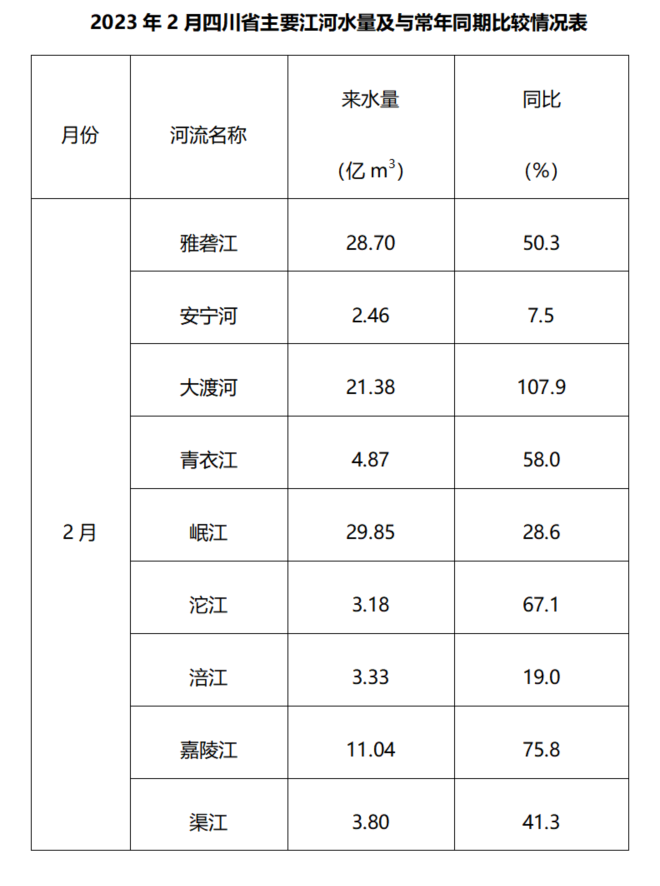

In [11]:
i=0
output_path = 'temp/'
if not os.path.exists(output_path):
    os.makedirs(output_path)
for item in all_imgs:
    image_url = item['src']
    try:
        img_data = requests.get(image_url).content
    except:
        print('Does not work:' + image_url)
        continue
    with open(os.path.join(output_path,f'image_{i}.jpg'), 'wb') as handler:
        print(getsizes(image_url))
        print('Work: '+image_url)
        handler.write(img_data)
    i=i+1

In [ ]:
def getdata(url): 
    r = requests.get(url) 
    return r.text 
    
htmldata = getdata("https://www.geeksforgeeks.org/") 
soup = BeautifulSoup(htmldata, 'html.parser') 
for item in soup.find_all('img'):
    print(item['src'])

In [3]:
url = 'https://www.ne21.com/news/show-79555.html'
r = requests.get(url)

In [9]:
soup = BeautifulSoup(r.text, 'html')
all_imgs = soup.find_all('img')

In [10]:
all_imgs

[<img alt="微信客服" src="https://www.ne21.com/skin/zxskin/images/wx.png"/>,
 <img alt="微信公众号" src="https://www.ne21.com/skin/zxskin/images/wxgzh.jpg"/>,
 <img alt="世纪新能源网" src="https://www.ne21.com/file/upload/201902/22/094249711.jpg"/>,
 <img class="c_p" height="16" onclick="fontZoom('+', 'article');" src="https://www.ne21.com/skin/zxskin/image/ico-zoomin.png" title="放大字体" width="16"/>,
 <img class="c_p" height="16" onclick="fontZoom('-', 'article');" src="https://www.ne21.com/skin/zxskin/image/ico-zoomout.png" title="缩小字体" width="16"/>,
 <img alt="" class="lazy" original="https://www.ne21.com/file/upload/201607/27/100319981.jpg" src="https://www.ne21.com/skin/zxskin/image/lazy.gif"/>,
 <img alt="" class="lazy" original="https://www.ne21.com/file/upload/201607/27/100321881.jpg" src="https://www.ne21.com/skin/zxskin/image/lazy.gif"/>,
 <img alt="" class="lazy" original="https://www.ne21.com/file/upload/201607/27/100321631.jpg" src="https://www.ne21.com/skin/zxskin/image/lazy.gif"/>,
 <img

In [5]:
image_urls = [i['src'] for i in all_imgs]
image_urls

['https://www.ne21.com/skin/zxskin/images/wx.png',
 'https://www.ne21.com/skin/zxskin/images/wxgzh.jpg',
 'https://www.ne21.com/file/upload/201902/22/094249711.jpg',
 'https://www.ne21.com/skin/zxskin/image/ico-zoomin.png',
 'https://www.ne21.com/skin/zxskin/image/ico-zoomout.png',
 'https://www.ne21.com/skin/zxskin/image/lazy.gif',
 'https://www.ne21.com/skin/zxskin/image/lazy.gif',
 'https://www.ne21.com/skin/zxskin/image/lazy.gif',
 'https://www.ne21.com/skin/zxskin/image/lazy.gif',
 'https://www.ne21.com/skin/zxskin/image/lazy.gif',
 'https://www.ne21.com/skin/zxskin/images/ne21_wximg.png',
 'https://www.ne21.com/api/avatar/show.php?size=large&reload=1679011518&username=bsssq',
 'https://www.ne21.com/api/avatar/show.php?size=large&reload=1679011518&username=bsssq',
 'https://www.ne21.com/file/upload/202303/14/161910671.jpg',
 'https://www.ne21.com/file/upload/202210/21/100135931.gif',
 'https://www.ne21.com/file/upload/202209/06/161632341.jpg',
 'https://www.ne21.com/file/upload/20

In [12]:
for i in all_imgs:
    try:
        print(i['original'])
    except:
        print(i['src'])

https://www.ne21.com/skin/zxskin/images/wx.png
https://www.ne21.com/skin/zxskin/images/wxgzh.jpg
https://www.ne21.com/file/upload/201902/22/094249711.jpg
https://www.ne21.com/skin/zxskin/image/ico-zoomin.png
https://www.ne21.com/skin/zxskin/image/ico-zoomout.png
https://www.ne21.com/file/upload/201607/27/100319981.jpg
https://www.ne21.com/file/upload/201607/27/100321881.jpg
https://www.ne21.com/file/upload/201607/27/100321631.jpg
https://www.ne21.com/file/upload/201607/27/100322641.jpg
https://www.ne21.com/file/upload/201607/27/100323681.jpg
https://www.ne21.com/skin/zxskin/images/ne21_wximg.png
https://www.ne21.com/api/avatar/show.php?size=large&reload=1679011518&username=bsssq
https://www.ne21.com/api/avatar/show.php?size=large&reload=1679011518&username=bsssq
https://www.ne21.com/file/upload/202303/14/161910671.jpg
https://www.ne21.com/file/upload/202210/21/100135931.gif
https://www.ne21.com/file/upload/202209/06/161632341.jpg
https://www.ne21.com/file/upload/202301/09/1438534012263